### Unidad 1: Taller de resolución de problemas de clasificación automática

<h1> Notebook 1 - Regresión Lineal y Regresión logística</h1>

## 1. Conceptos 

Podemos formalizar un problema de clasificación de la forma siguiente:

* tenemos una variable **s** que corresponde a un objeto observable del mundo. Por ejemplo, un "vehiculo", una "imagén", un "documento", etc. Esta variable la llamamos a veces _instancia_ o _observación_ .


* queremos relacionar la variable **s** con una variable **y** (variable _dependiente_ o _explicada_). **y** puede pertenecer a un conjunto discreto, por ejemplo **Y**= { auto, bicicleta, camion }, o a un conjunto continuo.
    * en el caso discreto, hablamos de problema de <u>clasificación discreta</u>. Por ejemplo: ¿Cuál la categoría del vehiculo **s**? **y**=es una bicicleta.
    * en el caso continuo, hablamos de problema de clasificación de tipo <u>regresión</u>. Por ejemplo: ¿En cuánto tiempo el vehiculo va a fallar? **y**= en 6 meses.


*  Para relacionar **s** con **y**, necesitamos poder observar un conjunto **X** de sus características (variables _independientes_ o _explicativas_). Por ejemplo **x_1**: su número de ruedas, **x_2**: su altura, **x_3**: el nivel de ruido que hace.


Los algoritmos capaces de **aprender**, a partir de ejemplos pasados, cuáles son los buenos parametros que permiten aproximar la relación entre **X** e **y** se llaman **algoritmos de aprendizaje supervisado**.

<p> En este primer notebook, utilizaremos y describiremos 2 algoritmos de aprendizaje supervisado simples:</p>
* el algoritmo de **regresión lineal**: que permite resolver problemas de clasificación de tipo regresión.

* el algoritmo de **regresión logística**: que permite resolver problemas de clasificación discrecta.

<h2> 2. Regresión Lineal: un primer ejemplo en Python con 1 variable explicativa</h2>

<p>Consideremos el problema siguiente: predecir un volumen de negocio.</p>
<i>Usted es el jefe de una empresa de <i>FoodTrucks</i> y busca una nueva ciudad dónde implementar un nuevo punto de venta. Su empresa ya tiene camiones en distintas ciudades y tiene a su disposición los datos indicandos el beneficio realizado en cada ciudad. Usted desea utilizar estos datos para estimar qué beneficio van a realizar según la ciudad escogida.</i>

<p> Este problema es de tipo <b>supervisado</b> porque conocemos cuál es el tipo de variable que queremos predecir:</p>
 - y: la variable que queremos predecir (<i>volumen de negocio</i>),<br>
 - x: la variable explicativa (<i>tamaño de la ciudad</i>)

In [1]:
#Nuestros datos son al formato CSV y tienen 2 columnas: la populación de la ciudad (por 10000 personas) 
#y el beneficio realizado por la empresa en este ciudad
import pandas as pd
df = pd.read_csv("datos/nb1-dataset1.csv")
df[:10]

,Population (10000 pers.),Beneficio (10K$)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [2]:
#selección de la primera columna de nuestro dataset (tamaño de la populacion)
X = df.iloc[0:len(df),0]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
Y = df.iloc[0:len(df),1] 

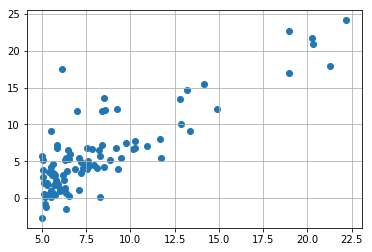

In [4]:
#Visualización de los datos
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

Para aprender un modelo predictivo basado en una regresión lineal, vamos a utilizar la librería Python ScyPy (una librería python open-source para las matemáticas: <a href="https://www.scipy.org/">SciPy</a>).

In [5]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [6]:
#Definemos una función que predice 'y' (variable de output), a partir de 'x' (variable de input)  
def predict(x):
    print("y = "+str(slope)+"*x "+str(intercept))
    return slope * x + intercept

y = 1.1930336441895941*x -3.8957808783118555


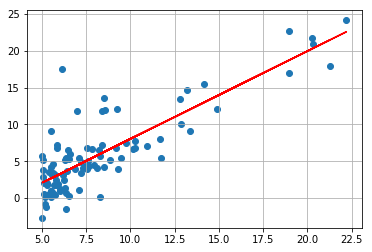

In [7]:
#Visualizemos el modelo aprendido por el algoritmo de Regresión Lineal
fitLine = predict(X)
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.show()

<div style="background-color: #c47968">

<b>Por completar:</b>

<p>- Según este modelo, ¿cuál sería el beneficio esperado si la ciudad en la cual pensamos instalar un _FoodTruck_ tiene 127.000 habitantes?</p>

<p>- ¿Cuáles preguntas pueden formular sobre el algoritmo de Regresión Lineal?</p>

</div>

In [ ]:
#...

<h2> 3. Regresión Lineal: un segundo ejemplo en Python con 2 variables explicativas</h2></h2>

En general, no es siempre posible predecir una variable a partir de una sola variable explicativa. A menudo, se necesita varias variables. En este caso, hablamos de <i>Multivariate Regresion</i>.

Consideremos el problema siguiente:

<i>Supongamos que usted quiere vender su casa y buscar cuál podría ser un buen precio para venderla. Tienen a su disposición un dataset que indica el precio de venta de varias casas de su región y de 2 otras variables:
- la superficie de la casa, <br>
- el número de habitaciones.</i>

In [8]:
import pandas as pd
df2 = pd.read_csv("datos/nb1-dataset2.csv")
print(df2.head())

   Superficie  Numero_habitaciones  Precio
0        2104                    3  399900
1        1600                    3  329900
2        2400                    3  369000
3        1416                    2  232000
4        3000                    4  539900


Luego, tenemos que diferenciar las variables predictivas X (Superficie, Numero de habitaciones) y la variable objetivo Y (Precio).

In [9]:
# Variable objetivo
Y = df2["Precio"]
# Variables predictivas (o explicativas)
X = df2[['Superficie','Numero_habitaciones']]

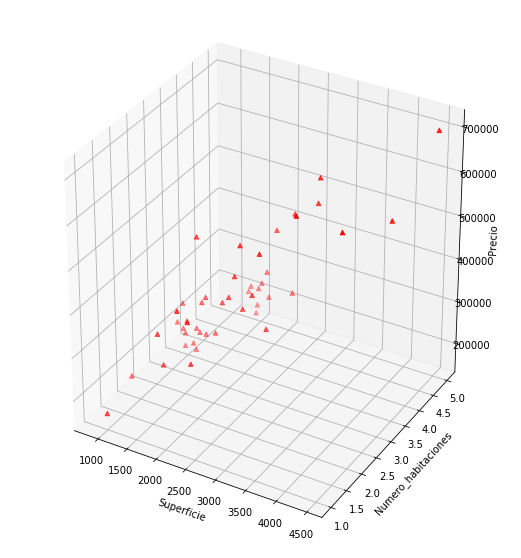

In [10]:
#Visualizemos los datos en un espacio en 3 dimensiones
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df2["Superficie"], df2["Numero_habitaciones"], df2["Precio"], c='r', marker='^')
 
ax.set_xlabel('Superficie')
ax.set_ylabel('Numero_habitaciones')
ax.set_zlabel('Precio')
 
plt.show()

Para poder utilizar el algoritmo Multivariate Regresion, es necesario realizar una etapa de normalización de las variables, para darles un valor entre -1 y 1. La librería Python Scikit-learn permite realizar este proceso.

In [11]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['Superficie', 'Numero_habitaciones']].as_matrix())

C:\Users\nacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\nacho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\nacho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Entre los algoritmos de Regresión Múltiples, existe el método <i>Ordinary Least Squares</i> (OLS). OLS es un método de optimización que busca minimizar la suma de las diferencias observadas entre las predicciones del modelo y los datos de entrenamiento. Con el paquete 'statsmodels', se puede entrenar un modelo OLS y obtener un resumen del modelo:

In [13]:
import statsmodels.api as sm

est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     631.4
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           1.19e-33
Time:                        16:26:06   Log-Likelihood:                -589.11
No. Observations:                  47   AIC:                             1182.
Df Residuals:                      45   BIC:                             1186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Superficie            140.8611    

La variable 'coef' nos indica cuál es el factor de ponderación de cada variable predictiva. Podemos entonces construir nuestra funcion de predicción:

In [14]:
def predict_price_of_house(Superficie, Numero_habitaciones):
    return 140.8611 * Superficie + 1.698e+04 * Numero_habitaciones

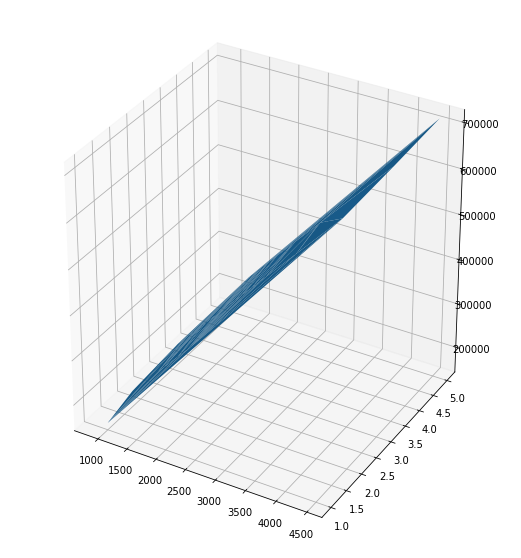

In [15]:
#Visualización del modelo obtenido

import matplotlib.pyplot as plt

def predict_all(lst_sizes, lst_nb_rooms):
    predicted_prices = []
    for n in range(0, len(Y)):
        predicted_prices.append(predict_price_of_house(lst_sizes[n], lst_nb_rooms[n]))
    return predicted_prices

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projectidata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgkAAAIuCAYAAAA1y5t2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsvXl4I+d95/ktnCRxkQAv8Oym2Ke62QcPW954rDxKR27ZknxknSfZGdkr53FGWUd2Mp5Zz5PH3kd5nt2Rd5/sJJvIspVV7FZ2nN1R4rU2tqQolqPYlt1q9kGC932BN3ERxI2q2j86VQJB3FVAAcTv8zz8B0DV+4Koet9v/U6G53kQBEEQBEEko1J6AgRBEARBlCckEgiCIAiCSAmJBIIgCIIgUkIigSAIgiCIlJBIIAiCIAgiJSQSCIIgCIJIiSbL+5QfSRAEQRDHGybdG2RJIAiCIAgiJSQSCIIgCIJICYkEgiAIgiBSQiKBIAiCIIiUkEggCIIgCCIlJBIIgiAIgkgJiQSCIAiCIFJCIoEgCIIgiJSQSCAIgiAIIiUkEgiCIAiCSAmJBIIgCIIgUkIigSAIgiCIlJBIIAiCIAgiJSQSCIIgCIJICYkEgiAIgiBSQiKBIAiCIIiUkEggCIIgCCIlJBIIgiAIgkgJiQSCIAiCIFJCIoEgCIIgiJSQSCAIgiAIIiUkEgiCIAiCSAmJBIIgCIIgUkIigSAIgiCIlJBIIAiCIAgiJSQSCIIgCIJICYkEgiAIgiBSQiKBIAiCIIiUkEggCIIgCCIlJBIIgiAIgkgJiQSCIAiCIFJCIoEgCIIgiJSQSCAIgiAIIiUkEgiCIAiCSIlG6QkQxHEmHo8jEolAo9FAo9FApVKBYRilp0UQBJETDM/zmd7P+CZBEKnheR7xeBzxeBzhcFgUBgzDQKvVQqvVQq1WQ6UiYx5BEIqT9smFRAJByAzP84hGo+A4DgAQi8VEkcDzvPg6AKjVami1Wmg0GqjVarIyEAShBCQSCKIUcByHaDQKnufFDT8ajabc/HmeF/8ENBqNKBrINUEQRIlIu9BQTAJByADP82BZVrQaCG6ETCKcYZhDIkA4RzweF98n1wRBEEpClgSCkEhi/EGqjT+dJSGX8ya6JlQqFXQ6HbkmCIKQG3I3EEQx4DgOsVgMHMcdEQiANJGQfJ5k14QQz6DVask1QRCEFEgkEITcRCIRBINB1NTUpHUFyCUSUp2X53ksLCygqakJZrP5UDxDKsFCEASRBopJIAi5ENwLe3t72N3dxblz50o+B0EEJFowYrGYKEhUKtUR0UAQBJEvJBIIIg8S0xtVKlXGwMRSwjAM1Go1gPeDJaPRKKLRKABKtSQIojBIJBBEjiSnN5ZrtoEgABJFA8dxCIVCotVBqABJqZYEQWSCRAJBZCFdeiPDMIpbEnKZgyAMEtMy4/E4YrGY+D6lWhIEkQoSCQSRgUzpjcL72Y6PRCLQ6/Vl87SeLk2TXBMEQSRDIoEg0pAYf5BKIGR7imdZFuPj4wgEAuA4DiaTCVarFVarFVqtttjTz5nkeAaO4xAOh8X3qQokQVQvJBIIIgXJ8QepNsZMIiEYDGJ0dBQdHR04e/YseJ6H3++H2+2G0+kEz/NoaGiA1WqFxWIp2MQvt8sjlyqQAFBbWyuKBoIgji8kEggigWT3QqZNMN0T9e7uLmZnZ3HhwgWYzWZEo1GoVCpYLBZYLBacPHkS8XgcHo8HOzs7mJubg16vF60MdXV1ZfO0nko0jIyM4MyZM9Dr9VCpVKKVgVItCeL4QSKBIP4FnucRi8XAsmzOxYgSn+J5nsfi4iLcbjcGBweh0+nSPuVrNBo0NTWhqakJABAKheB2u7G4uIhQKCS6JhoaGqDT6eT5gjKQmB0hpIBGIhFEIhEAVAWSII4bJBIIArm5F5JJNPXHYjGMjY3BYDCgv78/bzN8bW0t2tvb0d7eDo7jRNfE+vo6OI5L65pQMsMilZVBSLUMhUIpCzqRaCCIyoJEAlH1JKYD5rO5Cxu03+/H2NgYenp60NraKnk++bgmlE7BTCRVqqVQBRK4b2UQRAOlWhJEZUAigahasqU3ZoNhGIRCIYyNjaGvrw9Go7Eo88zkmvB6vQgEAojFYmXpmqAqkARR2ZBIIKoSIb1xeHgYAwMDeW9QHMdhcXERkUgEH/7wh6HRlO5WSnRNzM/PQ6fTIRgMZnVNKEm2KpAApVoSRDlCIoGoOhLjD4QqivkQiUTgcDhgNpthMplKKhCSYRgGBoMBNputIrMmEl0TyamWVAWSIJSHRAJRNaQrr5wPXq8XExMTOHPmDEwmE8bGxrIeU8qNOZ1rYmlpCYFA4FBBp3JzTWSqAhmNRlFbW4va2lpyTRBECSGRQFQFhaQ3JrO2tob19XVcuXIFdXV1ojVCaTLNIdE1IQRZulwujI+Pg+M41NfXw2q1or6+vqye1pPjGZxOpzhXgFwTBFEqSCQQxx6O4xCLxdKWV84Gy7KYmpoCx3EYHBwUN69yafCUz2fNZjPMZrPomvB6vdjb2xNjGwQrg8FgKJuNV/jN1Go11Gp1WtdEYldLgiDkgUQCcawpNL1RIBQKYXR0FG1tbejs7Dy0cZaDSJCCRqNBY2MjGhsbAdz/rh6PB8vLyxXpmohEIqIbiapAEoQ8kEggjiVS0xsBwOVyYXp6GufPn0dDQ8OR93M9p1CgqVjIJVQEn39bW9uhXhPJrgklhFGm/2Gya0KoAhkOh8X3KNWSIAqDRAJx7MjWvTGX45eXl7G7u4uBgQHo9fqUnysHS0KxNrxE18SJEycOuSb29/cxMTEBm81Wtq4JgeRUS6GkdKJrolzmThDlCIkE4lhRSHnlROLxOMbHx6HX6zEwMJDVRaG0SCgVia6JYDCInp4eHBwclNQ1Uchmnq4KZCwWA8/zVAWSILJAIoE4FsiR3hgIBOBwONDd3Y22trasny8HSwKgjFCpqamB2WzO6pqwWCyiK0AKcn1HqgJJEPlBIoGoeOSIP9je3sbCwgIuXrwIk8mU0zHlsIGUyxzSuSYWFhag1WplyZqQ+7tmqwLJ8zzC4TCsViu5JoiqhUQCUdFITW/keR5zc3PY39/H4OAgtFqtrPMT5lTs4MVyIjlrIhwOw+12H3FNNDQ0pI33SKYU1pJk10Q8Hsf09DSuXLkivk9VIIlqg0QCUbGwLAun04nm5uaCFuxoNIpQKAQAuHr1asVu4uXg8shETU0N2trajrgmJiYmwLLsoV4Tcrgm5CTZPZHomlCpVNDpdOSaII41JBKIiiPRvbC4uFhQe+b9/X2Mj49Dq9Wit7e3Yhf4Spu3FNeEEt81efzkVMtwOCy+r1arRdFArgniuEAigagoktMbC2F9fR2rq6u4dOkSHA5HVbkCyo1cXBMNDQ1idcVSkq02Q7pUS+H95NLRBFGJkEggKgap6Y0cx2F6ehrRaBSDg4NiNb5yN9dnotLnn0yya+Lg4AAulwsejwd+v1+szVBfX19010Q+4jGVaIjFYohGo1QFkqhoSCQQZY8c6Y3hcBijo6NoaWnBuXPnxEX6uG2yxwmGYWAymWAymRAKhWC328GyLNxuNxYXF6HRaETXhNFolH3jlWJhSlcFMhKJAKBUS6JyIJFAlDVypDd6PB5MTk7i7NmzsNlsh94jkVAYSmxqarUa9fX14m8YiUTgdruxurqKg4MDGI1GUTTkmjVRCqgKJFHJkEggyhY5yiuvrq5ia2sL/f39qKmpOfKZShcJlT7/fEj+/fV6Pex2O+x2u+iacLvdmJycRDweP9QGuxDXRLFiVVJVgRQakQlWBwAwmUyUakkoDokEoiyRGn/AsiwmJiagVqsxODiYdqGtpk22ksn2GyW6Jrq7u8GyLLxeryTXRKkCWhOvb57n4fP5sLW1hVOnTgEg1wShLCQSiLIi2b1QyFNUMBjE6OgoOjs70dHRkfGzJBKOJ2q1GjabTZJrQomsF2E8lUoFtVotuiYSUy2TsyZINBDFhEQCUTYIEeEsyxYcf7C7u4vZ2VlcuHABFosl6+crXSRU+vxzReqGXYhrQqn/a2J6b6p4BpZlxZRQqgJJFBsSCURZINW9wPM8FhcX4Xa7MTg4mHMnwmrZZIn3ydU1UVtbq8j88q3PQFUgiWJCIoFQHCFoC0DB5ZXHx8dhMBjQ39+f1zlIJBDpXBObm5vw+XyYmJgoadYEz/M5X8O5VIEULA3kmiAKgUQCoRhypDdyHIfbt2+jp6enoPLMlS4SKn3+uVLK+ADBNWE0GrG6uoquri5ZsyayUeh3TZdqGQ6HEQ6Hj1SBLPSeI6oLEgmEIvA8D5fLBZ/Ph/b29oIWq83NTYRCIQwNDeUUf5CKUmyyx20jP07fJRsqlSqra6KhoQE2m022gk5yCaJcqkAmiwaCSIZEAlFyhPiDSCQCv99fUHnl2dlZhEIhmEwmGAyGgudy3Dbw44oSmQapxswla0LoapmqLkeh48pBsmsCwJF4BrVaDb1eT/EMhAiJBKJkJJdXFlK88iESicDhcMBqteLMmTMYHh6WtMlXukhgGAYcxyk9jWNJLpt1ctZEIBCA2+3G1NQU4vE4LBYLrFYrGhoacnZNlEIQCedPFA2RSARTU1Po6+ujKpCECIkEoiSkSm9UqVR5bXBerxcTExM4c+aM2DVQ6iYvh0igLpLHk3x/V4ZhYDQaYTQa0dXVBZZl4fP54Ha7sbS0JLomrFYrTCZT2nMrVZ9BuCcF8Z4YUEypltULiQSi6HAch1gsdqS8cj4b9NraGtbX13HlyhXU1dWJr+crNJKRS2SQSCguSrkbpKBWq8WsCOC+Fczj8cDpdMLv98NgMIjvJ7ompLRBlwLHceLmny3VkqpAVg8kEoiikim9UaVSZV2IWZbF1NQUOI7D4ODgEZOt0paEcnBXKD3+cUbOzU+v16O1tRWtra2HXBPT09OIxWKia4JlWWg0pV+as9VnSHRNUBXI6oFEAlEUcklvzOZPD4VCGB0dRVtbGzo7O9OeQ2mRoCRKj19KyiFwUS4yuSa2t7ehVqsRjUazuibkJNGSkG3uVAWyeiCRQMhOrt0bM23QLpcL09PTOH/+PBoaGtKOJTVwT66YBKK4KPE/LqWLI9E1odPpxPTEbK4JOZGzPkNy1kSiaKgmYXscIJFAyEo+5ZVTxRPwPI/l5WXs7u5iYGAga4W7XFwWmVDaEiEHSo9/XFHq/8rzPLRaLVpaWrK6Jurr62VzTeRqSchGqiqQkUgEkUgEAFWBrDRIJBCykJzemMtik7zBx+NxjI+PQ6/XY2BgIGfTZzWLhGpZYJUKDlVizOTvmsk1sby8DJVKJVoZpLgm5BIJiaSrAhkKhRAKhVIWdKqWa7pSIJFASKbQ8sqJroJAIACHw4Hu7m60tbXlPLbSm7zSIoEoHkoJk2zjJmdNRKNRuN1uya6JUtVnSHyIEFKjZ2dn0dLSAqPRSFUgywwSCYQk0qU35oKwwW5vb2NhYQEXLlyA2WzOa3xyN1SHu6FcKi6W47g6nS5t1kQ0Gj3UayKTa0KJ1EvBNRGJRMSxKdWyvCCRQBQMy7KHgpPyhWEYBINBOJ1ODA4OQqvVFnQOpeskZIPjuKKW2iWKg1LiS8pmLcU1kU/3SbnhOE4UAcmplqFQSJwnpVqWHhIJRN4I7gWHw4EHH3ywoBs1Go3C4XCA53lcvXpV0qKotCUg0/E+nw9jY2PgeR4WiwU2mw0NDQ2K5MET+aOUJUGuzToX14RQBVLJomCpvnMq1wSlWpYeWqmIvEhMb9zf3y/oHPv7+xgfH0dvby/m5+clLUxKi4RMx29sbGBlZQV9fX3QarXw+/1wuVxYWVkRn+ikdg8sB3dHKSB3gzwkuyaCwSDcbjdmZ2cRCASg1+tF4VBKIcuybNZNnqpAKgOJBCJnktMbhXiAfG7G9fV1rK6u4tKlSzAYDJifn5c0p3KMSeB5HrOzswgGgxgcHARwfxGsr69HfX09gPef6ITugSaT6VCePKE8x1EkJMIwDAwGAwwGAzo7O+F0OhEMBrG/vy8KWcHKYDabizqnQr4zVYEsDSQSiKykS28U6hzkYubjOE4MpBocHJTtKaXcLAmxWAyjo6Oor6/H5cuXwTCMaB5NJPmJzu/3w+12Y3x8HBzHiYLBbDaTGVUhlKyToFS6p8FgQHt7O4D7Qtbj8WBjYwPT09Ooq6sTr8va2lpZx5aafklVIIsHiQQiI5nSG3MNGgyHwxgdHUVzczPOnTsn6wIoNXBRjgZRAgcHB3A4HHjggQfQ0tKS1znMZjPMZjNOnDiBWCwGj8eDra0tzMzMoK6uDjabLWVKG7kbistxtiQkIwQPCuh0OrS0tKClpeWIayISiRxqgy1V9MsdNJnONSFkUQhVIIVW2GRlSA+JBCIt2cor57LBejweTE5O4uzZs7DZbLLPsRzKKvM8j52dHczPz+PixYswmUwpP5PrQqTVatHc3Izm5mZxcXa5XJiamkI8Hkd9fT1sNpvouiCKw3F3N6QaN91Gneya4DhOzJpIdk2YTKaye1JPVwUyHA5jc3MTnZ2dFM+QBhIJREpyKa+cKR6A53msrq5ia2sL/f39Ras3L1UkqFSqlO6AfFhbW0MgEMDAwIDs8QSJi7OQ0ub1erG3tycGfep0OgSDwUMttI8bSgUuKrHZKWlJyPX7CqJA6KuS6JrY398vqmtCKsnr2dbWFtrb28VUS4ZhRAsDxTOQSCCSSHYvZFo00pn6WZbFxMQE1Go1BgcHi7rQSnUXAIVbEuLxODweD+rr69Hf31+SDUWtVsNms4lWmfX1dezu7mJ+fh7hcFhMs5Szpn+1Uol1EqQgRZyU0jVRDFQq1ZEqkLFYDDzPQ61Wi0GQ1RjPUH6/FqEYws3BsmxO1RNTbdDBYBCjo6Po7OxER0dHMacLQB5LQiHHC9+ztrYW3d3dii0cer0eZrMZPT09ognY5XJhaWkJGo1GTLM0GAxV/TRUKOVm9i8mcjZ4yuSaYBjmUEGnctt0k10TQHVXgSSRQADIr3ujQPIGu7u7i9nZWVy4cAEWi6WY0xVRIrvB7XZjamoKDz74IDY2NgoeW26STcCRSESstBcIBGA2m8XFuZDqlkpCdRIqd9xcXBPRaBShUKgsXRMA0laBfOaZZ/DSSy+ljEM6LpBIIBCPxxGLxQDkV15ZsCTwPI/FxUW43W4MDg7m7ZeXsjjJUZY51+NTxVlsbGwo3gUy3fh6vR52ux12ux08z2N/f1+stgdAtDJI6Rx4nDlum3U2itEFMhWpXBMjIyMV4ZpIrgI5Nzd37OualNcvQJSUQrs3CjAMg2g0inv37sFgMBTklxc2uUIXRZVKJQqcQsh1XI7jMDk5CZ7nD8VZVEoKIsMwsFgssFgsOHnyJGKx2JHyvEKapV6vV3q6KSFLwvEbl2EY1NbWQqfT4dKlSyV3TUi9d+PxeMVZ5fKFREKVki29MRfi8Timp6dx+vRptLa2FjSPfAoypUIOd0M2S0IkEsHIyAhaW1vR1dV1pFZEJYiEZLRa7aGnuUAgAJfLhcnJSbAsK6azWSyWsvMZl4pqK6ZUKktCMokxGMmuCaFmyMbGBvx+P2pra0UrgxzZPHJ85+NuhSORUIVwHIfFxUU0NjaipqamoIt8c3MTu7u76O3tLVggAOVZVjkRn8+H8fHxtHUechm/mIuIHCKFYd7vHNjd3S1mbezs7GBubg41NTWilaHcfMbFplqe6JUcN9NGnapmiMfjOZTNI4iKQp7oWZY9VEAqHyrx4aAQSCRUEYnlld1uNxoaGvJeFDiOE/sStLe3SzZNy1ExsdgNmq5cuZL2qaVSLQmZ0Gg0aGpqQlNTE3ieRygUgsvlEn3GwvXT2NhY8AJbCSi5aZbbZl0O4yZmTXR0dIhN5oQeKAzDHOo1kWu5eCnfWcnOmaWCREKVkJzeqFar896cI5EIHA4HrFYrrly5gqWlJck1CkrhLsh3fJ7nMTMzg1AolLXPxHFfIBiGQV1dHerq6tDZ2QmWZXHnzh14vV6srq5Cq9WKAZB1dXXH6v+h5AZAloTsqFQqsWlaT0/PoXLms7OzqKmpOVTQKdV3U0oYVRIkEqoAjuMQi8UOxR/kW4TI6/ViYmICp0+fRlNTEwDpT/HCOeTe5PM9PpFUDZqyUa7ZDcVAyBHv6emBVqtFOByG2+3G4uIiQqHQoTTLcotMzxelf9dSU+6WhGwkuyZCoRDcbrfomhCuzUTXRC4tqtMhxVVRSVT2XUxkJV16Yz5P4Gtra3A6nUfM7nJUO1SizkHy8cJ3KKRB03F0N+RDTU0N2tra0NbWJpp/XS4XVldXoVKpRCuD0WisSCtDJc65UCrNkpCJRAtYsmtibW0NANDQ0AC9Xl/w2OVY16EYkEg4pmRLb8xlgxfS/jiOw9DQ0BHVLNXUn+s8MiGXyMjWoKlY4x8nEs2/wP2iOYK/+ODgAEajUQyArITc8mrwNydS6ZaEZIKRKOr096+z5GtTcE1sbm5if38f0Wg0q2siGRIJRMWSS3pjts05FAphdHQUbW1t6OzsTHsOKTUKAOXKKieyv7+PSCRSUIOmcthEylWk6HQ6tLa2orW1FTzPw+/3w+12Y3x8HBzHiYtyrkFmpaZc/6/F4rhYEjiOw73FLVzpsaf9jOCaUKvV8Hg8aGtry+qaSCYYDFaFSCi/O5OQBMdxiEQiWesfZBIJLpcLd+/exZkzZ47UBUg+hxwxCUoFLsbjcczMzIDjOFy9erWgp1ulLQnlIFJygWEYmM1mnDhxAlevXsXly5dhNBqxtbWF4eFhjI2NYWNjA+FwWOmpHqJS/r9yoGSdBLn+z/5gGH/77iQunWyFSpX9nCzLQqPRiG6Jvr4+DAwMoLW1VXQ/3rlzB4uLi/B6veJaMzc3h09/+tP4+c9/jsuXL8NsNuNP//RP4Xa7ce3aNZw6dQrXrl2Dx+MRv+Ozzz6L3t5e9PX14e7du+Icbty4gVOnTuHUqVO4ceOG+PqdO3dw8eJF9Pb24tlnnxXXmXRjFAsSCccEwb0QiUQAIGt701Qiged5LC0tYWFhAQMDA2JBk3TI4W4oRnZCLgSDQQwPD4tliaWmQVUbUhd1jUaD5uZmnD17FkNDQ+jp6RGLcw0PD2Nubg5utxssy8o04/ypNncDUNkBk6vbXnz7zTv4xEPnoFHndr5UYwuuiZ6eHvT396Ovr08UtLdv38YPf/hDfP/738cf/dEf4cknn8SdO3dQV1eHT37yk3j++efxyCOPYG5uDo888gief/55AMAbb7yBubk5zM3N4aWXXsIzzzwD4P6G/9xzz+G9997DrVu38Nxzz4mbvtAXQjjuzTffBIC0YxQLcjccAwopr5wsEuLxOMbHx6HX6zEwMJDTTStH4KISMQkulwvT09O4cOECtFotfD5fSceXE6XHl4PE/Peuri6wLAuv14u9vT3Mz89Dr9cjGo2K5t1SbWTVKBKUQA6RMDyzilffncEf/+tfhU6Te8ZBLmMnZ02sra1henoaL774IhYWFvD444+jvr4eJpMJr732Gt555x0AwGc/+1k8/PDD+MY3voHXXnsNTz31FBiGwQc/+EF4vV5sbm7inXfewbVr12C1WgEA165dw5tvvomHH34Y+/v7eOihhwAATz31FH7wgx/g+vXraccoFiQSKpxU6Y25kLg5BwIBOBwOdHd3o62tLeex5XA3lLJOQmKDpoGBAej1eoRCIUWzK4ijqNVq2Gw2scJlKBTC3bt3D1XZs9lsqK+vL2qaJYmE0iBVJPzgFxP44e0F/NkXPooaXX7XQ75pjAzDoKurC1/5yldw+fJl/PSnP8Xc3Bx6enrwxBNPYHl5GXb7/VgIu92OnZ0dAMD6+jo6OzvF83R0dGB9fT3j6x0dHUdeB4Dt7e2UYxQLEgkVDMuyYo/zfG8yIehwe3sbCwsLuHDhAsxmc17nkCu7oRSBixzHYWJiAgzDyNqgiTaR4iM0AOrr6xMbALlcLiwtLUGj0YhplgaDQdbfg8RfaShUJPA8jxd++B5+OrGGl599Aoaa/GOKOI4rONMmFAqhpqYGN2/exMTEBFpaWsTsiVRzTSbd2pPpdSUgkVCBSO3eCNy/4HZ2dqBWqwuK6gfkq5NQbHdDOBzG6Oho0Ro0VXrvhkoiuQFQJBKB2+3G8vIyAoHAoWJOcnTnqyYRqNR1VIhIOAiG8b9+/13cXdjGK3/4SZjqCisPL8WKEQwGsba2hqtXr4p1VVpaWrC5uQm73Y7NzU00NzcDuG8JEOozAIDT6URbWxs6OjpE14Hw+sMPP4yOjg6xpXvi5zONUSwocLHC4HkebrcbsVisYIEQjUaxvLwMnucLjuoHysfdkK1B0507d9Db24vu7u4j/y+lizkR0tDr9bDb7bhw4QKGhobQ1taGYDAoRqUvLS3B5/MV9BuRu6E05LtRr2y58dUbb+OX0xv4zpefhNVUeBqiFJEQDocxOTmJ3/qt3xJfe+KJJ8QMhRs3buDJJ58UX3/llVfA8zxu3rwJi8UCu92ORx99FG+99RY8Hg88Hg/eeustPProo7Db7TCZTLh58yZ4nscrr7xy6FypxigWZEmoIDiOQzQaxdjYGIaGhgpawPb39zE2NiYG4UhZBMshcDHT8evr61hdXS1qgyY5XC6EPDAMA4vFAovFgpMnT4qNqDY2NjA9PQ2DwSAWc8qlMZkSIkHpIFglyGejfm9yFX/2o2FsuP34m3//aTRZDJLGllJa2ev1YnZ2Fp/61KfE17761a/iM5/5DF5++WV0dXXh1VdfBQA89thjeP3119Hb24u6ujp85zvfAQBYrVZ87Wtfw+DgIADg61//uhjE+OKLL+Jzn/scQqEQrl+/juvXr2cco1iQSKgAErs3Cs2ZCllMhK6Gly9fRjgcxu7urqR5yZUCKfeTvNCpMtcGTZVsSVBi/EqxnGi1WrS0tKClpQU8zyMQCMDlcmFychLxeBwNDQ2w2WywWCwpNyklvmc1Wi9yFQnff3cCf/XjUXgDYXzv338admvulVGljp3u2G9961uwWCziazabDW+//faRzzIMgxdeeCHleZ5++mk8/fTTR14fGBjA+Pj4kdeYbSd2AAAgAElEQVTTjVEsSCSUOaniD1QqlVgEJBc4jsP09DSi0ai4aQoVGaVQjg2eotEoHA4HGhoacObMmawLbqWLBCI3GIaB0WiE0WhEd3c34vE4vF4vdnZ2MDc3h5qaGtHKkFhFTwlLglIdIJWC5/mMGzXHcfj2G7fxf/9sEpFYHP/lK59CV5Ml7efzQYpIEAIXjzskEsqYdOWV89lYhaC95uZmnDt3rqBzpKPcGjz5/X6MjY2ht7c352Aeym6oTjQaDRobG9HY2Ch2DHS5XJidnUUkEkF9fb1YubSUCPd6qVHSgpHpO/sDYfzZ39/ED96bBQMGf/3vPokH7FbZxpbSBTIYDMJgkObuqARIJJQpQvyBcPMm3kS5bs4ejweTk5M4e/asmHOeeA45gg7lEBpS+j8I30NI5RSqo+VKKbIbiglZMqST2DGws7MTLMvC5/Nhb29PLDAmpFnW1dUVdTPN9lRdzHHLLSZhecOFb755B6/fmYdWrcaNP3wSZzsaZR+70JiEcDicNtbpOEEiocxIdi+kunmyiQShaNDm5iauXr2asglJOdQ4EOYh5Rw8zyMcDmNtbQ2Dg4N5p71JXRhpkz5+qNVqWK1W1NXV4fz58+A4Dm63G4uLiwiFQofSLOUu5nRcmixJHfu9yRXc+Kcx/NixhBqtBn/5+4+j70Ru7duljp0r1AWSKDk8zyMWi4Fl2YzpjWq1Ou0Gz7IsJiYmoFKpMDQ0lPYGKBd3g5RzxONxjI2Nged59Pf3K7K4kkg4/tTU1KCtrQ1tbW3gOA77+/tiC2yVSiUKBpPJJPkaVDImoVwsCd//+QReuzWDX0yvQ69V41v/w8cxcCr3SrBSxs6HUChElgSidGRyLySTbmMNBoMYHR1FR0fHoVKf+ZwjH5TMbhC+a3d3N0KhkGILnNIiQenxjzOpNk6h+Y/QACgajcLtdsPpdMLv98NoNIoBkIXUH6lmSwLP8/jWj27hJ2MrGFnahlatwp//7nV86FzmtUyOsQuBRAJRMuLxuOiXz7WxUnJ3vN3dXczOzuLChQuHUnIynUPpoENhHlIaNFksFiwvL0uagxQocPH4ksuGrdPp0NraitbWVvA8j4ODA7hcLoyPj4PjODHN0mw253RvV6slwR+M4D///TB+NrGK+U0P1CoGf/I7j+JX+04WffxCvzeJBKLoFFpeOXGD53kei4uLcLvdGBwczPnpRS6RIBWpDZrKAXqSP57k+7syDAOTyQSTyYQTJ04gHo/D7XZja2sLs7OzqK2tFa0M6VLnqtGS4Nzdx/du38QvZjex5TmAimHwjc/9Gq739yoyn1wJhUKU3UAUj3TpjbkgbPCxWAxjY2MwGAzo7+/P6yaXQyTIQa7zSNegSWlytaYUa+End0NxkfK7aTSaQy2Gg8GgaAWLxWKor68XizkJEfbVZkm4ObWKv7m1jKntIPZD95vV/fG/fhhPfvBsyeeSL+FwmAIXieKQT/xBKtRqNYLBIBYXF9HT04PW1ta851Aum0s+DZrsdjs6OzvLysRfLv9HQn7k3DgZhoHBYIDBYEBXVxdYloXX68Xe3h7m5+fFNEulrGNKWBK+/+4k3rq3iDurPsS5+/fQH/3mh/GbH75Q0nkUipT0yUqCREIJSS6vXOhN6ff74XK5MDAwkFdNgETKZaPNFpPg9XoxMTGRstZDOUAi4fhSzKdrtVoNm80mXtOhUAhutxtra2sIBoOYmZmB1WpFQ0OD7GmWqSilJYFlOXz7zTu4M7+Bn02uQrh9/t0nH8LnHrlckjnIQbXc9yQSSgTP8/D5fHC73WhrayvohhR6Euzv76Orq6tggVBOZIpJEBo0pav1UA4oLbZIpBwPamtr0d7eDoPBgO3tbTQ3N8PtdmNlZUWs22Cz2WAwGIpyzZXKkuD1B/EXr9/C9JoL781uiK8/89gA/u31gaKPn4jU+izVAomEEiDED0QiEbjdbrS3t+d9jmg0itHRUVitVpw4cQLRaLQIMy09qSwJHMdhZmYGkUgka4OmcqCaFoxqQ4neDSqVCg0NDWhoaAAAcd1YXl5GIBCAyWQSAyDzLR6Wadxif9cF5x5eeuse5jbdGFvZEV+/fqEVf/iJh4o6diqkdIAEUJCruBIp79X3GJCY3qjRaAoKFvT5fBgfH8fp06fR1NSEra2tsgg6lINkS0KiGDp79mzZ34S5PslXY3c/In9SXSd6vR52ux12ux08z4vuRqfTCQBiMSez2VzwNVZsS8LNyRV872fjmFn3YHHLI77+Wx+5gMdPK2MRVTKjo5IgkVAk0nVvzHdzX1tbg9PpxJUrV8Sc3HLJTBCQsgFKbdAkxxykQNkNhJxku44ZhoHZbIbZbMbJkycRi8XgdruxsbGB6elpGAwG0cqQTxBkMe+fv/v5FP5xZA5jK3vY8QXE1z/50Fk899sP4/bt20UZNxtSREIsFpPNilPukEgoAunSG9Vq9ZEiSOngOA6Tk5PgOA5DQ0OHzGKZyjKXGmGTKnSBEQRPoQ2a5JiDFHLZpPf29rCxsSH6latlcSHyJ9/rWKvVoqWlBS0tLeB5HoFAAC6XC5OTk4jH42IxJ4vFkrUds9xP1SzL4Vtv3MbI4iZuz2/hIPy+i/R6fy/+02cfUdS6JrUDZLnGSckNiQSZkaN7YygUElP+urq6UpaGlUskSN1chbkUerMxDINAIACn01lQgybhHEo9TWcam+d5rKysYGdnB93d3fD5fHA4HADum4gbGxthNBrJDZGFarKUSGkVzTAMjEYjjEYjuru7EY/H4fV6sbOzg7m5OdTU1IhCNXmDk1sk+A6C+PMf3sLyjg/vTjkRZ99fr3617wT+5PO/DrXCpn4pKYwkEoi8ySW9MRdLglBs5fz582LgUjKpyjIXghxP4FI6QcbjcbF87dWrV2VxWRSK3JYIwRIEAP39/eJT3YkTJxCLxeByubC6uoqDgwOYTCY0NjaioaGhoC6W1bSJHnfkbBWt0WjQ2NiIxsb77ZWDwSDcbjdmZ2cRiURQX18vplnKef3POffw8j/ew5Y3gHen1g6996Fznfjz330MWs39zVmKKJKKFGFULW2iARIJspBreeVsT53Ly8vY3d1Ff39/2rKtgHyWBKlWAClzERo0dXZ2iv+3QpG6UUoRS6nGFoIvm5qa0N3dfeQYrVZ7qN7//v6+KBpUKpWYP1+sdLdKo5qCPov5Xevq6lBXV4eOjg6wLAufzweXy4WlpSWwLAuDwYCGhgbU1dUVPId3p1bx//zzOPb8IQzPbRx6b+BUG771ex+DXvv+03s5NJYqBLIkEDkjpDfmUl453XvCE7Ver8fAwEDWC1dukSCFQjpBJjZoMplMWFtby35QBqRYM6QenywSDg4O4HA4DgVfZjo3wzCwWCywWCxiV0GXyyWmu1ksFthstpIV1SGUpVSCSKi9YLVaAQCLi4uIRCJYXFxEKBSC2WwWrQy5WrdefXccb99bwrY3gPHV3UPv9Z1owV/+/uOo1R8+l5ICUEoKZLWUZAZIJEiCZVmxXkGhijQQCMDhcKC7uxttbbn1TJcrcFEOkZDPBpvooxcaNPE8L9lcLkfLajlEwt7eHmZmZtDX1weTyVTQ+XQ6nZjuxnGcaGUQiuoIVgbhaY/cDccLpTZNjUaDuro6tLa2ited2+0WrVuCoDCZTEfmx7IcvvXmMO7ObWF1z4flHd+h9892NOKvvvQEjDVHm8+RJaH8IZFQAIV2b0xGiOi/cOECzGZzzseVkyUh13OwLIuJiQmoVKpD1hK5OkkqaUkAgJWVFdm7U6pUKtTX16O+vh7A/acXt9stPu3V19fDbDYfe5FA7obik7hhJl53gnXL7XbD6XTC7/fDaDSKaZbBaBx/8cPbmN90Y3bdhd394KHzPmBvwHf/4BOwGFK7TytZJFBMApESKd0bE88xPz+P/f19DAwM5NzeWUCuwMVSuRsSGzR1dXVJGi/dHOSISSgEIaZArVYXvTtlTU0N2tra0NbWBo7j4PV6sbu7i/39fYyOjopWhmp5wjmOyBm4mA+ZNkydTncohubg4AAulwtv/PSX+Pt76/BHeUxv7SMYiR86rqvJght/8AnYTOmvRyVFgpQUSApcJFIitXsjcH8RuHv3Lsxmc8ER/eVmScilQdO5c+dE/6fcSP0ehYoEoVW3SqXCxYsXS/oEKJiATSYTgsEgTp8+DZfLJUauC/nx9fX1VFWugij3VtEMw8BkMmF01Y2fzAcRU9didG0dLHf4/rE3GPHKH34CLfWZa54obUkoNM6H3A3EIeTq3ri/v49AIIAHHnigoPbOAnL5oYvtbnA6nVhbWyt6gyYlLAmBQACjo6Po6urC1taW4ubw2tpadHR0iJHriW2Ia2pqRCtDpqyZcqWa3A1KpQTmM+7fvTuJf7y3gGA0jl9OO4+8bzPW4D8+dhYbizMIuuvFYk6pggSVFgmFjh0KhciSQNxHiD8YGxvD+fPnC76BNzY2sLKyAqPRKOYtF4pci0ix3A2JDZqSq0UWAzlEQj7/ByE74+LFi6ipqcHm5mbBYxeD5DbEwWBQnHMsFsu5Ch9RepRyN+QybizO4v988w5uz28iEI3hzvzR677BWIO//sqncarNekSs6vX6Q8WchPuuUkVCS0uLzDMqT0gkZCAx/sDn8xXc3nl6ehrRaBSDg4O4d+9e2ZRULoYlQagRYLPZStagSQ6RkCurq6vY3NwUAxSF5l1Kkct3F/LjhZoUiVX4amtrRUEhV8Cl3FSTJUFJd0OmDdO9H8BfvH4b8+su+IIRTK7tHfmMuU6P7/7BJ3Cq7b5bMVmshkIhuN1uzM/PIxwOw2KxKFqiXEoKZCgUIndDtZMcf1AIQsBec3Mzzp07B4Zh8urfUGzkjkmQ0qBJ6hykxiRkO16wjsRiMQwMDIiLS6WlICZW4Uus9T8xMQGO48QnPSkdBYnCUTK7Id24s849vPzjEazteLHtC2J113fkM4YaLV5+9gmc72xKO0ZtbS3a29vR3t4uPng5nU7s7+/j4OBATLMsValyqriYGyQSkkhObyz0IvJ4PJicnMTZs2dFJQ2UVwdHOd0NW1tbWFxcLKhBk1SKbUmIxWIYHR1FQ0NDSutIJYmERFLV+k/sKJiY6pZvBk6lo9RvWg4pkIn8fGIZf/vzKez4DrC47YPLHzrymRqtBi998XFc7sk9zkqlUqGhoQGxWAwmkwl2u12syyCUKheuvWJZG6S6G8iSUIXwPI9YLAaWZSVlLwgm6VQBe8fNksAwDDY2NsDzfMENmqRSzMDFYDCIkZER9PT0pAw2VdqSIOf4Go0Gzc3NaG5uPpTqNjY2BgCilaHU35fcDcqM+7c/n8Dbo0vwByMYX91DKBo/cpxOo8Y3f+9jGDrdXtC4gslfr9eLRcR4noff74fL5YLTeT8wUoijkdPCJSUFkgIXq5Bs6Y25BNkkFgwaGhpK+dly7OBYKPF4HBsbG6itrZXUoAmQ9l2KFbjodrsxNTWFCxcuwGKxFGXsckVIdTOZTGJTqsSCOjMzM2hqaiqoKVUlUE6bdSlIXNticRYvvXkXI0ubiMZY3F7YPJLiCAAalQr/xxc+ig8/WHjtk1Tfl2EYmM1mmM1mnDx5ErFYDB6PR7RwGQwG0cogJY5GShdIEglVRjweFwPQ0okAwQKQ7n2hYVFHRwc6OzvTjlVuHRwLFQnC97VYLKivr5elQVOh55DauyHVuE6nE+vr61mbbR1XkZCMVqtFS0sLWlpaEAqFYLfb4fV6D5XtbWxsLFpTqlJvnOUaQFjMcRmGgXs/gBdeH8bcuhsA8MuZ9ZSfV6sY/Mnv/DoeudwjadxcTP5arfaQhUuIo5mcnBS7qxaSrUPuhtyoapGQT3llQSSkemra3d3F7OxsxifOxPPIYUkQziO1g2Mh0flCj4ILFy7A7/dLFj1Su1FK7d2QeDzP85iZmUE4HD4UoFiuKCFShCc9q9VakqZUSogwpYSfknUSFrfd+O7bY1je2QfA4+7CVsrPMgzwvzz1CB4bOCXLuPlcI6niaBKzdWpqag6lWWYbW4pIMBgMBR1baZBIyLH/Qqqnbp7nsbi4CLfbnXPN/kqqlphMqgZNgUBAchqgkmWVE4+Px+OideTSpUs5V6CrdvJtSlUpVJO7YXR5D3dubmDDc4BonMW005X2s//Tbz2MT33onCzjSn3QSczWAe5bON1ut1h5tL6+XuxmmSz4KQUyN6paJOSTvZAccCiU5DUYDOjv7y/4PIUih9sinydwId5CrVYfatAk1dQvnEOJssqJx4fDYczMzODkyZOSqmFWO8lNqSKRCFwul9iUKtHKkOsCrcTGWU0xCf/1Z+P4h8ktRHgtPMEInHv7aT/7H//bX8F/9/BF2caWu5iSUBOko6ND7G/idruxtLQEjUZzSLBK+V+TJaFKyOcCSXQTHBwcwOFwpI14z0S5WRJyOUc4HMbIyAja2tqONGiSo02zkl0cgfsb2dzcHC5fvpzVXVRuKBUTkeu9o9frDzWl8vl8cLlcWFpaglarPbRolxPVIBJicRbffvMOxpa34Q3G4AqF4TkIp/38l574AJ6+dkXWORSz4mJii2vgcBfVYDCIaDSK3d3dgoJvI5FI2RYfk5uqFgn5IDy5C/UALl68CJPJlPd55LQklEIkCPUe0jVoKqVYSYcUoeJ0OuF2u3H69OmKEwiVhpAb39DQAOD+05jL5cLc3FzGplRKbdjHWSS4fAf45ht3sbLtRSgaxaonhGg8/T30ux/txxc/PiT7PEpZljm5i+qtW7dwcHBwKPhWaJqWy29QLSXNq14k5PokplKpsLKyIrkeQKHBgqnOU+zN2el0wul0ZmzQJIe7QYmYBJ7nMTs7i2AwiLa2tmOZxlfu5NqUSgmOczGlGecuXv7HEWy6/VAxDG7Pb4FL830ZBvj8tSv4yqc+VJS5KJXNoVKpoFar0dPTIwbfJqb4VnMhsWSqQwpJJBqNip3+rly5ImlDkcvdIEeWRLq5cByHqakpuFwuDA4OZgzQkcPdIEcKYz7Hx+Nx3Lt3DyqVCpcvX4Zara7YNMZKCgTMhBDgePr0aQwNDaG3t1fse+JwOHBwcACPx1OyaqXHNQXy3fElvPCjYSxs3A9M/MW0M61AMNXq8MWPfwD/42/8StHmI6WgkZzodDq0trbi/PnzGBoaQldXF8LhMMbHx3H79m0sLCzA6/WKNRuWl5dx7tw5nDt3Dr/85S/hdrtx7do1nDp1CteuXYPH4wFw//d89tln0dvbi76+Pty9e1cc88aNGzh16hROnTqFGzduiK/fuXMHFy9eRG9vL5599llxbUo3RrFR/tcpc3w+H4aHh2Gz2dDc3Cx54Sh3d0M0GsWdO3eg1+vR19eXNbisWJ0ki3V8KBTC8PAwWltbcerUKTGzpVJFwnFFaEh1+fJlnD9/HjqdDjs7O7h9+zbGxsawsbGBSCRStPGPY0zCqz8dw1+/M4nFLQ/UahVupqmBAAAP2K34zX91Eb//8cGizEWgHKtpCoXETpw4gatXr+Ly5cswm81YXV3FBz7wAQwNDcFoNOKtt97C6Ogozp07h+effx6PPPII5ubm8Mgjj+D5558HALzxxhuYm5vD3NwcXnrpJTzzzDMA7m/4zz33HN577z3cunULzz33nLjpP/PMM3jppZfE4958800ASDtGsal6d0Mm1tbW4HQ6ceXKFezt7ZXN5i6cR676BAJ+vx8OhwOnT59GU1P6Ri3J55Aju6EUgYtCfMWDDz4oRt8DpQn+K7eFUAqlFlRC2d4zZ86A53mx9fXk5CRYlkVDQwMaGxtlLdl7nOokRONxvPTGHTiWd+Dc80GlUuHe4nbazw+cascDdiv+w6ceKvp1q1Sr6Hz+zxqNBk1NTWhqasJPfvITDA0NQa/X4wtf+AJ2d3fxkY98BK+++iree+89AMBnP/tZPPzww/jGN76B1157DU899RQYhsEHP/hBeL1ebG5u4p133sG1a9fEOK9r167hzTffxMMPP4z9/X089NBDAICnnnoKP/jBD3D9+nW89tpreOedd46MUWyqXiSk2iA4jsPk5CQ4jsPQ0BDUajXUarUssQTlakkQAjIvXbqUV4OmcrEkZFvUNzY2sLKykjK+giwJlQPDMDAYDDAYDOjq6ipqU6rjYEnw7AfxFz8axuquD5seP4LRONZd/pSfrdFq8GB3C9obLfjj3/5I2XdiVGLc1dVVtLa2wul0Ynt7G5cuXcJHPvIRvPjii2hrawMA2O127OzsAADW19cPVeDt6OjA+vp6xtc7OjqOvA4A29vbsNvtR8YoNlUvEpIJhUIYHR2F3W5HV1eXeKOo1WpZzJvllgLJsizm5uawv79fUEBmOaRAZjqe53nMzc0hEAhgcHAwZXU3EgnlTaaNM11TqvHxcfA8L1bfyzViPZcxi4mc4844d/FXPx7Fni8AXyCMbW8Q3kDqFMcmkx6GOgPsVhO+8dlfhUpVmu9eaSIhHo9jbGwMly5dwp07d/ClL30Jt2/fTpsOmWpdSbfeZHpdSSgmIQGXy4W7d+/izJkz6O7uPvTjyNVzQa7zyBG4KOSt8zyPq1evFhSQWQ7FlNLNIR6PY2RkBABw+fLltOVfSSQcD5J9yX19fairq4PT6cStW7cwOTmJ7e3tnCyClS4Sfj6xjG/+6Dacuz5EY3FMr7vSCoQrPXb4IzzOdTbif/vvH4G6hJu2UiKh0IDJ9vZ2sYcJAPzGb/wG7t69i5aWFmxubgIANjc30dzcDOC+JWBtbU083ul0oq2tLePrQufLxNcBpB2j2JBIwP0bc2lpCfPz8+jv7xfzuBORy00gV+8GqRtrIBDAyMgIdDodTp8+Lam5UjlkNyTPQQhQbG5uzvr9SCSUN4VunEJTKiFivaOjA8FgEA6HA3fv3sXy8jL8fn/K376SUyD/5mdj+L/+aRzLO15o1SrcmttEJHZ07dKoVRg83YGR5V1caDPjTz7/a9CoS7slKGlJKKQkc0tLC5qbm8W94O2338b58+fxxBNPiBkKN27cwJNPPgkAeOKJJ/DKK6+A53ncvHkTFosFdrsdjz76KN566y14PB54PB689dZbePTRR2G322EymXDz5k3wPI9XXnnl0LlSjVFsqt7dwLIsRkdHodPpMDg4mPaCLSc3gXCeQmMkhAZNDz74IKampiTNQy53g5wxCV6vFxMTEzh//nxKwZft+GJQjlHc1URy+2GhKdXKygoCgQDMZjMaGxsPNaVS6vcqdNxILI5v/8NtjC3tYmXbg5YGI96ddqb8bEu9ARZDHW7Pb+EjF7rw+cEmaBVqZqZ0a+x8efbZZ/GVr3wFfX196OnpwXe+8x1wHIfPfOYzePnll9HV1YVXX30VAPDYY4/h9ddfR29vL+rq6vCd73wHAGC1WvG1r30Ng4P3s0e+/vWvi0GML774Ij73uc8hFArh+vXruH79OgDgq1/9asoxik3Vi4SFhQU0NTWhvb094+fktCQoFbjI8zyWl5exu7uLgYEB6HQ6xV0FgLwxCZubm1heXs5YACrV8aXKvyfKg+SmVH6/H3t7e2JTKoPBgHg8XjHizrUfwIs/uo3lHR8WttxoNNelTXG80N0MpyuAuU0PPny+E3/2+V/D9NREiWesLFJEQkdHBz796U/jpZdeOvT622+/feSzDMPghRdeSHmep59+Gk8//fSR1wcGBjA+Pn7kdZvNlnKMYlP1IuHMmTM5bdrllJVQyHmEBk0ajeZQgyY55qG00BCOn5ubg9/vTxugmA5yN5Q3xd6oVSoVLBaLWJY7EomIlfeGh4cLakpVSmbWXfirf7wLly+E5R0PanVajCwdTXFkGAaDp9txe34LPA88dLYd33zmo1ChMoSQnEjtAFluvUaKSdWLhFyRM5ZAjg0pn41VaNDU3t5+KO1GDsohu4HjOOzu7qK1tRVXrlzJe8EjkUAkotfrYbPZwLIsent7y7op1U8di/i7mzPYD0ax4z1AlOWwsus+8rl6Yw3abfUYntsCAAydasO3fu869FoNIpFIWVQ9LCVSLAnBYLBq2kQDJBJy3lDkykqQi1xFi1BAKFf/fL7I8QQixZIQDocxPT2NmpoanDlzpqBzlEokVIrpmng/cDFVUyq32435+XmEw2HU19eLTalKbWV49Z/H8PbYKvaDYcRZFtveAHzBo2naZ9ob4QlEMbm2BwDo723FS198DLW6+9lM1XhdShEJ4XC4LARiqah6kZArcrkb5CKXjTWXBk3lQKGbtM/nw/j4OLq7uyXVMZdDJGRaaKn0szTKqQtkbW0t2tvb0d7eDpZlRSvDwsKC2JTKarUW9X6LxOL49pt34FjaxrY3AKtBj9HlPUTjR9enodMduLe4g/i/rBWXT7bgL7/4MdTp3093VirDQEmk9IwgdwORErliCeQik2VDaIwTi8UwODhYln7URArJ1Nja2sLS0hKuXLkClmXhdh81seaKXIGT1fY0dpzJ5fdUq9Vie2EAYrnomZkZxGIxsfW1xWKRbRPe8wXwzdeHsbztw9K2B93NFvxi2onky9eg1+JUexOG57fE1y52N+PlZz8GY83hSpRK1oRQikJTIAFyNxBpKLcNIJ1oiUajGB0dRWNjI86dO1d2805FPps0z/NYWFiAz+cTAxQDgUDRyzpnO54oHkpsYoWMWVdXJzamYlkWHo8HOzs7mJubQ21trRjLkK46XzZm1nbx3bdHseUNYMa5i55WK96dOprieKKlATGWx+jy+2V7z3c24q+e/ThMtUfHVsqSoKSw5jgur+DmREKhEBobG2WeUflS9SJBqYtU6g2SSiTs7+9jbGwsrwZNcsxFKrlaaViWxfj4OHQ6Ha5evSrOuZhlnUtxPHH8UKvVaGxsRGNjY9qmVDabDWazOacN+p/Hl/H//mIa/lAEM85d2K0mvDd7NMWxv7cNk2suhHfD/08AACAASURBVBOKJ51pt+G7X34cFkP60sGVVqtAKizLFtzbIxwOkyWBKC5ymKeTAxeFBk2XL1+GwWAo6VykkssmGw6HMTo6ira2tiMZGuWwyZNIKC6VYElIR6qmVB6PB5ubm5iZmYHBYBCtDKn4rz8dw08cqwjHYljZ8cJcVwPH8uHmPnqNBhdOtuLuwtah10+1NeDGlx9HvaEm7fwqrX+CXGNTCmRukEhQAOHJWcoNIpyD53nMz88X3KBJjrlIJVtaqGAhOXv2bMqFVGmRQJaE4qLE/7aYwjmx9TDP8wgEAtjb28P4+DgCgQCWlpZgs9mg1dfiL//hNhzLuzgIRxEMRxFnOThdh4N022wm1Gh1RwRCT2s9bnz5CVhNmZ96q9GSIGVsEglERuS4oYRMiUJ9YsD9jTUej+PevXswGo2HzO/5nkfpgMxMtRa2t7exsLCQ0UIi9TuQSCCSKdXvyTAMjEYjjEYjuru7MTw8jLq6Ojim5vC9d+ewE2Thj7CoN9TA6fLDH4oeOv7SSTsWtr3Y9IQOvX6yxYJX/uAJNJqzb2bVakmgOgm5UfUiIZ+NVS7TvByFmYLBIA4ODnDy5Emxx3ghyFlWWc4mUTzPY3FxER6PJ6uFROlNnkRCcSmnFMhiwvM8VCoV3FEGP5zy4ICpwda+C+2WWjiWdxDn3r/G1CoV+k+1Y3hu88h5uprMuPHlJ9Bsyc3tWOkdLwtBSsVFqpNApEWwAEhVv1ILM+3u7mJ2dha1tbWSBIIwF7kaNBV60yVvsoklpK9evZr1/y11k5ajC2U25LhuiNKhVEbF6KoHY/dc8AXCmFzZwYXupiMZDA11OphqdSkFQofNhFf+4Am0NhhzHpcsCflB7gYiLYJIyNfvn0yhG3Nig6bBwUHcvn1b0jykzCXVOQoVCYmbdCQSwcjICOx2O7q6uvI+vlCKefzOzg6mpqagVqvFqPb6+noSDWWMEiLhb346hh9P7aDWaMTo0ibOdRwVCOe7mrHlCWLNEz5yfJO5Bt/63V+DPQ+BANzfMCkmIXdIJBBpkat/QyHVG4X0P61WW5YNmqQ+iQud+BwOR9oAxWzHF4oc8091PM/zWFlZEbtuMgwDn8+Hvb09zM/Po7a2Fo2NjbDZbAWnY1UDlVInoVDC0TheevMWRhZ3EYmzWFrdwYnmetya2xA/wzDA0OlO3J7fApfiWmu21OE//5sPIeLbxfDWal5NqQQ3R6mpZJGQTwZZpVP1IiGfhUCu/g35Pr2HQiGMjo4WpUGTnO4GKceHQiGMjY3lncIpB8WISRCqXrIsi/7+frHtsJDqJkS1u1wujI+PH3rPaDRSgSaFKVWMyZ43gG++MYz5TQ+CkSj2/BGY62owtrIrfsZSp0dXsxW3UrgXgPsC4a//8EmcbKkHcP/ay6cpVTVmN0jtAkmBi0RK5OrfkM95it2gSU53QyHwPI+NjQ0cHBzgwx/+cEGuHDkWODlFQjwex+joKOrr69HT05NyfslR7bFYDC6XCysrKwgEAmLjoHJtT1xKjmvg4tTaDm78eBROlx8ufwg6NYNwnMPmtlf8zKk2K/xhFuOruynPYTPV4rtffkIUCMDRplThcBgulyttUyqKSciPeDwu2eVcSZBIQO5PknKlC+Z6nrW1Nayvr2ds0FSMyo2lOgfHcZiYmADHcaivr1fsxpMzpiEcDuPevXvo7u5GW1ub+H62a0yr1aK1tRWtra1HngR1Op3olqipSV8Uh5CPYguTf3Is4bX3ZrDnC2F5x4uuJjMmV/cQiLzfw2TwdAdGl3cQi6e+txqMNbjx5cfRa8/88FBTUyM2peI4Dl6vV2xKpdfroVKpYDabZf1+uaCkSJD6+1aTpY9EQh7IZUnItqkKpup4PJ6xQZMcKZlyiYR8N9loNIqRkRG0tLSgpaUFExMTkuYgFTmyG4SiT1KtPslPgkJJ36mpKbAsC6vVKpb0rabFqpQU00//X95x4N0pJwKhKCZWt3HpZAtuzW4gxt6/D+t0GpztbMbt+a2056g36PHdLz+O0+25x+4A96+t5KZU8/Pz2N7exs7OTlGaUqVD6SJuhdw71ZjqTCIhD0rhbhA2z6amJpw4cSLjhSxn5UYp5BuTIAQonjlzBo2NjYhEIorefHIELrpcLqyvrxclpiKxcVA8Hofb7cb6+jqmp6dhMpkQi8UQj8clFecqZ5QKXJSbcDSOb785jImVPcRZDncXNtDfaz+UwWCvr4VWV4N7Sztpz2Ou0+E7X3oc5zqkNxmqq6uDyWSC3W6H1WqVvSlVJpQWCVKoJnF+PFeVIiFXdkO6AMh8GzSVQ9BhvvPY3d3F3NwcLl26BKPRmPfxxUBq4GIgEMDBwQEGBgaKnqWg0WjQ3NyM5uZm8DyP/f19uN1ujIyMiE2F0gWoEfkh50bg8gXwF6/fxuKWBzzPY2x5GxdPNB8SCJdPtmB63YPIvj/teYw1Orz8+x/Hg125N3DLhiDCMjWlisfjhyxYcmzuUtKmidJBIgH5xSTIZUmIRg+XV93c3MTS0lJeT6JyiJZSuRuS0wETN1OlKxYWOj7P85ienkYsFsPFixdLnsbIMAwsFgv0ej0GBgbEALW5uTlEIhFxUS+F6biYVHrvhqm1HXz37RGs7foRi3PY8vjR3VwvFkPSqtW4/IA9o3sBAAw1Wrz87Mdw6WSLLPMSSFUnIV1Tqq2trSNNqQq97pVKvZRCNRZFI5GQB2q1GrFYLPsHs5C4MfM8j7m5ORwcHGBoaCgvk7EcoqUU1giO4zA5OQkA6O/vP3KTVaIlIR6Pw+FwwGQywWq1lsXCkRigxrKsaDqenZ2FwWAQrQyVGJldqXUS/ml0ET+4NYstzwG8B2EwPIcanQYT/5Kt0NpghKG2JqtAqNNr8Jdf/Biu9LRKnlMyuWzWqZpSCem7HMfBarWisbERJpMp5/+bUu4GKaKz2tIfARIJeaFWqxGJRCSfR9jcY7EYHA4HzGYzrly5kveiJJcVoJhCQ4ixaG5uRnd3d9p0QKUtCfn8H8PhMEZGRtDZ2Yn29nZMTk6WXUBTsun44OAALpcLDocDDMOIT4EGg6Gq/Ku5IodI+N4/jeHd6VV4AxGs7fjQ1mDAuieAvf0gAKDvRCtWdvex7fNmPE+tToNv/95jGOiVVoI9Hfk+0adK3/V4PHA6nfD7/aJwziZIlRQJhf62JBKIjMjpbohEIhgeHkZPTw9aWwt7OpBLJEi1jqRzNxwcHMDhcODUqVMZYyyU3qTyGV8Iujx37pwYIQ6Ud9QzwzAwmUwwmUw4ceIEotGomF4ZCoWO5M2XG0o2AiqEUCSGb79xG9NON8KxGMaWt3HpRDMcK7sIRmJQqRgM9Lbj9sIWsl02eq0a33zmOj5wpr1o85Vallmr1R6Kk/H7/aIgBZC2SFgl1mcIBoNVF+9DIgG5bxJyZTf4fD6x/4KU/GSlCyFlOofQhKqvrw8mk0nS+YtNrpaEVEGXwvHlLBKS0el0sNvtsNvtR/Lma2pqRLdEMSLaK4VChcmu9wAvvj6M5V0/wPO4Oe3Eh8514JfT64hzHGzGWjRbzRjO4l4AAJ1GjRf+7Ufx35zrKOQr5IycmzXDMDCbzTCbzTh58iSi0SjcbjdWV1dxcHAAs9kMm80Gq9WqqEigaou5QyIhD6QGCvI8j6WlJWxvb8NqtUouYFIugYuJmyzP81hdXcX29jYGBwdLGsxX6MKeyzGrq6vY3NxMmcFQaSIhkVR583t7e5icnATLsuJTYD6+5uNAIdfS5Oo2XnnbgdU9P9Qq4M78Bj5wph0/m1wDAJztbMLefhjTTlfWc2k1Kvz5F34d/+rB3JqcSaGYlhqdTicWCROycVwuF1ZXVxEO329SpdFoSur2khJ8WG3NnQASCXkhxd2Q2KDpwoULWFhYkGU+5SASBHcDx3GYmpoCx3GyNqHKBSmFpTJt8jzPY2ZmBuFwGAMDAymfQI7T5llXV4euri50dXUhFovB7XaLvmaz2SzGOJSSSqiT8BPHIv6/m7PY8ByAZVmsbHtw6WQrfjHtBMPcr554d2EbLJf9vBqVCn/6O7+OX+07UeDs86NUXSCFbByLxYKenh6MjY1Bq9VieXkZwWAwr6ZUUpDqbqi2qqckEvKgUHeD0KCpo6MDHR0dCIfDslVuLIfsBiGu4c6dO2hsbMxaBKoYFONpnmVZOBwOGI1GXLp0KeN3qlRLQia0Wq1YEVN4Ctzb20MgEIDD4UBTUxNsNtuxNb/meg1/7yejeHd2HTveAHyBMCLRGNoaLbg9vwlTrQ4nW20YnsvuXgAAtYrB//75X8O1yyelTD0vlEpFZBgGLS0tqKury9iUqra2Vtb1RIpICIfDZEmoRvKJSch3Q03VoKnUPSCKfY5oNIqVlRU8+OCDaG5ulnSuQpFbJEQiEdy7d08UdqUcuxxJfAr0er04ffo0PB4PZmdnEY1G0dDQgMbGRtkK7SRSrq2iw9EYvvX6MGbWPfAFI1jb9cFmrAGrVmNqbQ8P2K0IRdlDHR0zoVYx+A8f78NH+x+Q4yvkjJKtooX/cb5NqaQgtQMkiQQiLfk+uQsNmvr7+w+ZqI6TSNjb28Pq6ipaW1sVEwiAPE2aBIQMhrNnz8Jmy14bPxeRcJxcEsD9mgyCgGJZFm63Wyy0YzQa0djYCKvVWpE1GYDsImHPF8ALr9+Gc8+PWDyO8ZVtnGu3YXl3H+6DEAZOtWNsZQ/ReG7rhYph8NUnr+Lhs/IWSsqFUrkbkuF5Pu1mna4p1eLiInQ63SErQ75IdTccV8tZOkgk5EGu7gbBN8+ybMoGTaVqFJXrOQrdXIVgvt7eXlnqR0hBjvLSwH3RMzMzcySDIdvYSosEJdME1Wr1oUI7BwcH2Nvbw9raGlQq1aFS0ZXSVCfTmBOrO3jl7RFsuIPQqIFfTjvxgdNtGFnaBs8D/b3tuLOwnfNYDAP8z//mYXzopAXxeFyO6eeFklkGuVwPycG1oVAILpdLtGIlWhly+R7kbsgPEgnIfQHPZVOORCIYHR3N2KBJrsU8VXnnfClEaCR2qRwYGIDL5UIoFJI0D6nIYfJfW1vDxsYGBgYG8kr/y2Xs4+aOSHcNJ9ZkOHnyJCKRiPgEKNRkaGxszHlBzzZeMUk15tuORfz9L2ex7j6AXqvCL6bW8SvnOvHutBP2BhM0Gg3uLuYnEJ777Y/g0x86i42NDcWe6JUYt9DNurb2/2fvzcMju+sz30/tq1SqTUtp33tvqbvVtjE4BuMQDDEkLHaSCc6FZJ6QhTtkuXgCyRNmbiYkNzdzMxPghgSIWSa+Q5jgBLBxYnBiMG71orUltfa1tNQq1b6e+4dcx5JaS22qklr1Pk//U12/5ZTO+X3f891ezTYvltfrxel0Mjk5mZYoVa6eBIPBkNXY44oSScgABz1IKYGmlLrhYaMYiYuxWIyBgQFMJhPNzc1IJJK8hU9yOaxyIQmCIIgx0L0qGErIDiqVCpvNhs1mI5lM4vF4th3oKS9DoXUvDsLOe1EQBP7Hvw7y47Elllx+BCHJ6IKL+zvr+LeRBbpbahhf9hKMBDNa5w+eeAtPvuXMrmsWCseNJGyFTCYTSUG6olS55CSEw2FsNltOez5uKJGEPCEbgaZcUeichEAgwMDAAK2trVRVvRE7zVevhWKQhEQiwdDQEMCBFQz5XjtfyPW3KxSkUuldB7rT6WR4eBhBEMT+/zs78xU7cTEcjfH571xnYtnD2nqQjWAYXzDMucZKeifs9HTUHai9sBs++YEH+YWHz21b87i1Kc4V+Vx3P1Gq8fFxtFotZrOZaDSatax6qZlSCRlDEATGx8cJBAIZCzTlikKSBJfLxdjYGOfPn7+rCVQ+jGRqH9kektn8FpFIhP7+fmw2G8FgsChejOOIfFzr1gM91f8/1WTH7/djMBiwWCxitnuhkTKcax4/n/vuDexuP/5IlHmHF51aTmWFnkWXj5Zqc1YE4RM/+wBPPXJh1zVLyA/2EqWy2+3A5vOf8jKk+7uX2jKfUGT7YOYq0JQrCqHgCAfH6vPpSSjU+JSuREdHBxaLhYWFhUNfu2QE9oZCoRA78+2smU8mk6KKZaEa2QiCwOiik29em2DFE0KKwODMCi2VFfjCURRyGZE4TCx7Mp77t957Hx/5ya5d1zwquRf3GraKUgmCgEqlQiaTYbfbGRsbQ6/Xi16u/SpyTmLiYvH1bY8hUhnc169fp7a2lvb29qJkbR92W+ZUlYbb7d43ma/YVRaQGUlwuVwMDAxw/vz5vOSOFNuTUOz1841UzXxbWxs9PT1iae3o6CjXr19namqK9fX1Q73m3ikHz/xgmJlVHzKJwI/GFjjXYGV1PYDNYmBk0c16MPOKnt989xV+9acu7fp/JRJZGCSTSVGU6vTp01y9epWGhgZCoRCDg4PcvHmTmZkZfD7fXffY17/+dT7ykY/Q1dXFlStXAHC73Tz66KO0t7fz6KOP4vFsEkdBEPjYxz5GW1sbFy5c4NatW+I8zzzzDO3t7bS3t/PMM8+In9+8eZPz58/T1tbGxz72MXH9vdYoBEokIUNIpVLW1tZEI1NsBcd8vMHvhlgsRl9fH0qlkgsXLuyb6JMPI5VrCWO6e1hcXGRiYoIrV67kTXiqdLAfLpRKJUajke7ubrq7uykrK8Nut9Pb28vIyAhra2t5Kx0UBIGvfb+fl0bszDv8KKTwysgCb+qsZdHlp8ZcwfWJg9Ubd8NH33mJ33x3z57/X6xSxJOGnb9zqiKnubmZy5cvc/78eTQaDfPz8/T29jI6Osorr7yC2+1GEAS+/OUv09/fz40bNwD4zGc+wyOPPMLExASPPPIIn/nMZwB4/vnnmZiYYGJigi984Qt89KMfBTYN/qc//WmuXbtGb28vn/70p0Wj/9GPfpQvfOEL4rgXXnhh3zUKgdIdmQEEQSASiTA3N0dPT09ORiZfJCEf/RZ2IhgMil6S1tbWA43gUSA8B40XBIGJiQlRfTPfCof30pv8UcPW31Yul297A6yrq8Pv99Pf309fXx8LCwsEg5lVGKQQisb482+9yo/GlljZiABJbk4u89CZelz+CAJSRhacWc39Kz/Zxcffc9++3yl5EgqDg1QgU6JUZ8+e5erVq9hsNn70ox/x2GOPEY1G+cY3viEm2wI899xzPPXUUwA89dRTfOtb3xI//9CHPoREIuH+++/H6/WyvLzM9773PR599FFMJhNGo5FHH32UF154geXlZTY2NnjggQeQSCR86EMf2jbXbmsUAqWcBNJ7E9yaBX/u3LmcS7ZSDZVy6UiXr9LDrXC73YyOjnLu3Lm064GPek5CSlxLpVLR1dWV94O42O7+Yq9fCOzVbyQlS9zS0kIkEhHLK8PhsNgq2mAwHPiGvurx87nv9rLsCeLcCBGMxFj1Brmvs5ZwXGBqZYN4lvf4Lz1ygd/92QcO/N5JIgnFvF8zUYFMtSN/+umnefrpp7FarfzDP/wDX/va19BqtbzrXe9iZWWFmpoaAGpqalhbWwNgaWmJ+vp6ca66ujqWlpb2/XxrC/jU5wCrq6u7rlEIlEhCGtgq0JQvHIW3751YXFxkcXHxrjbS6ewjH9UNh0ESotEofX191NTU0NCwv+xuLiqS+SZrJWQOlUoltvJNJBJ4PB7W1tYYHx8XEx9NJtNdBH94bo2v/mAQx3qQSCzOvMMDiThnGywEo0kGZrM/kH/xref5vQ88mNZ3i9knoRhrFosQ5RLWOXfuHD/4wQ8IhUK8/e1v59y5c3tex26/617n1H6fFxslkvA69vojpd6sz549S0VFBW63+0i1VM5XE6OxsTHC4fCubaQPQj6M5GHkJKT6OrS3t2O1WtMafxz7JNzryObvIpPJsFgsorR1IBDA6XSK3kCz2YzFYuG1iRW+fX2cFW8YrVJG//QKNpOOMqUGuzfMsieQ9b5/7qEz/P4Tb077+8XuB1FIFDP/Ipe1k8kkGo2GsrIyfvZnf5ZIJEJVVRXLy8vU1NSwvLwsJtrW1dVtq5paXFzEZrNRV1fHyy+/vO3zhx9+mLq6OhYXF+/6PrDnGoVAKSdhH8zPzzM+Ps7ly5epqKgA8qe7kI958lHdEI/HCYVCyGQyLl68mFUnsqNQ3bBzD263m/7+fs6fP38gQYDcDH06h+xhHsQlkrI/UuVvTU1NYmKaUqnks8+9wpe++2PGFlzIJQleGZmno8ZIndXIndVAxgRBLpXSVGngUmsVv/7YJf7w5x7KaHwxDHYxdRuKRRKy7bgYCASIxWLIZDICgQAvvvgi586d4/HHHxcrFJ555hne8573APD444/zla98BUEQeO211zAYDNTU1PCOd7yDF198EY/Hg8fj4cUXX+Qd73gHNTU1lJWV8dprryEIAl/5yle2zbXbGoVAyZOwC/YTaDpK4ky5vn0Hg0EGBgZQKBS0t7dnPU8+wg359CQsLS2xsLCQUdgkV0NbMtLHBwkkPHttlllvAm9MRplGyrWJFU5V6RCSCX40unTgHDqVgjpLGWUaJcmkgMcfZMGxwZpng6fedo5fePjCgXPsRMmTcLTXXltbY3Jykq6uLuLxOD//8z/PT/3UT9HT08MHP/hBvvjFL9LQ0MA3vvENAB577DG++93v0tbWhlar5ctf/jIAJpOJ3//936enZ7PS5Q/+4A9E8arPf/7z/NIv/RKhUIh3vvOdvPOd7wTg6aef3nWNQqBEEnYgJdBUWVlJY2PjXQ9Qvlz8+SAbuTzcHo+HkZERzp49y+joaE4Pbb5KIHPNSUgmk0xMTODz+bhy5UpG3S9z9SSUSMLhIZ+GbNXj5/Pf6cXuDWJ3+5BJoX/WwU+crWfBHWRmef2uMSa9GpupDI1SRjSeYG3dz7Lbx9jCdlGz5uoKPvG+B3nkYktWeyuGZPNJ9CRku3ZTUxOdnZ309fVt+zuZzWZeeumlu74vkUj47Gc/u+tcH/7wh/nwhz981+dXrlxheHj4rs/3WqMQKJGE1yGRSPB6vQwPD+8r0HSUPAnZYmlpifn5efFNO9eWyPlArr+HIAjMz89n3f3yOJOEYq9/XDA8t8pX/mUAdyCCJxDCF4ywtu7nbRea6J1cJRSJU2cuw1quJRwKgEzOkmsD14Yf14Z/37kfPF3Px997Pxebs+ubAsXRbjiJnoRcf+ejkExYSJRIwuuw2+3MzMzQ3d29b9vNfOQBQHFIQkpnIhgM0tPTI75pF5OwpJCLoYtGo9jtdgwGA6dPny74+iUjfbjIhyH751tTfPvGOC5/BImQZHbVSzKZ5OGzTayHo9RUaFl0rrPg8LDgSL+bnUoh4+0XW/j4ex+gsTI3CeFSTkIJRxElkvA6BEHYZjj3Qr4aGOXLI5Eu4vE4g4OD6PX6u3oF5COnIFdkS1RSFQwmk0lMLs0GJZJwb0IQBL76g356x5exuwNU6BT8eGwZS5mGzjoz/zI4k/XcNRVaOqv0PH6qnNiGA69S2CZJnM1eT0pOQrEUL3NBLBbLqa/NcUWJJLyO2tratIyUTCYjFovlvN5hdUvcDaFQiP7+fhobG3fVQj+unoRUXsX58+fxer0FFYg6SjjOe08H2RqyUDTGZ/+pl6kVL7Nr61RVaHnl9gJnG6yoFDJeHVs8eJI90N1azfnGSv6P970ZuRRRkvjOnTtpiwXtxEnyJCQSiWPntg8GgydOJhpKJEFEujesTCYjHA7nvF6+yMZB8Hq93L59mzNnzuwpu3sUmgFlSlTsdjtzc3NiXkWugj8lT8K9hRWPj89/5zor3gAzq+uY9CpeHVvgzWfqiceTTK16iMUzv+cVMimXWmt48Ew9v/rOK+K5sbUng9/vx+l0Mjg4iEQiEXsyaLXafc+ZkifhaKNEEkpIC/l6687XPCkDv9sDlzKkly5d2vfmPk6eBEEQmJ6exuv13pVXkQvpKpGEewdDsyt89QdDuP1hll1+FDIJk8se7u+sAwF84SiO9cz1HaqNeqoqdPzMA6d434Nndv1OSiwoJRgUiURwuVxMT08TCoWoqKjAYrFQUVFx1zN7kjwJxVo3l+f0JMpEQ4kkZIyj1EwJ2LUyQRAEJicn8fl8aedZFJskpLOHZDLJ7du3kclkdHd336XkdlI9CcVe/7CRifH8574pvn19nPVgjEA4wkYojF6tpM5SRjgaRymXcXvekfEeLjRVEk8IfOynr/LQuaa0x6lUKmw2GzabjWQyidfrFfUlNBqN6GVQKpUnypNQTJKQ7fWWPAklpIWjVt2wc554PM7Q0BBarTbtUsB8tnfO9gE8yNDFYjH6+/uxWq279q84ySShhM1775mX+rk+uYRjPYJGKWPS7uZ0vYVlt494Qkq5Uc1r45nlIcgkEi6315BICvynX3iIs43Zt8OVSqWYTCZMJhOCIBAMBnE6naKiYCQSIRAIoFAoCma4T5onIZd1w+FwiSScZGSSk3AUPQmweRP39/dTX19PbW1tVnPkso9cSMJ+4YJgMEh/fz+tra1UVVXt+p1ik4Ri4ySTlGAkxme/3cv0qpd5h5/qCg39M6u020wsODcQBIEGq4HheQeZ/EyWcg3mMi3lWhWffOIh6szleduzRCJBp9Oh0+lobGwkFotx48YNlpaWGB8fx2AwYLFYMBqNWbUQThcnzZOQbUtm2DyHSuGGEg5EvqoS8tm5MZlMsr6+zvDw8L4Jioe5l/1yI9Idv5uhSyVeHiRdnes1HHZb5ng8TjQazUhdM10cBZJymNjPkC17fHzuO9dZ8waZWvFQa9Yzt7ZOuVbFssePIAg0Wg2seANsBCNpr9lk1uGPJbnQXMXT738z5VpVvi5nVygUChQKBWfObOY6bGxs4HQ6mZmZQalUimGJfN8/xXyjz6Qjaj7XzfZ6S+GGEtLCUeu4KJVKWV1dZWVl5cBGUIe5l1zn2G38ysoKMzMzByZeQu5GPpdeEQetnfKEpAxd6sDX6XT3nbfmQAAAIABJREFUvIE/TAzNrvDVlwbxBKNMr3ox69WEownW1gOiUddrlCQFgemV9BokSYCejlqGZ1f4+bde5OPvuR+l/PDe5LciRYYkEgkVFRVi349QKITT6WRsbIxYLIbJZMJisVBeXp7z/XPSPAm5hhtKnoQSDsRR0m4QBAGfz0coFEorQXEvHAWSsNXQCoLAzMwMbrc77evKR17AYZCErR4ejUZDIpEQ3xBDoRBGoxGLxYLBYMjp0LyXww27GbJ/vjXJt29M4AvFWPX60SikyKRSbkzaqarYJF/+UJR2m4kfjizsMfN2VOjU1JrLmHes894uG59434OHcTn7YjeDrdFoqK+vp76+nng8jsfjwW63MzY2RllZGRaLBZPJlNXzfxyNdS5IJBI5eRJKJOEEo9A5Cbka1UQiwdDQEADt7e05ue6OitSzIAgkk0lGRkaQSCRcunQp7Qe62DkJu411OBxMTEzQ3d2NWq0mGo2iUCioqamhpqaGZDKJx+NhbW2N8fFx9Hq9eOBn0oTnJHkjBEHgKy/10zthxxOIbsaYpRKisQQ3Ju1UGnRIJRKWPX7efLaBG+P2tObttJlx+0PEE0l+52cewCbzHfKVZAe5XI7VasVqtYovCU6nk/n5eWQy2baeDOngJHoSss1JCIVCpXBDCQfjKHgSUgmKdXV1qNXqnN8ij4JstUQiIR6Pc/PmTSwWC01NTRkdXvkId+QzcXFxcZGlpSWuXLmCUqncdW9SqVTszLe1Cc/CwgIymUxs0HMSD6bdsDVB0e4OYNQpCSdgybnBRihKpUGLTCZh2e3nakct08sewrH4gfNe7bBxa3KFS63V/Pq7r/Km0/Vcv369AFeUGyQSCeXl5ZSXl9PS0kIkEhHLK8PhcFpequNYipgLcrneUCi0Z+L0vYwSScgQ+bqxszVqKff16dOnMZlMTExM5MULkKt3JFcjHY1GWV5e5uzZs1k9iMUMN2wdKwgCU1NTolx1um8tO5vwhMNhnE4nd+7cEePQVquVsrKyE+U5gM3fdG0jyLPPD7C6HmByZYMmi55wLMHNqWUArAYtcpkMu9tHc1UFkWgcu3t/b0CZRklLtZHecTuPXGzmt977AB215kJc0qFApVJRW1tLbW0tiUQCr9fL2toaExMTaLVakZAqlUpxTLE6Hx7HMEfJk1BCQZGNUV1ZWWF6enpbgmK+QgW5tojO5U3c6/UyOTmJ0WjMmqkfhcTFrc2edopoZQq1Wk1dXR11dXXE43HcbjeLi4v4fL67yuPu9T4Nd5Y9vDi8QjAO40tu2m1G1rwBRhedwGapouJ1gqBXK6k1lx2Yh9BSXUEoEmds0cm7e9p5+gNvpqpCX4jLKQhSoYeUlyoQCOB0OsUQZSoskUgkjl2VQS7IJSehlLh4wlHot7NM1ku1IvZ4PPT09GyLVx8FLwBkH25IEZ/Ozk6cTmdO6xczJyGRSNDX14fJZMo4VHIQ5HI5lZWVVFZWkkwmxfK46elpMdehEDogxcCLtyb55vVZ4oKURVeQDpuRodk1XP4QsEkQVAo5S65Nr8Hlthp+ODK/75xX2m0MzqyiUyt4/L5Ofu+Db0GvVu475jhDIpGg1+vR6/U0NTURjUZxu93Mzs7i9XrR6XTI5fJD78mwFcc1J6FEEko4ckgkEgwPD6NUKndN5DsKlQnZzCEIArOzszidTnp6egiFQkXLKYDcSEIsFsPj8XDmzBlqamqy3kM6kEql28rjAoEAt2/fZmJiQsxxsFqtB4oJHXUIgsAz/9zP9Sk7G6E4gUiCpsoy/u32HMnX/0w7CcJ9HbUMzq6SSO7+d9Qq5XTWW7gxYaex0sCjXS389s+8CbnseAkN5QqlUkl1dTXV1dVMT08jkUjweDwi6Ux5GVSqw+sNUQo3HB+USEKWKETiTSQSob+/n5qaGhoaGnb9Tr68APlIfkx3jmQyyejoKIIgcPnyZaRSKeFwOGcjX4xmSn6/n+HhYfR6/aEThN2g0+nQ6/U0NDSgVCq3iQnlq7yy0AhGYnzuO71ML3tZ84VJJOKo5TJe2RJCMJdpUCvkLL5OEJqrKvAGwnj8uyu0NljLEQTom1rhfGMl7+pp5yM/eakg13PUkSqjhM0yP5fLxcjICIlEQuzJkO9cmGKGGzKpHNqKkiehhLSRawvidLCxscHQ0BCnTp3CbN47mSpf+QSFCjfE43H6+/sxmUw0NzeLv2GxOyZmM97j8TAyMsKpU6eYn9/fxV0IKJVKsbxya+La1vJKs9lclBh0urC7ffy/3+llZT3E3NoG9SYtt9dCOP1vdEs0l2nQqBQsOjcA0KkUVBv1/Hhsd12GS63VjCw4CUfj3N9Zy5NvOce7rnYU5HqOOnYaa61Wi1arFXsybM2FKS8vx2w2Z92TYb91C4VSCWTmOLqnRYGRicFPlS8e1k2+urrK1NQUXV1d6HS6A/cSiaTfbnY3FCrcEAqF6O/vp7m5merq6m3/V8ycgmzGp7pBXr58GTh6zYx2Jq6l6ulT5ZVWqxWz2XykDr3B6RW++vIgnkCY8SUvHbZyfjSySHxL+MCs16BVKVh4nSAA9HTYeHlo7q75lHIpF5qquDG5jEwq4aGzDfzqY1foaU9f1+Rex34vO1tzYQRBEHNh5ubmkMvlOZXoHtdww0Hn8b2IEknIAqlkwWzdVlux9SHd2WkwnfmPSuLiQeGGg7QljpMnYWsuhVwuJxKJpDX2sDxPB+19Zz39zvLKVAy6mOWVL9yc5IWbk/jCMcbtHk7XGvnBDsNv0mvQahQsON4gCPd12OjdpWGSzaRHpZBzY3IZvVrJlXYb//EDb6alOjNdk3sd6RpNiUSCwWDAYDDQ2tpKOBzG5XIxPj5ONBrFaDRiNpvTDm0dV5JQCjeccKRrKPLddTEl0jQ8PIxcLs+o0+BRSVzcL9ywtrbG5OTkvtoS+ShhPGySIQiC2D9/69/ouJUg7lZeubCwgN/vL5j6YAqbEs993JhcwR+Os+jcoLmynFduby9hrNCq0GuUzDvWxc+aKitY9vgJRraH2y42VzG17MEf9lNt1HO+sZL//O/eirn86B7wxbp/sjWaarV6W08Gj8fD6uqqGNpKebH2etEpVjOlXFQgSyShhLSR766LqTh9dXU1jY2NBd/LYc0hCAJzc3M4HI4DPSPFrE5Ijd/vN0i1wdbpdJw6dWrbAXecqwh2lleur6+L5ZUajUbMY9jagCdfCEai/OW3rzO76sEdiIIgQa+WMTy3RnzL36Jco7iLIGhVCszlGm5OLr9xLVIJ3a01XJ/Y9Cx02Eycrrfyn//dW9Go0vf6FcNgF8to5mPdrd1Bt3YOHRwcRCKRbGsVXeznJhdPQiQSOdSKj6OKEknIAvn0JGxsbHDnzh06OzvFDONM5ziKJCGZTDI2NkYikRArGPZDsaoT0hkfjUbFKpP6+vpdv1NMT0K+PBlSqRSj0YjRaEQQBILB4LYGPFsNQa6wu3187tvXcWwEWFkPYdSpCIYjeAMRfKGo+L0KnRqNQiJWMaRwpa2Gf7v9RrJopUFLhU4tEoTu1mq6W6r5xPvejFR69ElcMdsU53PdnZ1Do9HotoqbiooKMU+mGMg1zHGcqoTyhRJJyAL5IgmxWIyxsTG6urrQ67Pr9pYKVeSCfJGEeHyzT348HmdgYICKigpaWlrSOoQOQ2o6E+xFUlIyz21tbVRWVu459jiFG9KBRCJBp9Oh0+lobGwkGo3idDqZmpoiEAgwOTmJ1WrNqryyf3qFr31/gPVglLWNEHKZBASBSCwp9jwAMOhUVOhUzK6tbxt/taOWV7dUMpxrsLLg2mDc7gbgvs5aHu1q5alHLmZ17cUw2MX0JBym4dtacZNMJvF6vTidToLBIENDQ2JYolBv6NkmnN9rz3cmKJGELcgkJyEXg5RqJBQMBnMiCJD7GzjkNychHA7T19dHY2MjNpsto/HFDjfsHJ8qQz137hwGgyHntYtlCPIBpVKJzWbDZrNx/fp1jEajGIPORK74+RsTvHBrCl8oSjCSwO0Pc6beyEYwysiCQ/yeQafCqNcwu+rdNr6p0sDMiod4IolUAlfaa7k+sYQggEoho6u5mg+97SI/2d2a9bWWSMLhQCqVYjKZMJlMeL1eWlpacLlc3L59m2QyKYYl9Hr9of0WuZRAwvEOLWaLEknIArlUFKT6+0skEqxWa87JYUfJkxAMBrl58+aeFQz7IdeHL9/jt8o8H5SslC5JKFZ1w2Gsl+rsuLW8cm5uDoVCIYYl1Gq1OCaZFPjbl25xc2qFUCRBNCEwPLfGW87UshGKcGPijQoFg1aFSa9hZgdBUCtk6NRKZtfWMek1VBl19I4vAWAq09BSVcHvvu9NXGzeXl57HHCvhBvSxVZPVUNDA7FYDLfbzfz8vJhAm+rJkM8E2mJVVRxnlEhCFsg23JCKbVdWVtLY2CjG7HPBUSmB9Pl8rK2tcfXq1WNZS7zVI7NT5jmdsfn4znHEzvLKUCiE0+lkdHRU7NinKzfwty+PMrvqJRIXcPsjjC06efhsPeuBCH3TK+J85VoVprK7CQLApTYbr44ucKrOgmM9wOjCptZHY6UBa7mOP/nf3k6DdW+PT7o4SZ6Eo2I0FQoFVVVVVFVVbdMnmZ2dRalUimGJXPt6ZHu9pXBDCRkhG6Pq9/sZHBykvb0dq9Wa9Tz52MtO5Ho4zc3Nsba2RnV19bEkCPAGSZicnMxY5hlO3iGy1z2j0Wior68XO/aNTM3z5//j+zg2QkhkSmZdIdz+EA+frWcjFGFsySlWMpRrVVjKtUyveO6a91JLFT8eXeBqRy03J+2iPsO5xkoqdGr+66+8gwqd+q5x2eAkkYRiXet+2KlPEgqFcLlc22TTLRYL5eXlGe892/BKOBze5hk7SSiRhC1I94aTyWQZtUJOua4vXLiwLf8gHwmQ+SrHzAZb+wZ0dHTgcrmKso98YW1tDaPRmLHMc7G9BIUON6S71vCcg6+9MkkYFboyFa+OLZEU4LxNj8vjZc0fFSsZyjXKPQlCjUHNstvPucZKMbwA0NNuo9qo54+fejsqRf5c0sUwnMVy+xdj3Uzf5jUazba+Hh6PB7vdztjYGGVlZWJYIh/N7fbCSW3JDCWSkBVkMhnh8O5CMluR6hOwtra2q+v6qHgSskE8HmdwcJDy8nJOnTqF1+s9tm/T8XicqakpFAoFp0+fLrrRvxfwwo1xnr81hS8Uwx+O0T+zBsCbTtmQCALOjQAr3iAAWqWMCp1yV4KgVsgwl6lZ80UZmtucQyaVcKm1hkutNfz2zzxwT/y9CplAuHPd40SI5HI5Vqv1rnyYhYUFpFKp2Ncj3x7NYDB4IhspQYkkZIV0kgWTySQjIyMIgsCVK1d2PQDykU9QjAMyHA7T399PQ0ODWMFQTI9GLohEIvT19Yn1/8fV4BwVgpZMCnz5X/q4Nb1CJBpnemUdu8cPwNW2apLJJLFEkrGlzXLFMo0Sq0HL9MrdOQgA93XW8aOReVG/Qa9W0lJt5PH7OnnyoXOHcg0nKdwgkUiKcq35IEQ782EikQgul4upqSnC4bDYKrqioiLn9cLhcMmTUEL6OMi4R6NRBgYGsFgsNDU17fkQ5qMyodDw+XwMDg5y+vRpTCaT+Hk+SjELjVSeyKlTpxAEAYfDcfCgHHBYhuCoEJtAOMp//6de5tfWicYTvDaxTDS+eU9caq4EBJBIxEoGvVpBVYWeyWX3XXOp5BKaLXr+dfgN/YYao55yrYqP/fRVfuJ806Fdx0kiCcXAYSVLqlQqsUw3pYLqcDiYnJwUu4dme0aVPAklAJnlJOxFElKGZ7/mOynkQ+a5kEjlVuymTplrW+VCIyXzfOHCBcrKynC73Ye+/3vZCCy5fHz+2724/CG8wRg3p96oWDjfaEEmk6CQSXntzmZOgV6toNpYtitBaKoyUKFV0z+zKn5WZ9QgkST5nXdf5P6OmkO9lhJJOFwUoqJipwpqIBDA6XQSDoe5efOm+H/p9mQIhUKlxMUS0sdeHoCUsl7K8KQzTzq5DUcB8/PzLC8v71kWeJzCDVtlnlMP/nHvmljMvfdPLfPVHwzhD0fwR+LbCMKpWhNapQy5TMbAzArxZBKdSkGNqYwJ+90EoaetBm8gso0gnKopRyJT8Be//CjyRJiRkRESicShNd85SdoNxUChyy4lEgl6vR6tVovT6eTChQu4XC7m5uYIBAJiq+j9RM1OqrgTQPELZI8hdgs3zM3NMTU1xZUrV9IiCKl5jpJh3e1wTFUwuN3uffsG5CvccNgH9OzsLIuLi/T09Gx7MzjOJKGYxuW7N8b50r/04wuHSSTh+sQbBKGlykC5RgFImFn14AtF0ark2Mx3EwSVXMabzzSw5PYz8bp3QSLZbMGsksv4m994jGablfr6erq7u7l48SIajYa5uTl6e3u5c+cOLpcrb89TyZNweChWb4ZUS2aFQkF1dTXnzp2jp6eHyspKvF4vt27dYmBggKWlpbte3oLBIGq1mu7ubt797ncDMDMzw3333Ud7eztPPPEE0ehmpU4kEuGJJ56gra2N++67j9nZWXGeP/7jP6atrY3Ozk6+973viZ+/8MILdHZ20tbWxmc+8xnx873WKCRKJGELsgk3pBIU19fX6enpyagHeb40IPKB3QhLIpGgv78fmUzGxYsX9+0bkK9+DYdlqAVBYHR0lI2NDS5dunRX++DjTBKKgWRS4Isv3OI7NyZZD4SJxpO8eueN8sRasx6DVkkwGmMjGGbJ5UOrklNnLr+LINSZy+hqreb2/Bp296Z2Q6rFcr2lnE/+9HnKNNufq50HvdVqxeVycePGDYaHh1lZWck6lHeSwg3FuOeLRRJ2a8mcEjVra2ujp6eH9vZ2kskko6Oj3Lhxg1deeYWXX35Z1HA5ffq0OPYTn/gEH//4x5mYmMBoNPLFL34RgC9+8YsYjUYmJyf5+Mc/zic+8QkARkZGePbZZ7l9+zYvvPACv/Zrv0YikSCRSPDrv/7rPP/884yMjPB3f/d3jIyM7LtGIVEiCVkgFW6IxWLcvHkTtVrN+fPnM77x8+VJOAz9hkgkwvXr17FarbS3tx94gOUjJyEfv8due0gkEgwMDCCXy/f8Ox13klDIvYejCf70mz/k1swys6seIvEE43Yv8cTmHioNWoxaJd5AGI1KzsiCE61STp3FIIowpdDdUkWVUc/AzCoe/+bbm6lMQ4PVwEPnGvnML70duWz/5yqlCdDR0UFPTw9NTU2Ew2EGBwe5desW8/PzBIPBtK/vuJUFHjcUkyQctK5WqxW9VV1dXQiCwF/91V/xqU99ildffZXOzk7i8TiCIPD973+f97///QA89dRTfOtb3wLgueee46mnngLg/e9/Py+99BKCIPDcc8/x5JNPolKpaG5upq2tjd7eXnp7e2lra6OlpQWlUsmTTz7Jc889t+8ahUQpJyELSKVSotEo169fp7W1laqqqqznyQdJSM2TqwRqai+pCoZTp05hNpvTGp8PopIvkaath206Ms/5WLuYKKRxWXL5+MqPZ5Bry7gxYcdmKiMYSeDcCAFQoVNh1itZD4Zpqqzg327Po1XKqbcauLP0RrMtuUxCd8tmAuKtqWWxg2JTpYF4QuDfv+My733gVMb7S8Wf9Xo9TU1NRCIRnE4nExMTRKNRjEYjVqt13259xcpJKLThPGmtoDNVgJTL5Tz00EM89NBDPPjggzzyyCNMTk7y2muv8fDDD6NSqUSPZF1dHUtLm560paUl8ayRy+UYDAZcLhdLS0vcf//94vxbx2w9m+rq6rh27Roul4uKiopd1ygkSiQhC3g8HgKBAPfffz/l5eVZz5OvcEM+mzI5nU7Gx8e5ePFiRuqU+dpDPpUc05F53mtsCXejb9LO1/91CFcwxvD4DI2VBsq1Gq5NLAOgUymoKtcQjiVoqTLyw5GFXQlCVYWOMo0SCdC7RdjpfGMla+sB/uzDP8n9p+rEz3MxZiqVitraWmpra0kkErjdbrFbX3l5uaheudMNfRLCDSdNVCpbBcjnn38ejUbD29/+dhobG/F4PPzRH/0R73nPe7Z9L3VNu50je50ve71c7ff9QqNEErYgnT9AKstfq9XmRBAg/56EXOew2+04nU4uX76csb57Poxsrt6IrXtIV+Z5t7El3I3vXh/ne7em2AhFGFpcx2rQUmMq57XxTYKgkstosOiQSqWYyzXcnFpGIZfSUFnB2KJTnOd8UyVLzg3KteptBKGn3cay28eX/8N7abeZ7lo/H5DJZNu69e0UEUqpV54Ug11MkpBPZcdM1s3Gg3Ht2jVGR0f53d/9XaRSKRsbG/zpn/4pfr+feDyOXC5ncXFRbCxXV1fHwsKC2EZ6fX0dk8kkfp7C1jG7fW6xWPB6vbuuUUiUchLSRCqZxePx7NlBMVMcFU+CIAj4/X6xgiFTggD5Ybi5XkdqvMPhYHh4mO7u7rQIAhxvknCYe08mBf7mhRt899YkwUiUH44soFFIabRWiK2WZRIJ7bYKtColUgnMrHqIJ5I0biEI0tcrFWZWPFQby7g1tUku5FIpPe02QtE4//PpD+xKEA7DmEkkEgwGA62trWLCWiKR4Pbt24yOjuLz+fD7/QW7J4qVB3FSWkFD5uGGFP7wD/+QX/mVX+FLX/oSzz77LG9729v4+te/zlvf+lb+/u//HoBnnnlG9Cw8/vjjPPPMMwD8/d//PW9729uQSCQ8/vjjPPvss0QiEWZmZpiYmODq1av09PQwMTHBzMwM0WiUZ599lscffxyJRLLnGoVEyZOQBmKxGAMDAxiNRk6dOpW3GzxfnoRcOjcmEgmGhoaQSCS0t7cXheGnkI+cBLvdzurqatoyz/la+16EPxThv/1TLwvODWLxOK+NLSKXSagzarF7AoRjCUDgQpMVuVSC3e3DoFPj9oVorjaKUs6Wcg2Wch3TK24sBh0jC5udLfVqJY2VBvQaJX/zscfRqg5PoOcgaLVaGhoaaGhowOVysbCwwOzsLMFgkIqKCiwWS17a++6Fk+ZJOKqJi3thtz4Jf/Inf8KTTz7Jpz71Kbq7u/nIRz4CwEc+8hF+8Rd/kba2NkwmE88++ywAZ8+e5YMf/CBnzpxBLpfz2c9+Vjxv//Iv/5J3vOMdJBIJPvzhD3P27Nl91ygkSiThAAQCAQYGBmhpaaG6ujqvc+fTk5DNPJFIhP7+fmw2G0qlsuhGMpecBEEQCAaDOJ3OjGWeoUQSdmLJucHnvnOd6VUPWpWCO0suIvEkl1qr8W4EWPYEALjSWk08kWBkwcW5Rit9Uyu01LxBEM7UW1j2+AlFYkgkEmZXNzUaaox6FDIZXS3V/P6TDyErgtHYCzKZDK1WS0dHB8lkEq/Xi9PpZHJyEq1WK4oI5VN18CR5EpLJ5F0lyIVaN9uXoGAwiEaj4YEHHuDhhx8GoKWlhd7e3ru+q1ar+cY3vrHrPJ/85Cf55Cc/edfnjz32GI899thdn++1RiFRIglbsPMhdbvdjI6O7hnXzvXBzpdhysYj4ff7GRgYoLOzE4vFwtjYWNEbO2Wbk7BVTOvMmTNZHQTHmSTke+99U8t87QcD3JxapaW6Aud6kFVvgJ52GxKJhBnXZiVDT1s1G8EwM6se7u+s47WxRVprjIy8ThCudtRyY8JOZ52ZBccG/vBmI5jOWjNr3gAfeudFfvknLx24n0Ib0K3rpcorTSaT2N7X4XAwMDCATCYT8xhyFf8peRKO9rrhcPjEdlwskYQ9sLi4yOLi4rbWvVuRMsy5uOeLFbZwuVyMjY1tax99FLo/ZmPs4vE4AwMDmEymnHQwjjNJyCe+3XuH792a4AdDC1xurSaRSDKy6KSn3UY4lmB43glI6GmrYtm9wXowwtWOWq5PLNFaY2JkwYFBp6LeUk7v+BLdrdUMz60RSwk9tdYwvuTkvzz1dt55ua24F7sH9jKeW8srm5ubxfLK8fFxotEoJpMJi8Wyb3nlXiiG4TyOxjoXZJuTAJvhhnzLTx8XlEjCLhgdHSUSidDT07MnCUjlARQzhp9CJgY+RX52JigeBSOZKVFJyTw3NjZSU1PDwMBA1kQnH9d/nFvrJpMCX/zeLW5OLnFtws65RisalYKXBma42FzFstvPRjgGSOio1DK17EYhl9FabeT23BrNVUZuzzvoqDXj8YcYnnPQ027jxqQdYVP8kZ72WibsLr74v7+HS63pizQV05OwH7aWV8bjcTweT1rllbmsmU+cRE9CJnlKWxEKhUpS0SVsPjQ3b97EYDAcmKCYygPIZ1wyW6RjXAVBYGJigkAgsCv5OW6ehK0yzynJ6lwM/WE0cioUct27PxThL/7xNfqmlnH7I9RbDRh1Kv51eI5Om5nZNS9GvQ5fKMiFJit35leptRiIJ5J4/CFqTGXcnndwtcPGrakVEokkPe02rr9e4qhSyDhTb2XV6+cbT3+AxsqKfF36kYFcLr+rvNLhcDA7O4tKpRLzGPaqHDppOQnHbd2SJ6EEYPOw7ezsTKuJ0FHSXTiouiGRSDA8PIxKpaKrq2vXwyhfJCGXwy7dPeyUeU4hF2N53KSu84VF5waf/U4v/ZN2tBoVEsBm1NM/vUqVUc+K109rjZm+mTVO15m4s7CGrUKDYz1IU1UFSSHJ7KqXi81V9I7bUcllnG2uEgmCqUyDSa9BIpHwPz/xAUxlR/9tLB+5RgaDQcxjSiXU3r59G0EQRPVKnU63rQFPyZNwuMg13FDyJJQAQFlZWVrGIpeyw3xjv+qGaDRKX18fNTU1NDQ07DtHvtoqZ3vwpGPkd5N5zmT8fshnt8fjgFuTdr76/SFm1jxUmcoZW3ByobmSeecGggDxRJKOWgs3plZpq6lgdtXD+aYqbkzaub+jDl84SiAco1yrZmBmFYNWRVWFjoHXZZ6bKg0EI3Haakz82UceRaXI7rg5quGGdLG7HnNTAAAgAElEQVS1vDIWi+Fyue4qryxGF8Lj+EZfrHXj8fiR8BoXAyWSsAPpHvbZlh3utl4+dRe2IlW+2d7ejtVqzWqOTPeRi6E8aA+zs7M4nU56enp2LaHK5RryFW7YD4dl7LLZ+3eu3+E7vRN4AmEs5Vqujy9xtaOWYCTGkmuDamMZSrmMvuk1GqxlrHl8nGuopHdiifO15fjCUVQKGRN2H5FYghqjHplUIgo4nW+sZGrFzc/9xHk+8b4Hj1WuxmGSvZR6ZXV1NclkEo/Hg8PhwOFwoNFoEAQBk8lUEINUasucGY7TPZxPlEhClsh3t8RcScLOzP5U+eZOl3wmc2Szj1wexL2MnSAI3Llzh2g0yqVLl/b8rXLNScgFB629tLTE5OQkOp1OLJvLprNlrkgmBf76xVtcu7MAggSNSkHvnUWudtYCcGNimVP1Fla9AQQkWCs0BEIRWqoruD65xKW2GnwbPsrUUm5ObnZNbK024vaHRBXHnnYbfdPLfOqJh/iFhy/kvOdieGgKYRCkUilmsxmz2YxcLkepVBIMBllYWMhreeVeKGbHxePkSThuHsJ8o0QSskS+wg35FGdKYWlpiYWFhT3LNw9rH7lqL+y2h1RHSJ1Ox/nz5/c9vIvp8t9v7ZmZGdxuN/fddx/RaBSHwyHGpy0WC1arNeca7HSu2x+K8Kff/BFjCw4q9BqC0TjTK57XCYKEH47O09VSzeDcKs1VJly+MBJBwFym4fa8k+bKCjQKOUvhGBNrKwCca6xkatlNKBpHLpXS1VrN7XkHn/3ou3jbheacrmkrjnO4Id01tVotZrOZ5uZmwuEwLpdrW3ml1WqlrKwsb3sr5SRkhpInoYSMkK9wQz48EinCIggCk5OT+Hw+rly5klFXs6MQbthpaNOVed46vlh5IrsdIFs9IF1dXSQSCTQajRifjkajYie/SCSSdZ19Ot9dcm7w9DMv4fYFabCW4/aF8YejtNeYiCWSjM47udRqo3d8iZ72Wu7YPZh0SuKJBCsePxqlnKaqCn48tkgoGgfgSlsNfdMrJJKC2GJ5btXL13/nZznXuL/q5lFGsUjCVgOmVqu3lVe63W4WFxfx+XwYDAYsFgtGozEn9/lxzA3Idd2jULJ+3FAiCTuQ7uFwVMSZUnPE43GGhoZQKBR0d3dnfMgdhkcjl/GZyDxvHV9M1+DWtZPJJENDQ6jVas6fPw9w1/2iVCqx2WzYbDZRxnhpaYmxsTExoc1oNOZ8oN6ctPN//69XWfb4OV1vxrERQiGToVMricYTuP1hWmuM9I4vcbnNxu0FJ3VmPQ5vALVKTiAc5Uq7je8PzopzXu2w0Tu+WcFQY9Ijl0qJxBJ84z9+gFpzbuqoO3HcExdzXVMul1NZWUllZSWCILC+vo7T6WR6ehq1Wi2GJTLtAXDSPAnZrpurB+K4o0QSskS+SEI+5kkkEiwvL9PS0kJjY2NWcxyFcEPKk5CpzPPO8cXA1rXj8Tj9/f1YLBaampqAg8MBW2WMk8kk6+vrOBwOpqamxDyGVOx6N+w1/7ev3eEbr44wueLhSlsNro0QOpUSx3oQnVqOgASdWkHf9Aot1UbGFt00VxqYWnZRZzHgD0c4XW/ltTtLAMilElqsepEgdNaaWfH6OV1n5bMffYxybeHzLPKNYtxD6RpsiURCRUUFFRWbvSYCgQAul4vh4WGxvDIVvjpovuNmrHNFtsZ+N3Gnk4QSScgS+Uj0S82Ti2ENBAKMj49TVlaWNUHIxz5Sc+Ra3eDxeFhcXKS7uzvjB/MokIRoNMqtW7doaGjIWvtdKpViNBoxGo2ijLfD4WBhYUFs2rM18XEvY/APr47yDz8epX96hQfPNLAeCKNUyJhd9VBZoadMo8Tu9rPo2kCvURKKJmi3VTAwvcKF5ioAZFIJQ3ObktBalVzsrAibLZaHZld5V087f/ShR1DK7x1X7lHyJOwHnU6HTqcTw1cul4vp6WlCoRBGoxGLxYLBYNjVOBbLk3DcPBihUCjt3K57ESWSkCVkMhnhcDjneXLJbUg1FWpra8PpdOa8j2KHGzweDy6XiwceeCCr9qnF7BopkUgIBoPcuXOHjo4OLBbLXd/J5nCUSCSUlZVRVlZGS0sLoVBoW2Mei8VCPB6/y8Pw/708xD/eGGdgapkHzzUSisURkLDg3KDWXI5WpWDS7iIQjRONJWizWVDLpdyYtHO1w4ZCKmPJ4xNVG81lGgw6NbfnHUjYrGC4Pmnn1x7r4T+85/6sf7d0cNLDDelCqVRSU1NDTU0NiUQCr9fL2toa4+Pj6PX6u7xRxVJjhOIlAWZDEoLBYMmTUMIbKHROQrZVEna7nbm5OS5fvkw8HmdtbS2nfRQz3CAIAlNTU/h8Pmpra7Pur15MT0I8Hhe7QGYSIskUGo2G+vp66uvrxTfHlZUV4vE4wWAQi8XCN69N8i/900yteHnTmUaEpEA0lsDtC9FSZURAYHLFTRIJHn+Yqx2b5Y+940s8cKqOaDzBksvLkssHQL2lnGg8wfSKB7VCTp1RTd/0Cv/lQ4/w/gfPHNq1FgvFKNHLNzGRyWRieeVOb1QqtBWNRk9sg6BMcJK7LUKJJGSNfL21ZjqPIAhMT0/j9XrFpkLBYLDoXoBs50jJPEulUpqbm/H7/VmvXyyS4Ha7WV9fp6ur61AJwk6k3hxTZFWhUPLn33yZm7Mu/JEkbTUVSCQQCMeIxOLUWzabIG0EI6gVCiaX3VxsrgIk9I4v0t1ajdcfxrkRxLERBKCzzrwp7hSMYC7TYNRrWHKu84XfeDdvPpt9eCtT3OvlZ4fpvdjpjQqHwzidTvHFIkUu81leeS+hlJNQQlYoRuJiMpnk9u3byGQyuru7xbedfPRsyEdlQKYkYavMc1NTE06n89i1Rk61iTaZTEWNWyYF+LtXJ1hYT6LVlKFVJyGRYNXhBqmEMq0Gu9uHTq1ArZQzNLtGnaVcbKb05jP1rHmDrK77WQ9EAOhqqWZk3kE0nqCpqoJgOEYgHOUPHz9bUIJQaBRLbKlQa6rVaurq6ojFYmg0GqRSad7LK+8lBIPBkiehhMxR6BLIWCxGf38/VqtVzJjfOkeue8mndkM62CnznBqf72ZMh4n5+XlWV1e5cuUKo6OjaV37YRigcDTGV14eYzUQQ5BIiCbiWMp1xBIJlMiQSWDWsY5FpyQUijO2vIFWJaepsoLRBQcPnWtkzRtgybVBILKZjHv19ZwDQXijxXJjZQV//Zs/zfzEaF73f9RwFPokFALJZBKFQoHZbKayslKsqkmVV2o0GjGPIdsQ4L2AcDhcIgklvIF0D4d8GaR0yMZBPQOOQvliJvvw+/0MDAxw6tQpzGbztj3k6kkoBElINa0KBAJcvnwZqVR64N4lEsmheDr8wQhf+v4Idm8QhVLJkstHg7WcRCKJcz1ImUbJottPm81CLJ7gWqp0saqMxVUnjRYdzvUAUyseIrEEEuBKu43e11Uce9pt3Jiw89C5Rv7i3/8UOrWS+bxewdHDcU1czHXNnVU1KfXKoaEhALEfQzrllUcNuTx3pXBDCVkhn56E/UopUxUM+/UMOAqVCenOsZfMcz72UIhwgyAI3L59G6lUysWLF8XDshihDrcvyH/7x9dY9ASIJ5LMON101G4mqs07NzCXaVhdD9BabSSWSIoE4U2n6kgiUKlSEwpHGV1yk0gKKGQSTtWauT5h32yx3FLN9Qk7T7zlLH/48w8jl52MhjJHuU9CPrFfSaBEIhHLKxsbGzMur9wLxUoszqU3QylxsYSsUIhww/LyMrOzs1y6dGnfmzQfh0shwg37yTynMz7X9dPBfod1IpFgcHCQ8vJyWlpaivo2teL28d+/fY0Vt59oLMGSx8+ZpmqEJMyseqk0aNkIRam3GEgmBVGM6Uy9lUAkhkohQ0DC8KILQYAyrZLKMg1D8040Chk2o5abU3Z++73386uP9RTtOouFYr/VH7U1d5ZXejweVldXxR4tFosFk8l0YEnlcWzgVPIklJAV8iXwtBvZEARBFAXaSxY53zjsxMWDZJ4PGp8O8kEy9kIsFqOvr29PHYlCehLmHR4+/53r2N1+kgK4fBFaq4wISYEltx+bSU8oFkenUiCXSrg5tUI8sVnt4PEHqbVseqSuvx5SqK7Qo5BLmVpdF1ssL7j9/O67LnDRIjA8PIzVat234+O9hKNusPOFbA3nVoVKQRDw+Xw4nU7m5+eRy+Xi/+32InAcSUIwGBQ7XJ5E3PtPfIZI90HNV/x7p2FMlQRKJJJ9ZZGPInZLoExX5hlyN7T5Ihk774FwOExfXx8tLS1UVVXtO/awMb7o5K+/d4NldwCZTEIkFqfWrCccixOICxi0KgQk+ENRakx6RuadBCMxHuisY8LuosFqQAJiW+Xmqgo2ghFWvH6xxbIECX/78ffS0167rcZ+fn4ehUJBNBolEokUReq6EDgpJCEfa0okEsrLy0XvWigUwuVyMTo6SiKRENUr9Xq9eGYep5bMsPn8lzwJJWSMfD3QWz0JqQqGVM//45YclBKaSiETmefU+GJ7EnaOTyVZnj59GpPJdGhrp4Oh2VWeefEmS94gaqUcCRLKdXK8635kUgnhWJwyg5bRBQcdNhOzq+uEojHecqaekQUnDdZyJFKJ6EE412hlesVLMBLjUmsNg7Mr1BjL+JuPPU5LtVG8rp0dH2/durWt46PFYkGn0x3qtRcSpZyE7KHRaKirq6Ouro54PI7L5WJ+fh6/309FRUXRejHkogBZykkooahIGcZgMMjAwMC+b6tHHVu9K5nKPKfGFzMnYed4r9fL7du3d02yzPfaB6H3zgJ/929DrHqD6NRK5FIpwWiMUDiOSilnenWdc41VvHZnkQtNVbh8YaQSCWfqLYwuOqm1lJMUoO/13ITLrTUMzKySEJJcfb2a4WJzFX/16+/GXL73W5NGo0GpVHLp0iUxmW1qaopwOCy+NWYqdX0UcRzf6o/amnK5nKqqKqqqqsTyyuXlZbxeL0NDQwUtryzlJGSPEkkoMqRSKaFQiL6+voxVD48aUoQndT2ZyDxvHZ8t8qFCmRrvcDiYmJg4MGm0EPjXoWn+4dVRHBthdGolMqkETzCMkBQw6dW8NrbI+QYzPxpdoLulmlgiiV6tQC6FOccGNSY98XiSkYVNYaaUzLNaIedcfSW9E3Ye7Wrhz3/5HaiV6R8JO5PZDkvqutAolgDRveBJ2Aup8kqFQoEgCDQ1NeFwOBgaGkIikWwrrzwM5BJuKJGEErah0A+q2+1mY2ODBx98MGdjVKzDLQWpVEo4HObWrVtZEZ585CTkI3FxaWmJxcVFrly5kvZbzmF5El64Oc53b4zjDcRQKeUIgMsfRCmXU6ZT8+roAl2NZgbnXVxqrUEukxBPJghEYnh8Eaoq9ISjcSbsbmQSCd2t1fSO219vsaymf3qFpx65yO994C1IpdnfO7tJXTudTqamptBqtccq8bHYz1GhUIz8gJTbP1Ve2dTURDQaxel0Mjk5KXqkUuWV+fo75BpuKJGEErJGtgeKIAjMzs7icDgoLy/PmSCkqi2K2Up1Y2ODtbU17r///qweqnwY+VzHz83NsbGxweXLlzMyaIdBEr716ggvDc7iD8dJCsJmJnk4gl6tRiGTcnNymcutNYwuOmi0lKFWyJhd86BTK1kPRrEatPhCEebW1tEo5bTWmLgxufx6i+Uo0ytePvnEW/ilR7ryuu/dpK6dTueeUtdHDcWq5S80jkoehFKpxGazYbPZxPLKlZUV7ty5k1F5ZabrpotSTkIJdyHdAz/lHs/UMCeTSbGNb1dXF319fdluddteEolEziQh24NjcXGRlZUVKisrs2bd+QgXZHvAC4JAIBBAKpVu08UoxNq74Ws/GODanSVCkTi+UBS9WkksnqBCpyUYiTKz6qGp0sCCawO9SoFSLuH6xCIt1Wa8gTCWci3O9SDLHj8m/abXYHhujfNNlUzZ3QjAX/7qO3m0uzVve94NWxMfm5ub75K6NpvNWK3WI5f4eFI8CUeBJGzFbuWVDoeDubk5lEqlmMeQqU5KriThqN2fhUSJJOSAVGVCJoY5Ho/T39+PyWSiubkZQRCKoia53xyZXM9WmedTp06xurqa8/q5jM/GUCeTSYaHhwHo6OjI6jDJJ0n46+evMzi/RjiaYNnrx2rQIpdK0ajkm82T4gnkUgnReAJ/MMqpWgOvjtm50FyNJxDBVKZlybWByxeizlxGIikwteIRWyybyjT81W+8m4vN1XnZbybYTer6qCU+npRwQ7H0ItJdc2t5ZWtrq0gwU+WVZrMZi8Uillfuh1xLIEuehBKyQqZGLRQK0d/fT3NzM9XVmwd0voxLMUjCVpnnrq4ufD5f0UsYM10/RdosFkvOez8IB725JZMCf/nta4zbncRiSSZXPDRXVaCUb/49plc8GLRq5h3rdNSaWXBucLbRyg9vz3Kq1oQvFMOkVzOz6mU9GKGj1syq108gFONKm43rE3Zaqo38zcd+mnpL8RNk90t8NBgMWK1WjEZjwfd1UkgCHK9kya0EMxaL4Xa7mZ+fJxAIbFOv3G3+XEKxwWCw5EkoITtk0pp5fX2d4eFhzpw5cygHX75IQrpGeqfMc0rA6LAN7UHjMyEZ0WiUvr4+6uvrsdlsDAwM5ERS9hsrvJ5TkOojIZPJkEgk4oEWjSf4f577MQtrXmIJgYHZNTrrLKjlMpKCwMSymzpLOdfuLHF/Zx0boQinas388PYcZ+ot+MMxjOU6xhachKJxLjZXMbboRCmX0VFn5saknZ52G5//tXdh0BVP0nov7Jf4GA6HWV1dLVji40kiCYVGvpIlFQrFtvJKr9e7LVE2FZZQKBTiutneOyVPQgl3IV1jky5JWF1dZWpqiu7u7kPLks1Hm+h0icZuMs+ZjD8sZEISUsqaHR0dWCyWjMdnsnYikRDfZFL3TOp3SiQSROIJ/uu3XmPF4yeeTHJ9fJlzTZVolXJiySRza+u0VBt5eWiOt5xtIJ5IYNSp+dHIHF1tNWz4Q+jVCobn1ojFk/S027g5uUy1UY9UKmFk3sG7r3bwmafejkpRvMTWdLEz8fHatWsEg8Fjk/hYwt44jIoKqVSKyWTCZDKJuUVOp5PBwUGxvDIcDmecx7B1z8VMCC82SiQhBxxkmAVBYG5uDofDQU9Pj8hqDwO7tUTOZo6DjLzf72dwcJDOzs5tMs+p8cXMDE/XyPt8PgYHB+8q0zwMkpAiBFu9BqkDJ5lM4vUH+b+++SPcvhCxRIJr48tcbK5CpZCRSCRZ2wjSaDXwr8NzXG234fWHMerVvDoyR3erjVAsgU6tZHDOSVIQ6GnfDCucqjOz7PazHozwq++8zG+994Fj+Xac+t2am5sLlvhY8iQcHg47WVIikaDX69Hr9TQ1NRGJRHC5XOK/jY2NI5H3cpxQIgk5YD/DnEwmGRsbI5FIcPny5UNPEMqXiuN+c+wn85zO+MNGOiTF7XYzOjpKV1fXXYYlnyQhlZCaOhR3O5A8gTB/9r9exROIkEgK9E6scKGpEoVMAoLARjhGmVrJj+8scqbOKuYivDo6R3ebjVhcQKdW0Du+hEwi4WLzprTz5dYaBmZXQJDwf/7iW3niLeeyuqajiEIkPp4UklCs9tOFfCtXqVTYbDYCgQAmk4lkMondbmdsbIzy8nKxvPL/Z+/NwyO76zPfT+2bllKpVKV9X7pbrVarpV4wYMziISZgZxwCzJ2wTJzJPMRAQpZL5hLIZW6GmCwzyRAmCcFJzJMLzoUEnI22E8ABbHeru7V0a5dau1S7pJJKtVed+4d8DqVqLbVJpbbrfR4eoFp1zqnt93vP9/t+33e/a3q9fBcOwv1lhXbCsF+7IRqNMjg4iEaj4ezZsykRhKNMYMzFMex2OxMTE/T29u5rUXwS2g0Hnd/hcDA5OUlvb++ed57ZCifF56ZCEGxrW3zhGz9kwxciFo1z866drkYrGpUSrUpNNC7gD0aYWHbR11rF6tom7TUmXhlf5EJLDXEBNCoF1ydXMKiVNJiLGZqzc6m9mlt3bWhUSv7sY+9+TRGEZIjCx3PnztHb20tpaSkrKyv09/czMTGBx+PJ6PtY2BiODtlMGWQDUZNQUVHB6dOnuXTpEtXV1WxubjIwMMDw8DArKyuEQiHpOcFgkLe+9a1MTExw9uxZfuu3fguAubk5Ll++TFtbG+9///sJh8PAThv2/e9/P62trVy+fJn5+XnpWL/zO79Da2srHR0dPP/889LjV69epaOjg9bWVp566inp8f3OkQ8USMIeSHWB2GtTDAaD3Lhxg+rqalpaWlI6Vi4mHI6SJMzPz7O0tMTFixcP7Oud5HbD4uIiCwsL9PX17fsasq0kQGoEYd6xzu/+7Y/Y8oeIROMMzjlorTahVsjRqlTEEZh1bBCNxelssDK57KGr0cIr40t0N1cRi8eRy2Rcn1rBUqrHaNCytOaju3HHTdFqNPD1X/9pHjzbkNFruR8hCh/PnDnDxYsXsVqtrK2tcfPmTUZGRnA4HLvCx04S8vWbyQcRysfYJdxLTmQyGaWlpbS0tHDx4kXa2tqkaa2bN28yNzfH6Ogozz33HB0dHQwNDXH16lWuXbvGpz71KT75yU8yPT1NWVkZTz/9NABPP/00ZWVlzMzM8MlPfpJPfepTAIyNjfHss88yOjrK1atX+cVf/EVisRixWIwnn3yS73znO4yNjfH1r3+dsbExgH3PkQ8USEIWSK4kbG5ucuvWLU6dOrVL0HcYjroKkOkxBEFgYmIiZQfCk1BJSF5wBUFgZmYGj8dDb2/vgbqQbEmCSA4OIgjjSy7+x7dfJhCKEInFGV1yUllWhFapQKdRIiBwc2aVZqsRtUrBXdsaXY0Wrk0s0dNSjUIuIy7AjelVGiylxOMC26EIlaU6hubsdNSU843/+j5O11Vk9DpeCxCFj21tbVy8eJGGhgZJqDo0NHTPHWMyjruS8HqqXOQrKvow8aFer6euro6enh66u7tRKBT89m//Nm95y1vY3t7m+eefJxwOI5PJ+N73vsd73/teAD784Q/z7W9/G4DnnnuOD3/4wwC8973v5bvf/S6CIPDcc8/xgQ98AI1GQ1NTE62trfT399Pf309rayvNzc2o1Wo+8IEP8NxzzyEIwr7nyAcKmoQskEgSnE4nMzMze/a6Uz1ONuNduSYJ6cY8w8nQJCSTHJGZnz9//tDXkG1F5zCCMDRr5ytXbxGLxQnH40wte9Cqleg0KvRaNYIA1yaX6W2tZnLZjVwm41StmZfHFjnfXINcLiMQjjA85+BMfQWLTi/mEj2b2wEWPds8cKqW//ULP0GxvqD6F5GJ4+PrgSTkq3qRT5KQ6nlVKhX19fV861vfYmVlhZ6eHh5//HGMRiNPPfUUKpVKWqtra2tZWVkBdjJfxMRbpVJJaWkpHo+HlZUVrly5Ih0/8TmJCbm1tbVcv34dj8eD0Wjc8xz5QKGSkAXE6YaFhQXm5+fp6+vLSGWdjt/CUR5D3GTD4TC3bt2ivLyctra2lBewfN8NJW7ysViMoaEhNBoNZ86cOdK2jyAIGAwGlpeXGR0dxeVy3fNZvDy2yJe/c4NIPE44FmPOvk4kFsNo0GLUa5DJYHDWzuk6M8NzDlRKOW01Jq6NL3CuuRK5QsamP8TwnIPeliqmVzw0V5ZhX99kbTvE4w+c4s8//h70GiWxWIxIJLJr1LKAHYjCxwsXLnDu3Dk0Gg13796lv7+fmZkZvF7vsdsV58MeOV/Vi3yRhEy1EHK5nLe85S04nU46Ozt57LHH7vmbxFbjXv+Wq8fzhUIlYQ+ksyna7Xb0ej19fX0Zf/lzVQWIRCJZHyMYDHLz5s20Y55ziUwXMPE5kUiEwcFBqqqqdjH1VJ6fLkkQBIFYLEZJSQlXrlyRQq5mZ2fR6XRUVFRwZ3WLb70yCTIZ0ViMRfcm7k0/zdYyyov1yOQwteyhpbKM8SUX5hI99RbjDkFoqkKlUOLwbnPXtsal9hpuTK9wsa2GG1MrCMAnf+oNfPw9l6VrisfjEkEQ/7c4Sni/xTYfJVQq1T2Oj6urq3i9XmZmZqisrDyWqOuTbo/8WjlvJlMVYriT0WjkoYcewuVyEYlEiEajKJVKlpeXqa6uBnbu+JeWlqitrSUajeL1ejGZTNLjIhKfs9fjZrOZjY2NPc+RDxRWjAwRjUaZn59HJpPR1dWV1Rf/pGgSwuEws7OzdHZ25o0g5KLkf/PmTRoaGtIiCJmcWyQI4iIviqHa2tq4fPkyLS0t/NONab7yT6+wseFlc8vHqmeLBcc6rVXlmEv0KOQybGs+LMYiRhZ29An1FaX0TyxytqlqZ5HwbDJnX+Niew0DMzZ6W6vpn1pBqZDzB0+8cxdBgJ3vgkqlQqPRoFarpcVRrDBEo9FChSEJovDx9OnTlJSUYLFYdgkf7Xb7kQkf89VueD1VEjI5r9vtxuFwoNPpCAQC/Ou//iunT5/mrW99K9/85jcBeOaZZ6TqwqOPPsozzzwDwDe/+U3e9ra3IZPJePTRR3n22WcJhULMzc0xPT3NpUuXuHjxItPT08zNzREOh3n22Wd59NFHkclk+54jHyhUEjJAMBhkaGiI8vJy6S4tG+SyVZApXC4XDoeDurq6XQZDxw3xdWSykGxvb+P3++nr68NkMqX9/HRIQqLF8l7XKpPJ+PubM1ybX8NsNhEIhrGv+5iybdBhLUajiIMQZ2M7jFqpYGTBQaPFiNVo4Ob0MqcbrKiVCmbt62z4AnQ1WplYctFeY+Lm9CpFWhV/9vFHecOpg4lQYvVArCqI5Eb8zikUikKFIQlGo5GKigrJwc/lcjE0NIRSqcRsNlNRUZEzx8eTEtl8XOfN11RFuue12+08+eSTeDweLl68yPve9z7e/e53c+bMGT7wgQ/wm7/5m/T09PDEE08A8HhXLfQAACAASURBVMQTT/DBD36Q1tZWTCYTzz77LACdnZ28733v48yZMyiVSr70pS9JxP2P//iPeec730ksFuPnfu7n6OzsBOALX/jCnufIBwokYQ8c9GUS3fpOnz6NXC7PiaAk35WE5eVlVlZWaGhoyLv9aKaVBDEbQ6fTZUQQ0jm3SBD2EygC/PnVm7wysYhKoSIUibAZjDJl2+Byew1KhQziUda8m2z4wzg2g7RUmagoNnBrZoWOOgtalZLxZTdCXKCuohSX10+JXsPYkpsqo4FnfvWnaa1O73UmEwaRNMRiMen1iBWR1zNpSNxQEh38EoWPY2NjxONxSfio1+sz3vxeb5WEfKwxmbzWs2fP8od/+IdcvXqVL37xi9Ljzc3N9Pf33/P3Wq2Wb3zjG3se69Of/jSf/vSn73n8Xe96F+9617vueXy/c+QDBZKQBlwuF9PT09IEw9bWVtYVAMhdJSHdYyTGPPf19WG327PWNWSLTLwWxM+lp6eHoaGhjM+dCklItFneb+H5w2+/zNCcDa1STSQWwReIMjRr52JbNXFBQKtWIwgq7Jsh1vxRWirLUMti3JhaoNFqRCmD4XkHJbodQaNCLscXDLPpD3G6xsRf/epPU1GanQ2xSBiUSiXxeFyqLiROtxQIw71ITiJ0u93Mzs4SCAQydnwsVBJOLgKBwJHl7dwvKJCEFLG4uIjNZqOvrw+1Wg3kJlQJclNJUCgUaW2uyTHP4maQ7151umOUq6urLC0t7fpcsjn3fu9hKiZJ8bjA737jB4wtu9FrVESiUfyhGDdnVulqsOAPRbCU7iw406setoNhOmrNGDQq7szZOFVfiUIGQ3MOzEVqtgJBmqxGRhfdROMCbz5Ty5987DH0mtxmgCRmShQIQ+qb9n7Cx+So68Pes9dTJSFfZkqZQhQuvp5RIAmHQBAEJicnCYVC9PX17SqV5SJUSTxOLtoNqV7LXjHPubqObJFOJWF+fh63252S0VMq2I8kpEIQwtEYv/03LzK7uk6RTk00FicYiXF9aoWWyjJ8wTCNFiNyhYyJJTeCAC1V5ejUCkYX7DRXlaPTqLg2scyZ+gqmVjycrjUxMOsE4Ce6qvnMB96ERnn0GSCwO4QqUb8QjUal9+N+WuzTQSYb6EFR12J0sdls3vN7+nqrJNxP3xu/31+oJOT7Ak4ixB9sLBbj9u3bFBUVce7cuXt+yLloE+TqONnGPKdzjMOQzaKXSiVBEASmpqYIhUJcuHAhZ4vOfo6NhxGEQCjCf/v6i8w7NigxaF4lCFFemVimqqyISCxOa1UZcpmMySUPGpWSihI9GpWSiSUnTZXlaNVKXhpbore1mrElJx21ZgZm7ciATz52iZ998AxOp5OF+Xl0Oh0Wi4WKioqckKODILYlVCoV8Xgch8MhEdLX6mhltpt2ctT1YcLH15NPwv1mHFWoJBRIwr4QN9O6ujpqamr2/JtckYSTEPMsHiNXGRKZipMOu4Z4PM7IyAhqtTplJ8hUkUmS46Y/xH/72vdYcm9h1GuJxeKEIjFeHl+mRK9Bo1bSbDUik8mYc25QrNdQrNOgVsmZXnHRaC1DrVLyw9FFLnfUcNe2TmVZMUOzdlQKGV/4yDv4qQd2FM9GoxFBEPD5fDidTm7duoVKpcJisWCxWLJutxwGp9PJ8vIyFy5ckL77hUmJg5GK8FGr1b5uKglw/MZA2bzWQCCA1WrN8RXdXyiQhD0gGgqdOnVqz81URC6CmWBnYc025eswknBYzHMqx0j1OrJ5Tw6qJCS2SZqamjI+x0HnTifJ0bPl57e/9iLLni1MxTpi8TiBSJRXxpcxF+swl+qpLCtGJpfhWPftkAOlAqVSxl2bh3pLGQqFnGsTS/S2VuHy+pHL4K5tjWKtkj/72Hu4crrhnmsUbYZbWlrw+/04nU6Gh4eRyWRShSHXdz8rKyvY7XZ6enqk6sV+kxK5JAz5uuM9qnPuJXxcWVnB7/dLKYXZRl2ngkJeRGoIBoOFdkO+L+AkQqPRcOHChUMX2lz9yHIlXDwo5nlubo7e3t4DUxxzkb2Q7TH2I17hcFiq7ByV+5h47YkmSfsRBNvaFv/9b36AbW2L8hI9sXgcfyhK/9QKnfUVlOg0KORy5DIZW/4wOrUKQQCVQs6iY526ilIQYHjOTketmWgsjm1ti0A4SlWpdmfEsebwkCa9Xk9jYyONjY2EQiGcTifj4+NEo1GpR15UVJTV+7K4uIjH4+H8+fN7Voj2m5QQ/yMIAgqF4nUjfEwVovBRq9XidDopLS3NSPiYCe43bUA2yLaSUGg3FHAP5HL5sX4xctVu2OsY8/PzuFwuLl68eCwpjtkeY6/nBwIBBgcHaWtro6Li8I0z07sk0dr6MIIw51jn9775I2zrPiylBmLxOL5ghMG7Ni62V6NVKdkKhCjRaYjGY8hkEI0K6DRKVtxeai1GwpEYi64NLKUGirRq+l+1WO6oLOGrv/4zVBj3rvYcBI1Gs+su1eVyMTMzQzAYpLy8HIvFkvZd6tzcHFtbW3R3d6e00B40KSG+p+lMSuQzevy4IJKoTIWPmZ7z9VJJiMViGbc/CyOQBZJwIpCLUcq9EhAnJycJh8P09vamvMDnmyQkVxJE86rOzk6MRmPKz890AQwGgwdqKsaXXPzh31/DvraF1VhELB5n0x9i0b1Je40ZrUqJbc2HtcyAXCHHHwgTDEcp0qqwr21SYy5lMxBm0x9EqZBjLtFzfWrHkOuB1gr+/Fd+Bp0me22BSqWiurqa6upqYrEYbrebxcVFfD4fZWVlWCwWysrK9n2fxIjtUCjE2bNnMw7Hgd2EQWxLwE77KJUKw2t9M0v+vqYrfMwEhUpCaihUEgokYV/kSm+QCnKxOScuMmLMs16vT0vcl6vryOZ9S7yGtbU1xsfH6e7uTrlknk2SY0lJCR6Ph/7+fkpLS7FarbvKvQMzq/zZ1ZuseraoKisiGouxuR0iEo8TjwuU6jUsu7xUm0vQqZV4NgMEIzFK9WpcXh9V5aW4N/3IZBCKxDAV6bgxvQrA430NfOEXHj0SNzqFQoHVasVqtRKPx1lbW8NutzM5OSnlFJSXl0uvUySYsGMpm4tNOpEwiJMShRCqHRxEao/K8fH1VEnIliQUKgkFZI1sf3C5mpKAnd790NBQ2gmIcLIqCQ6Hg9nZ2UN1FPs9Px2INstarZYzZ84gCALr6+s4nU6mpqYoLi5mfjPO39+YY2Vti5ryYqLxOGu+AMVaDbcnVzjXbGXN56fOYkStkOPc8BOKRikr0rK2uU11eSlL7k2MBi2eLT9KhZyxJRdymYyPvuM0v/L+h49l0ZbL5VLpWhAENjY2cDqdzMzMYDAYsFgsuFwutFotra2tR3ZNe2VKiP8djUalf389bGbpvMZcOT7mo5KQLw+WQrshOxRIQpbIduQv8RjZQkxAzDTm+SSQBLlcjsvlwufz0dfXh0qVnrtguuffy2ZZJpNhMpkwmUwIgsBzL93hGz8cYdmzRWWpju1AgK3gTozrS+NLnK23gABVpmJUCgWODR/haJwyg5YNX4BKUwnTq+vUlBezFQixsR3Eux1Cq1Lwm/++j//w767kTcGfWNbe3NxkdHSUaDRKcXExq6urVFRUHPlo5UEhVK8H86ZMX1uy4+P6+vou4aPZbKasrGzPtSlffgX3m4FTgSQUSELWEKsA2ZCEXFQSNjc38fv9XL58OeMUx3yPQAqCwNraGrFYjEuXLmX0nqZTSUglh+Hbr4xzdWgOtz9Ke30loXAY14YP92YAz3aYhopiinQqNGoVSrkcp3ebcDRGmUHLZiCEpayY8UUXDRYj8bjAzOoakVicMr2aL/zsG3nH5e60X+NRIB6PMzc3R01NDQ0NDWxvb+N0OhkaGpJEdRaLJa2qTiZIJAzRaJSJiQksFstrelIiFxu2QqHYVSHyer24XC5mZ2cl4WN5eblEuvNVSSiQhPsPBZKwD1LdbI5CdJgu3G43U1NT6PX6rGKec6VJyOQYgiAwPj5OLBajvr4+Y9KVyueWigcCwDPfHeSlsSXmHV4arMZXMwwUxFDg2Q5TXWbAqFeztbVJWKkkKsiIIsdUpMMXCFFRamBs0UWVaWdS4ebMjv6grkzP//y5t3LhTFtGrzHXEP0nrFYrtbW1ABgMBpqammhqaiIYDOJ0OhkdHSUWi0mEwWDILmTqIIi6mvLycurr61/TmRK5vquXyWQYjUbJfEsUPg4PD0uELxKJHDnhS0a+SIL4PckEBZJQIAlZ47jcEveDGPPc19fHzZs3s7qOXIg1M3ktov11cXExlZWVWZ//oNeQKkH43//Yz/C8gzn7Ok3WMqLRGNuhCIIAM7Y1yot1VBiLUMhlFBv0RCIx/Nt+VLIoDrefitISxhddO2mNAvS/OsHQWV3KH/3nh2mur83qdeYKkUiEoaEhamtr77HpFqHVaqmvr6e+vp5wOCyR0lAohNlsxmKxUFxcnLONLhaLMTw8jMVikUjLazmE6ihL//sJH+12O7DjLJtt1HWqyGclIdObjlAolNUUyWsBBZKQJXLRKsjkGMkxz+KPINvchGyRbrtB3KSsViv19fUsLi4emWNjqgThd7/xQ2Yd68ysrtFUudOvn3VsUGcu4aXxJYq0KirLipDLZGhUShQKOf5QBLOxmEAoTHmZhqkVDzolrHs3WdkIAvDmNjO/98RPYKkwZ/z6cglR5NrY2JiyhkWtVkujldFoFI/Hw/z8PNvb25hMJiwWC0ajMePvkljVqKys3NcO/bAQqvttUuI49QGi8DEWi6FWq5HJZFlHXaeK+7HdcD+SzlyjQBKyRC5IQro/yL1iniE3IspskU4lIRQKMTAwQFNTk1RBOCrHxlSjnj/3te/j2NhmcsVDa5UJmUyG0+uj0mjg5YklVAo5DRYjOrUStVKJQavCux3CoFETjEQoNehZ8WxiLi3Cvr6F07tDEN7TZeF9FxvY9G6g02ooKirKq2o/GAwyPDxMa2vrgdbjB0GpVO4arfR4PLuEcxaLBZPJlPIiG41GGRoaoqamZt+qxl5IDqFKnJS4HwhDPgR98XgctVqN2WzOSPiY6TnzRRIyMaESBOF1YeZ1GAokYR8cp7dAOtgv5hl+XIrNJ0lIdZPf3t5meHiYU6dOYTKZdj0/G9K1X5LjYS6K4WiMTz/zr2wFQ0wue2ip3plsCEfjhKJRZmzrIEBngwWtSolKKUevUeH1h9CpFYQiUYp1Gtybfop1GkYXnQTCUZQKOT/3xkY+9tNvQ6vV4na7mZubw+/3S3fepaWlx0oYAoEAw8PDdHR0UFZWlpNjyuXyXY6BGxsbuFwupqenKSoqwmKxYDab9/1uihWl+vr6rAJ1DpqUOKkhVPmaNEheO9IRPmaCfGoSslkTX+sjuIehQBKyRC49Dg6DmExZX1+/Z36BqI/I5oecLVIhTV6vl5GREbq6uigpKbnn+dm2G5KTHA8jCIFQhP/zL14gEosxseyhrdpENC4gl8Hksgu5fKedcLGtGkEArVqBRqnEFwijUSmIhGNo1Cq2AmF0GhX9k8sIQJFWxcff1srPvutBybWtsrKSyspKYrEYa2trrKysMD4+LrkgGo3GI11It7e3uX37NmfOnMlK5HoQ5HL5rhHSzc1NXC4Xc3NzaLVaKYRK/J5m0vZI9TpSCaES/zZfyAdJOGjDTkX4aDab0xY+5iMSWzzvSSKF9xsKJCFL5GK6IRUcFvMMx1/V2O8aDtrkRdFbT0/PnqrhbElC4nuQSBD2WyQ2/SF+9StXUchlTCy5aa42EYzs5C2MLbkwlxoYX3Jzqb2Gje0gVWVFKORytkNhlAo5sWgcuUJGKBJDAK5PLgNgLdXzqw+38Z63PbCn8CnZq399fR2Hw8Hk5GRGpfpUsLW1xcjICGfPnt03CTTXkMlklJaWUlpaSmtrKz6fD5fLxeDgIAqFgvLycmw2G21tbZjNR6fVOCiECnZbRB838rGJpUpMkoWPwWAQl8slTSKJFtGpCB/vN01CodWwgwJJyBK5mG44DKnEPIvXkm+ScFC7YXV1lcXFRfr6+vY16MmVJkF0UYT97xI9W35+5ctX0amVjC+7OVNrJhDd2UDs6z6aK01cn1rhYlsNs/Z1TteVExcEItEYKoWcWEwgJggg7JCNsSUXAO1VRn7lHW289Y2XUqrqyOVyysvLKS8v3+WCKJbqrVYr5eXlWZVMvV6v9B06ytHFw5C44Xi9XoaHh1GpVMzNzeHz+bBYLEc+cnbQpETi/z8u0dpJqyQcBK1Wm7Hj4/1mphQKhV73uQ1QIAn7ItUfbS7bDXstFqnGPEPuSEI2i5aYpJiM+fl53G43fX19B4qIsh3DFElGNBo9cILBtrbFrz/9PHqtmokVNw0VpQSicWLxOOFIDEupgVcmljnfXMnIgoPe1ipCkRg6lQqZXEZciBOKxlDI5Sy6vSy7NwG43GrlY29t5crFCxmbQSW6IG5tbUkW1TqdTirVpyPEWl9fZ3JykvPnz5+YRS8YDDI+Pk5XVxdlZWWEw2GcTqcUSiaOVh61wDORMIijl9XV1dLvKNUQqmxwEjQJmSBdx8f7TZPg9/uP3UviJKJAErKEQqEgFAplfZy9JhPSiXlOPEY2yDZFMbldIAgCU1NTBINBLly4cOgikYvXsLW1deAY15xjnf/rr/6FIp0G98Y2JToNaqWScDRGOBIlGo8zOGXjTJ2ZsUUXlztq8IcilOq1CAggCATCMZQKOXcWnGz6dz7/d/c08JE3NnG++1xOFkOZTEZJSQklJSW0trZKLoi3bt1CrVZLhOEg22Qxbrinp+fEzHuLwslTp05JyZ5qtZra2lpqa2ulO9TjFHju5c1wXCFU91MlYT+kInzMxtQoG2T6Wv1+/+veSAkKJCFr5OruPZEkZBLznKtrEY+RzVyxeA3xeJzR0VFUKhXnzp1LuQeaaSUhFotRVVXF4uIiy8vLe4oBx5dc/N9//X2K9WoCoSiCDCrLiglHYzg2thGEOE6vn4YKI4uuTXpbqgiFo5QX64jG4siB7XAUlVLBtYklonEBmQz+04Md/Pveek6fPn0kC2Fib7i5uRm/34/T6WR4eBi5XC4RhsQ7H6fTyfz8PD09PUeev5Aq/H4/w8PDBwonk+9QEwWeRqNRirnO1fssEgSr1brLm+GgEKpcEob7tZKwH/YTPtpsNun9ykT4mCkyXc+CweCJqbzlEwWSkCVy1W4QjyOXyzOKec7VteQioElcSIeGhjCZTDQ1NR3p+RM9EIqKiujs7NxTDGgPyPjTF25TWqTFsb6NXqPEUmogFI0xvuyiRK8hHI1RpFXj9QdptBqRy2UUG3SvfjYy/MEIcrmcH40tAqBWKvilf3eGt52tpb29/dgWe71eT2NjI42Njbtsk+PxOBUVFchkMlwuFz09PXmddkmEOFmRjnAyWeAp6jXEdE4x5jpTvcZ+BCEZe01KJJs4ZTpa+VqoJOyHRHKrUqkkIXGi8NFsNmMwGI60SpRpu6FQSSiQhH1x3JoEuVxOKBTi9u3bVFZWUl9fn9Ex8p0jIWoSbt68SW1t7YEL715It5Kwn0lSshjw+f4x/vif+tEr4eakm1O1Joq0asLRGMOzdhospYCMta1N9BolOrUKc4luR6AYjaOQywiEY/jDUYZmdyxtjQYtv/7IaS531NHU1JS3eepk2+TJyUk8Hg86nY6lpSWpt59P+Hw+7ty5Q1dXV8bXstdopdPp3KXXMJvNKZMikchWVVXtOVJ80HUkEobESYlMQqjyIejLFzHRaDRUVlbuEj7Ozc1Jwkez2ZzztlKhkpAdCiQhS+RqBDIej3Pnzh3a29sznhU/CSQhHA5jt9vp6uqioqLiSM8vEoRE3/698C+Dd/mr749iNRn5wegCV9qrCYdDuNfWWVgL0GwtRaNWcWfeSaWpCMf6Npc7aojGdsYalQoZwWiM1fUt7trWAagzl/Dr72ynu62Burq6tF/nUcFmsxGLxXjzm99MPB6XNAmBQOBIchZSgRhBncvJiuTRyu3tbRwOBwMDA6hUKiwWCxaLZd82S6YEIRkHTUqIG/FhmRL58A84CSmQewkfbTYbk5OTlJSUUFFRkRPHx2w0CQWSUCAJWSMXI5Cbm5tsbGxw6tSprMxk8k0Stra2mJmZoaysLCOCAKlXEhIrCAcRhL97eYxv/GiEIr2G7w3P8cbTdchkUFRUzNSKm+ryYmLRKDfmXTSYi5izb/BQVwNbgRBGgxYZApG4wNiiC5fXD0B3k5WPPdjAmbamtOyDjxKCIEhjhOfO7QgnFQrFrkXY7XazsLCAz+fDZDJhtVqP3O3R6/UyPj5Od3f3kZVuE0vaLS0tBAIBSa8hk8mk1EpxwRddS6urq3P6+e1FGEQSC/uHUL3WNAn74aDN+iDho06no6KiImPHx0xfa6HdsIMCScgS2bYbRHMhs9mc9RcynyRB9HJob2/H7XYf6flTcVEEeOa7Q7wwcBeNUskP7izQ21pFLB5Hr1Uz79ggFhfQqtWMLjg511TJ4KydvuYKFm1uTAY1QQUolCquTa4QCO94Lryju4kP9lZwqr0tYyKUawiCwPT0NJFIZF8di0KhuCdn4SjFgAAbGxtMTEzQ3d19rHdkOp2OhoYGGhoaCIVCkvlPNBrFZDLh8Xioq6s7UoKXSBiSMyWSJyVO2oZ9lOdMVbycS8fHTN/bQrthBwWSsA+OI7shMeZ5bm4uJ2mSe3kUpINMXo/T6eTu3bv09vYSiURwuVwZn/+wSkKqBOGP/+E61yYWUSmVDN610V5jQimXYdCqsa35WHZv0tVoYd6xQXdzJf1TK/S1VhOOxmitrSAeF9jw+ekfX5WO+R8f7OSR9iJOdXTsypvIJwRBYGJiAplMxpkzZ1L63u6VsyCKAUtKSiQxYDabyNraGlNTU5w/fz6vs+YajUYarQwEAgwMDKBUKllcXGR7exuLxXJkqYeJOGhSIhKJ7KqKHQfyVb1I9/Xt5fjodruPRfgYCAQKlQQKJCFr5CrmOd+tgkyPsby8zOrqKn19fahUKqLRaE6mI/ZCKjbLAL/3tz9iemUdhVzOrH2dsiItRoMOg1aFa9PP2NKO94F7009r1Y6rYktlGbF4nBpTEchg0x+k/65z55pkMn7hbafpq1TsWDJvb2MwGPLuOyCmgWq1WlpaWjJaJJPFgF6vF6fTyczMDAaDQXJ7TMe8yePxMDMzc6K8GaLRKKOjo7S0tEjZGR6Ph6WlJba2to4tOwN2E4bFxZ0pGb1ef+whVPdj9UKr1e7y0/B4PEcmfCyQhB0USEKWSJckHBbznA2O8xiCIDA7O4vX66W3t3dXUM5RRT0fZrMcjwv8/t+9xMiCg3g8zmYgQjgS41StGa1aidcfZGjWTl9bNZFonLIiHdenVjAV6bAYDRh1GkDGosvL6OJONUSnVvLff/ZBrPJturq6UCqVOJ1O7ty5gyAIkkDuuMuSotC1pKQkrRHTg5Bc5vX5fDgcjn2DmfaCGOR0krwZotGoFIwmJkwqFArps0selxWrKSaT6UgTVZeXl/F4PJw/f1763SSOVYquoYcJH+8X5LpSolKpdgWm7Sd8zNR3JRAIZByj/lpCgSRkiXRG9g6Lec63x0GqxxDnnOPxuLTAJT4/24CmvaKeD7NZjkRjfOGbP6J/apkSvYaYAAvODS60VKFRKfGHIlyfXKGlqgy1QsF2NMzwnBOVQk5XkwUZgBzuzDtZ9uxYLJtL9PzBRx5CFViju/vHlsbiuGEoFMLpdDI2NkYsFpM2naO++4jFYty+fZvy8vKMRmVTgUwmo7i4mOLi4l1uj4ODgyiVyj2nBxLNm06KN0MqEdTJ47LJ1RRxtDKdasphWF5exul00t3dLf1+xApDcgiV+HvcT/iYCfIRXnSU7ZSDhI/BYBC73Z628LFQSdhBgSTsg1TLVan+Xaoxz9ngOEhCPB7n9u3bGAwGWltb73n9uQhoSny+uEgeRBBCkSi/9vQLjCw4aLDs2PzemFriyqlaVAo5oUiMH40tUqLXUGUswrMVYNaxTiwu8GBXA4FQiPISPT8aW8b7qsVyS1UZv//BBwl5XXTvUzbXaDRS2E04HMblcjExMUEkEqGiogKr1ZrzMCWRaFZWVqbtQZENDAYDTU1NNDU13TM9IE7kOByOE0kQGhoaUp4a2qua4nQ6WVhYSNkK+zCsrKxIBGG/SsVBo5WQW8JwXDhOAyfxM4xGowwMDEhW4OkIHwOBQEG4SIEkHAt8Pp/kVb9f+SpfosN0jiGWba1W6753sLlybITUCcKT//sfGVlwcbrOjAz40fgilzt2CEJckPGD0TlkMuhuqsSxsYVtzUcoEuMNp+pwe31Ul5fw/MAs0fjO3dWl9ho+9zOX2PQ4U9701Go1NTU11NTUSCYx09PTBINBaQQv27AicdOrq6ujsrIy4+Nki+TpgenpaVwuF3q9nuXlZaxWa97vwCKRCIODgzQ2NmY8VpxYTWlpadmlshfFnxaLJS1h5urqKna7nfPnz6fcykgkDMCulgRkFkL1eorEVqlUEsFNR/hYqCTs4P6goHlCLn5I6+vrDA8Pc+7cuQP7W7nY4HNh7LRfJSAUCnHjxg3q6uoOLHFn224Q2zepEIRoLM5/feZfuXXXRnNVGXK5jIFZOxfbalC+umD+cHQeQYAHTtXh9vpZ2wqyFQhzus6Ma32D8mIDzw/+mCA8ermDz7/vEtsbHi5cuJDRXbFoEnP+/Hn6+vowGAzMzc1x/fp1pqen8Xq9ab9H4XBY2vTySRCS4Xa7CYVCPPjgg5IOYXJykuvXr0vi3OMubeeCIOwFg8FAY2MjFy9epLOzE5lMxujoKP39/czNzbG9vX3g8202GzabLS2CsBfkcjkqlQqtVotarUapVEq/mUgkkrV4+KiQD5KQbMksCh97enro7u5Gq9UyNzfHWPh0owAAIABJREFUjRs3mJmZYWNjg6WlJX7yJ3+Sr33ta/z8z/88f/RHfwTsTOw8/PDDtLW18fDDD7O+vmOsJggCn/jEJ2htbeXcuXMMDAxI53vmmWdoa2ujra2NZ555Rnr81q1bdHV10drayic+8QnpN7LfOfKJAkk4QtjtdiYmJujt7T3Uqz5XmoSjaFlsb29z69Yt2tvbD92gsm03wI/vlA4iCLF4nP/n2X/j+VszNFeWoVUqmFld43SdGbVSgVqt4qWxRSKxOF0NFrZDYXzBEO5NP5VlRcSicUqKDLw4uiAd86PvusjH397O1uZG1gu5CKVSSWVlJefOnePixYuUlpayuLjItWvXmJycZGNj49BNNBgMMjAwQEtLy4nxZgBYWlrC6XRK75VYTenp6aG3txeDwcDs7GxW5ChdiAShqakppwQhGVqtlrq6Onp7ezl//jwajYbp6WmuXbvGzMwMm5ubu16r3W5nZWUlZ98rESJh0Gg0qNVqqaIgEgZxvPIk4CS4PCZCFD52dXXR29uL0WjEZrPxmc98Brlczlve8haefvppvvSlLzE2NsZTTz3F29/+dqanp3n729/OU089BcB3vvMdpqenmZ6e5stf/jIf/ehHgZ0N/3Of+xzXr1+nv7+fz33uc9Km/9GPfpQvf/nL0vOuXr0KsO858olCuyFHSJ47zkfMc66OkUg0vF4vIyMjdHV1UVJSktLzM90IRIe6srIy+vv7MRqNWK3We8bS4nGB3/vbl3j23+5wpt5CiU6DeytARakBjUqBVq3k2sQygXCUyrIiinVqXJt+ltyb6NRKGi2leLYCDNzdyWBQKuR87j++lQuVaoLBYMqJlekiWVGfaGgkjuCVlZXtOvdesconAQsLC6yvr+8S3iVCJEd7jRuK0c9GozGn73M4HGZoaIimpqZjJVNqtZrq6mqqq6uJRqN4PJ5dzpYqlQqPx0NPT8+RTkvsFUKVmCkBxzNauR9Osv10ovDxK1/5Ct///vf5/Oc/z5NPPonP5+OrX/0q3/rWt/jBD34AwIc//GEeeughvvCFL/Dcc8/xoQ99CJlMxpUrV9jY2MBms/Hiiy/y8MMPS54qDz/8MFevXuWhhx5ic3OTN7zhDQB86EMf4tvf/jaPPPIIzz33HC+++OI958gnCiQhBxDL/NnEPJ+k6QZRGyG6Qfb09Bx5by7RZrmjowNBEO5JcbRarZSVlfGHz13jL14Y4FxzJcUaNeFYnLggoFEp0GnUDM7Y8PpDqJUKTtWW494MML26BsAbT9cxueJhyb0zwVCkVfO//ssjVCj8aRkSZYtkQ6P19XXsdvuu16pWqxkZGaGzszMlgnZcmJubY2trS7J/PgzJ5GhtbQ2bzcbExMSuzzWbzUskCM3NzZjN5oyPky2USuUuZ8u7d++ytLSESqViampKGq08Li+G5EkJscIg/v/jFD7mI8gqkwRIpVLJww8/zJ/+6Z/yxS9+kccffxyVSiWNAgNUVVXhdO74qKysrOzKb6mtrWVlZeXAx2tra+95HHbEv6ITaOI58okCSTgAqY43Jt59ZxrzfJIqCfF4HJvNxsLCAr29vUduiLOXi6JMJts1lra+vo7T6eSpr3+Pfxqx0dVQgVwmQ66QYXdvUVakpVivYWzBidO70xt+4+k6NgNhRhacKOUy3txZz/C8Q8pgqCwr4s8//h6iG3b0+pJ7xlKPC8kjeOvr65ICvry8nFAolJdSbTJEbwy/38/Zs2czuh65XL5rVE38XLOJfj4pBCEZbrebjY0NHnjgAZRKpeRsOT09TVFRkTRaeZTVBdgtfIxGo4yMjFBVVZVWCNX9imx+Nz6fj49+9KN86Utf4vHHH+eLX/wiZWVl9/zdXnvEfnvHQY+fVBRIQg6gUCgIBoNMTEzkNeY5F8JFuVzO2toa6+vr9PX15XQ2fC+kYrMsk8kwmUx8/eVpXpxZ40xdBc4NHxaDkhG7B1OxnooSPbP2dalCcLm9hmAkyq2ZVarKijhdZ+bWqxUGgFO1Zr78sXfjXJqloqLixCQ5ymQyFAoF29vbXLlyhUgkgsPhYGZmhqKiIskB8ag3lmQIgsDMzAzhcJizZ8/mZFETP9e9op/1en1K/gSioLO1tfVEGd/s5RlRVlYmmftsbW3hdDrTMqrKFqK/idFopLGxcc8QqkwmJVLF/TRREYlEGB0d5dOf/jSPP/44AFarFZvNRlVVFTabTdK81NbWsrS0JD13eXmZ6upqamtrpdaB+PhDDz1EbW0ty8vL9/z9QefIJ15btDFPEASB27dv09jYmLG5zUkQLgqCwOrqKsFgkAsXLhwrQTgoyRHgT//5Jv/fj0ZptJYx6/Byqs6KfTtOWZGecr2KqUW71FJothpRqxS8MrHM+aZKTteaeWXixx4Ib+6s5//91X+PbX6aqqqqE0MQYEfsND4+zvnz5zEYDBiNRjo6Orhy5QoNDQ14vV5u3LjB7du3sdvtkgvlUUIQBKampohEIkfWjhGjn9va2rh8+TJNTU2SYHZwcJDV1VXC4fCu55xUguByuQ40lZLJZJSUlNDa2sqVK1doa2uTfFRu3brF0tISwWAwp9ckCAJjY2Po9XoaGxsBpKTQ45qUyIeBk+gnkQ4EQeDJJ59ErVbza7/2a9Ljjz76qDSh8Mwzz/DYY49Jj3/1q19FEASuXbtGaWkpVVVVvPOd7+SFF15gfX2d9fV1XnjhBd75zndSVVVFcXEx165dQxAEvvrVr+461l7nyCcKlYQscZJinrNZvOPxOKOjowiCkHW4TypINYcB4C9eGOC5a+OUFem4PW/nwTMN3HWsYSzSUmMqYt0XYs6z00IwaJSUquHl8UV6my0U6dX88NUpB4CfeVMnn33/mxi5c5vm5uYTNS3gdru5e/funpkH4sYibi6JJj8ajebI7kRFjQ3A6dOnj+VucC9/AqfTydDQkKRvMBqNjI2NnTiC4Ha7JVvqVD+LZKMql8vFyMgIgiBIXgzZaILEEDC1Wk1zc/O+f3dQCFU0GpX+/X5qSYhasXRw7do1nn32WbRaLRcuXADg85//PL/xG7/B+973Pp5++mnq6+v5xje+AcC73vUu/vmf/5nW1lb0ej1/+Zd/CYDJZOIzn/kMFy9eBOCzn/2sJGL8kz/5Ez7ykY8QCAR45JFHeOSRRwD2PUc+ITuE3R0/9TtBiEajB96Zi8I+g8FAfX39nv2qVCGObl26dCnjYwC8/PLLPPDAA2k9JxaLMTQ0JJVDV1dX6ezsPLJrSMVmWcRXvzvEt66NEwxFWXB6udRezcZ2cKePX6QlGInx0vhOqU8mg3d0NzOy4MRcrEWjgFtzbulL/MuPXeE/P9zN8PAw7e3tJybJEXYES4uLi3R3d6ft5re9vY3D4cDtdkvCuWxdAeHH5WmlUklbW9uJ6JsGAgFsNhvz8/PodDqqq6vzkp2xFxKDrXKRWyG6eDqdTsLhMGazOW1TLrEKBNDe3p7RZygSBbE1ISLdSYkbN25IG+ZxYXV1lXg8vksomAoEQeDBBx9kcHDwRHzvjwH7vshCJSFDJMc8nwTRYSYQS7a1tbXU1NSwubl5pNeRikmSiL/5wQj/fHOaDV+QdV+Q0/VmorE4GrUKjVJOTEAiCABv7mzA4wug16goKdLx0tjOv6kUcn7lXefoMsd55ZVXaGpqOlHTAqurq6yurtLT05NRi8dgMNDc3ExzczN+v1+yTJbL5dJUQbri01wkTB4F5HK55M1gMBhwuVyMj48TjUalu+5cW2GnglwTBNjt4hmNRqUqxfb2NuXl5VgslkMTD+/evUssFsuqCpRcYUiclBDJw2E6BkEQ7su8iJPyvc8nCiQhTewX83wSxhfTRSAQkHq6YqskV9exV159OgTh29cmeO7aBPOODQQESvUaTAYdvlCYaDRGiU7Nd4fnpL/vaqggEo3j8W5TWVYsEYQSvYY/ffLdnK4qYXR0lM7OTnw+Hzdv3kSn00ll+qPWX+yHpaUlXC5XzmboxZ5zY2MjwWBQSqwEJMJwmI1wPB5nZGSEoqKiA8vTx41gMMjQ0BAdHR1S1S4xNtjlcklW2GazGavVmrUVdipYW1vLOUFIRrLvxNramuSxYTQaJY+NxA1xdnaWUCiUUx1JppkS+Rh/FK8n0992gSDsoEAS0sB+Mc+5EB0e9xdya2uL27dv09nZucukJ1faiESSkOiBkApB+Oeb03z9xdtMrXgoMWjxbPo531zJui/I2laA9moTLwzOSn9vNeqJxgQ8m9uYivVcn9qZOa41l/AXv/RTmLQwPj5OT08POp0Oq9VKS0uLFIV869atI+3r74f5+Xk2NjbuSdLMFbRa7T2JlaOjo8TjcSmAKrlML0ZQl5aWSgK3k4C9CEIiVCrVPYZGc3Nz+P1+ybzpsLvuTLC2tiZ5iRxXNLYYUiR6bIijlYljpD6fD5/Pl/YodjpIhzDkw0gJMtMkAJKHRAEFknAgEr8kB8U856tVkCnW19cZGxuju7uboqKiXf+WS68F0X0xHYLw3eFZvnz1JnO2NSpNxUyvrvGO802sbQVZdnu50FLFvw7PEn+1dHm2oQL3ZgClQoZMpmBwdsdFsavRylc+8ShCaJuZmfk9xYBFRUUUFRVJ4jiHw8HAwABqtVrq6x8FYUj0G0jVkChb7JVYmVym12q1Rx5BnQkOIwjJSDQ0Sr7rFp0tk108M8H6+rpEEI7aS2Q/yOXye8ZIRVvosrIy7HY7ZrP5yInvYSFUkUhEIgvHWVHI9HyFcKcfo0ASUsBhMc+5qCTkEnuV+kU4nU7u3r1Lb2/vnmXnXJKEdAnCD0cX+L2/fQnH+hYN1jJGFpy8qbMe73aIOfs6VzqqeXFkgUg0jgx4U2c940tuGipKWN8OMWvf8UV/x/lm/ugXHmHd45J6/Yctksl9fYfDweDgYE6FgPBjIVksFsuZ30C6SE6sdLlcTE1Nsb6+vmuW/yTcSYkEIVNb6uS77kQXz5KSEqxWa0YOiBsbG0xOTkq5DScBMpkMn8+HXC7nwQcflCK9xe+xWCk7jusVdQwqlYpYLMbdu3cxGo0ScRDbEUdNGDIZgYQdkpBOuudrGQWScAh8Ph+3b9+mo6PjwJjnUCh0zFe2N8QNeq8SW6LYcr9NM5ckIR2C0D+5zGf/+ntsB8O0VJczMGPjbIOFeCzGnGODS23VvDyxgj8UobxYx+m6Cm7POzldV86Sa5MVzxYAH3pbN5/9Dw+xvLyE2+3OqNev1+t3jaQ5HA5p/M5qtWKxWDIiDOK0gEKhOLZxwsOgUqmwWCzYbDba2tpQqVTMzs4SCAQoLy/HarVSXFycl2vNdW5FsrOl1+vF4XCk7YC4sbHBxMQE58+fP1Ebic1m2xVDLVbKmpubJcIg6lPE6tFRT4WIGi6FQkFra+uu0efjyJTItN3g9/sLlYRXUSAJB2BjY0OKeT4oxTEXToe5wl4kQSxve71eSWx52POzgUwm2+XcdtgGM3jXxi//+VXUCgXNlSb6p1aoLCuiokTPjG2Nsw0WBufsbGwHOVNnRqdRMTRr53yzlYllD+5NPzIZ/NefeZAn/l0Pc3Nz+Hy+nPT6dTqdJAQUF9pMJgdO6rRANBplaGiImpoayTNeFMe53W4pqChVNX2uIBKE06dPU1pamvPjy2QyjEYjRqPxHgdEUdC6V5ne6/WeSILgcDhYWVnZlxTrdDoaGhpoaGggFArtajeJo5UGgyHnn+3c3NwuE65EQeNBIVRATkhDpu2GYDBYIAmvokASDoBOp9u3LJ+IXEw3iMi2zJtMWEQjlVgsltKmmWpexX4QBAGVSsX09DTV1dWYTKYDX8/ogpP/8sf/gLlET6lew/WpFTQqBWcbLCy6vFjLiphzrOPc2OZyew2BcITRRRdXOmq4NWNjKxBGo1LwP37+J/iJ3laplH8Ugq3EhTadyYGTKgaMRCIMDQ1RX1+P1Wrd9W9i1UQMKkpOrBTTOY+CMBw1QUhGolFVonnTwMAAKpVKajcFAgHGx8fp7u4+UQTB5XKxuLiYctVMo9HsmgoRTbzE6pHFYqGkpCTrz3ZxcfFA8eRBIVSQG4voTEmC3+8/Ed4bJwEFknAAtFptSj+6XGkSDmoVpHMM8Vri8Ti3b9/GYDBw6tSplH702SwM4o+8o6ODzc1NqZS7X+93ctnNh//nt6ivKEUhl0tTCQ921u+ENAmw5Q+xuR2is8FCKBpjenWNKx01XJtYIRiJUl6s488+9h7ON1cyNjaGSqU6llJ+4uRAMBjc5ZJnsViwWq1otVpisRjDw8MnKh8C0otV3iuxMtcpjiKOmyAkQyaT7SrTi74TAwMD+P1+GhoaTkwVCJCmODL12FCpVFRVVVFVVXVPpHc2Is/V1VU8Hg/d3d0pvV+ZjlYehkxSIKFAEhJRIAk5QK7aDSLZyJYkxONxotEog4ODWCwWGhoasr62w5DYa1QoFLsEcBsbG/cQBm9Yxgf/4O9orTIRjEQZeXUq4YFTO8mNtrUtqkzFBCNRlEo5WpWSsSUnVzpq+eHoItF4nEarkb/85Z+izlzCnTt3KCnJT5KjVquVJgcSRw1jsRjhcJja2toTRxAGBwdpaWlJOzVxr8RKcfyupKRESnHM9O7t9u3bnDlz5sSYXen1esrLy7HZbPT09LC1tbVrjDRby+RskOjPkIvpheRI72SRpxhzfdj65HA4sNlsGbf7DpuUSKfCkE27oUASdlAgCTlArtoNuRINBoNBRkZGaGxspLKyMuvrOgyizbJ4/kTIZLJdhMHr9TI0Mcuvfe0aVWV61ja3Wfb4iMbjdNSUo5TLGJxxcLbBgkwmY3TBxYXWKiaW3Vxsq+HFkXkEAXpbq/nyx99DsVbF0NDQiblTF0cNKysrGRgYwGQysba2htPplBbgfPY6g8Egw8PDOck8SE5xFIWAMzMzacc+n0SCADt+IiMjI3R3d6PX6ykrK6O+vl4aI52YmCASiexyezwOkrqxsXGk/gx7iTzFyaiDEjrdbndarY9Ur0WclEjMlBD/90GTEoURyOxRIAkHINUfe67aDbk4jiiQ6+zsPJbgm8Qf6mHvl0wmwx9X8NlvDdFYWY5rw8eaL0AwEqVUp8JSouWliSXedKaedV+Q2/MOLrfXcNe+xrlGC/82sgDAT15s4/efeCdyBMlSWhTdnQSEQiGGhoZ2BUglbir5shBO128gHSQLAdOJffb7/QwPD9PZ2XmiCILP52NkZIRz587ds2Ekj5Em9vVFIeBRTYUkiiePY5wx+bNNDBdTq9XSaKXP55MCyo7KwfSgEKq9CEOBJGSPAknIAXLVbsi2krC5uYnb7aa9vf1YCEI6NssAzo1tfvb3/5YSvQbHho9wNMZ2KIpSLudCcxU/GF/ibHUxd+btrPlCXGqvYdHlpbnSxI9etVn+hZ/o5VPvfRPhcJiBpI34JEDciJMDpPbzJgiHw5L74VEShlyPEx4EMfa5tLRUSqx0OBzMz8+j1WqxWq3S5MD29ja3b9/m7NmzB04QHTd8Ph937tzh3Llzh34uyX39xKkQk8mE1WrN2VTI1tZWXsWTyQmdombj1q1bBAIBGhsbj23SK5kMJE9LQOZC8EAgUGg3vIoCScgBTkK7wePxMDk5uafVbq6RrkkSwNpWgA/+wd8CsOELoFAocHl3vA0ePNvAtcllLrfXcGN6lWgsztnaMpbsbor1GvqnVlDIZfzW//EQP/vWbqk0fRR3xNlAvK7DNuJEC2HxLlTMHEgkDLm6CxU34nzcqSduKokR1wMDA8jlcgKBwIkjCNvb29y5c4eurq60idtBUyH7ZSykCrGy0d3dfWI2ML1ej9lsxmazceHCBUmzEYvFjrVatlcIldfrBXameFIJoUqE3+8/cjJ9v6BAEg7A/dJusNlsLCws0Nvby9LS0pEFNImPp0sQvNtBPvQHf4d3O4RapcCgVTO9ugbApfZqplbcXGqv5t9GFpDLZPS0VhEIhjGWFDO+7EarUvCxt7bQY1GytLTE0tISZ8+ePXGl6Tt37qS9ESfehYpJf4ll62xDisTrOikbsTg5YLVaGRoawmq1MjMzI22ux+UIuB9EQtXV1XWPZXm6SJ4KScxYSEcICDublkhcTlIZXLwuseJiNBqpq6vbM3DrKFswiZDL5fj9fiYnJ+nq6pJcH0XyIBKFgwhDMBjMS5roSUSBJOQAYkZBLo6T7ga/sLCA0+mkr68PpVKZk6pGckCTiEwIwlYgxEf+57dYcnupKNGj16oZWXAC0GQ1Eo8LNFnLePHOAiqFnDP1FcSicYKRHadFS6mBr/zSY3TWV7CyssLMzAwqlYqlpaWslPS5xObmJqOjo1lvLIlJf8khRZm4H4qiu1xseLmESFwSs0NEo6rbt28jk8lSTqzMJcRK0NmzZ3P+fiVnLIhCwJmZGQwGA1arlfLy8j17+YFA4MiuKxsEg0HpupI31MRq2V4tGHG08igIQygUkipn4vuVOFoptiRg/0mJgi3zj1EgCYcgW3OhdJBOJUEQBKanp/H7/fT29kpf8FwHNCWeL12CEAhFeOKPnmN8yU1LZRk6rYqBGRuwE+HcYCklEIrww7FFdGolzZUmNEo5yx4fq2tbtFeX8/QvP0ZNeQlra2ssLy9z+fJltFrtPUp6cZE9bsIgWvSK6vdcITmkKHGRFe/KDjK8EYlLKj3144RIEJKJS7IjYCqJlbmEKJ48jorLXkJAh8PB3NwcWq12VxqpOI1y+vTpE1EJEiH6bJw6derQ60puwaytre3y2RArKrn47YoGYe3t7fdU9BJHKw+blAgEAifqd5NPFEjCCUKqG7w4waBQKO4xK8klSRCRCUEIRaL85y/+PbdmVulpqkKplNP/qlmSUi6jraoMfzBC//QqxTo1VaZijAYN48tu1rYCvOFUHX/y5Lsp0WtwOp3Mz89z4cIFadwrcZHNF2EQY4KP2qI3cZFNNrzZyy7Z6/VK4raTVJrejyAkIzmx0ul03pNYmcsFXLxT7+zsPPaNOFmzIbo9Dg4OSmXzfBlL7QdxI25ra0u7by+XyzGbzZjNZslDxel07srP2K+ichhE47KmpqZdouGDrmW/SYmxsTHe+MY3pn0Nr0UUSMIJQiqtAvGHYDQaaWpqumfDzkW7IZEkJJokpUoQwtEYH/3SP/Ly+BKX2muQgeSmqJDL6KyvQCGX0z+9SplBi6lYR6XRwMBdO75gmMcfOM3vfPgdqJQKVldXD0xyTL4rOy7C4HK5mJub20VcjgPJhjcej4fl5WXGx8cxmUzo9XqWl5c5f/78iRG3QXrTAolQq9W7LIQTp0JEzUY2Ik9x6uOk+DMYDAaampqoqanh1q1bVFRUMD8/z8LCQl5aMMkQsz4aGxtz4rOR6KGSmJ+RXFE5DKK7bHV1NRaLJe1rSSQM3/nOd3A6nVy6dCnt47wWUSAJJwiHjVKKTnk1NTXU1tbu+TdyuZxIJJLVdSRGPadLEKKxOL/0Z9/hxTvzXGqvIRYXuDWzCuwQhK6GCtRKJf3Tq1hK9WjVSuorSnhpfJlwNMYnHr3MLz/2BmDH+93j8aRszHJchMFut7O0tJQzp7tMkSyMW1hY4O7du6hUKhYWFo40XyEdiNqIbFsfiX3uaDSKy+XKypsg0QL6JBAEEYklc3EjTnbyzIfPhniDUltbm9FGfBAS8zOSKyoiMa6oqNiTIAmCwOjoKCaTierq6qyu45VXXuHzn/88//Iv/3KiRqvziQJJOATpaBKyDWc6aIMPBoOSle5BP9BcTFrIZDKp7CYIQsqbajwu8KtPP8/zAzP0tFQRikQZXXABIJfBuUYLKqWC/qlVqk1FyGUymitN/GB0Z6rhd//Tw7z3TZ1SauX29jbd3d0ZbepHRRhWVlaw2+1HahiTCUR75De84Q2oVKpd+QpGo1EiDMet2cgVQUiGUqnc15tAFHkepNlI7PWfpFK+eKfe1NS06049uQXjdrt3VVQsFktWUzCHQQwps1qtx2JcJlZUmpqapDC1veywBUFgcnJS0rRkg7GxMT75yU/yD//wDwWCkICTs8rd5xCrANlYkSoUCoLB4D2P+3w+qSR6mC9ArjQJ4XAYrVab8qYiCAK/8Vf/wj9cn+R0nZlQOMqsfZ1oPI4MON9kRaVUcH1qlYaKUqKxOM1VJl68M0+xTs3//sV388Yz9QiCkPMkx1wRBrGycf78+ZxZzuYCYusj0aJXtNQVR+9ED/5cBzIdhKMiCMlI1mysra1Jmo29lPSi4dWpU6dOFEGIxWJSKudBm5Rard5VUXG73bumYHKV4ihCvFM3Go37VjCPEolhaqJz6eTkJOFwGLlcjlqtpr29PatzLC4u8sQTT/C1r33tWLJu7ifIDrlLPh5Z/wlGJBJJadO9ceMG3d3dWfWnnU4nXq+XtrY26bH19XXGxsZ2jYsdBI/Hg8vl4tSpUxldgyAIrK6uMjc3h8FgoLKyMiX//c/+9ff46+/fpsFSilatxLbmY9MfQgZcaKlEoVDQP7VCS5WJYDhCo9XIS2NLVJuKefqXHqOj1iwJMjWa/5+9M49vqs7X/5M06b6lW9J9L20ptEBBGVFxQ71ugFARFcb9jjouM+OogzI64zjj3PnJqIyD1/GKOkIBEVDEXmdU3HBwoHuB7i3dcrI03bIn5/z+4H4PaZq2Sc5JcsC8Xy//sA3JOU1yvs/5fD+f5wlDQUGBz8vkjoJheHh4RsHQ3d2NsbExzJs3L+Ajl46Qpk53tj4cA5l0Ot206Zx8QKYrAtk8STrpyfcqPj4eMpkM3d3dKC4uFpQRFxEIaWlpXt+pk6ZWlUo1KcVRJpN5/V1iGAYnT55EaGgoCgoKvHoOX9HT0wOVSoXw8HDo9XqXTbzuoFarsWrVKrz66qs/5GbFaf9gQZEwC+6KhNraWpSUlHBqFnNe4Mkc9YIFC9x+XlJmLi0t9fj1HW2WgTN3ghTcAO5MAAAgAElEQVRFQaPRsAY4SUlJUxaUF3Z9hb99WovkuEgkREdieMIA9agBAINFBamQiENwtG0AxRlJMJgtUMii8X3bIOZmJePNR1YiJT4Kdrsdzc3NiI2NRW5ursfHzhWSN6BUKicJhoSEBHR3d8NkMqG0tFRQAoH0RlRUVHjcG+HYWT48PMw5wdGRsbExnDhxwmXmQaCgaRpqtRonT56ERCKBTCbzmUDy5tgaGhqQkpKC9PR03p7TUSB5M2pIxqwZhkFRUVHAe1scGRoampQ0SSpIKpUKY2Njbrtbjo+PY9WqVdi0aROuu+46P56B4AiKBG+x2Wxu7fE3NDQgPz+fk9mJ4wLf39+PgYEBj1PeRkdHWUdCT5gph4EsoBRFQavVTrrj/vOBf2Hrwe8RHR6KrOQ4jJss6FOPAmBQWZCGELEIR9sGUZaTAoPJipiIUDR0U1g+Lwev/ud/ICo8FDabDQ0NDZDL5QEpZzrjKBiGhoYglUpRWFjoUiAFisHBQQwNDaG8vJxzb4SrioonCY6OOI5fCmm6gjT9FhYWQiaT8Xa+XCF7/QkJCT5LMXWMa9fpdG6fb1dXF4xGI0pLSwUlENRqNVs9c/XZd3S3nOl8zWYzqqqqsGHDBtxxxx3+PAUhEhQJ3uKuSGhqakJ2djanLunR0VGcPn0aUVFR0Ol0Xu19T0xMoKurC/Pnz3fr8Z56IDguoG993oTdx/ohDRGjODMJJouNtVteXJAK8f8JhIo8BYxmKyACWvu1WL98Hp677TKE/F+jZn19PRuvLBQYhsGJEydYUyOVSjVFIAVKMJDmSV/0RjgLQlJBcmcBFbpAcBWP7ZhYqdVqERkZyVbMfC0YGIZBU1MTYmNjkZOT49PXcnxNx/ONiIhgz9dxwT19+jRGRkZ46wviC51Oh7a2NixcuNCt6pnz+XZ1dWF0dBSrV6/GL3/5SyxduhSPPfaYoM4xQEz7Bwg2LvIEH1MFYrEYOp0OALBgwQKvFiFPfBK8MUkiCX97v+/E7mP9EImAQkUsJiYm0K0xACACQYyjbQOoLEiD2WqFyWrDafUonlizDPdfWwngbIe50JIcaZpGc3MzoqKikJeXxzY+Oi6gpOnR33egfX190Gg0PmuedExwJLPrFEWxkc/TLaDnokAApk+s7O7uRkREBDt6x/ckC2kGjI6O9ptAAFyfr3Pss81mw/Dw8BSjtkAzPj6O1tZWj7bXHM+3sLAQcXFx2L59O6688krQNI0rrrgCFEUJ6gZFaAQrCbPgbiWhtbUVSUlJXhuM0DSNuro6GAwGLFu2zOsvp8lkQktLCxYtWjTj47wRCIT3DjfimXc/B3AmoMlGM6zdcll6HGx2O04pJ7AgNwUikQiDOj2Gx434090rcP2SOQAg2CRHu92OpqYmxMfHz3jxdrUF42vB0NvbC51Oh/nz5/u9iuFoH6zRaCbdgU5MTLDW1EISCFarFXV1dcjLy0NSUpLH/54soGq1GqGhoWwAFVdvDKE2A+r1enR1dUGj0bAVs5SUlIAGbhGIbTbXSRmGYfDiiy+iv78fTz/9ND788EPs378fNE1j69atbldgz0OC2w3eYrfbYbPZZn1ce3s72xzkKWQ2WiaTQafTobKy0ptDBXDmzqmhoQGLFy+e9jFcBMLeb0/gl299CoYBlhSdabIidstLCtMgEolwtG0AC/PksFnN6FJNQCwS4aW7LsdlC4shEom8Tkz0NcQsJiUlxaPeCC4lenfp7u7G+Pg4ysrKAt4XwTAM9Ho9KIqCUqmExWJBfn4+0tLSBOMdQQRCbm4uL1Uqg8EAiqKgVqshkUhY90NPp5nIiC8AwTUDOu7122w2qFQqqFQqMAzDnm8gRCAZWeXDFfNvf/sbPv/8c7z//vuTPqsURSEiIkJQ1yM/ExQJ3uKuSOjq6kJERITH40tmsxl1dXXIzs5GUlIS6urqONmB2mw2HD9+HBdccIHL33vjokg4+H0rHnujBnaaQUWeAmGSENZueUlRGkQ4IxAumJMOaYgYdV1KJMZEYsudlyGcNmJkZASRkZEYHx9HRUWFoBLtrFYrGhoakJ6ezskshm/BQIylDAYD5s6dG3CB4AgJtyosLMTIyAg0Gg2vd9zewrdAcIYkVqpUKo8SKxmGQUdHB2w2G4qLiwUlEIaHh9He3u6yUdpsNkOtVkOlUvksP2M6rFYramtrUVRUxLni+MEHH+DNN9/EoUOHBFXxEghBkeAt7oqE3t5ehISEeHQHajAYWPvVpKQzPgFHjx7F0qVLvT7emZ6Di0D4tLYDD207BJudRnFGEmIjQ/F92xm75SWFaYBIhH+3DaCyMA2RYVIcOdWHsqwU/PfDNyIx5swYnEajwalTpxAbGwu9Xs+OoQXaOpgk2uXk5PBqN8tVMJBFxWKxCK7DXKfTsfvDjosjsdNVq9WQSqV+FwykETY7O5t362BXmEwmdgGlaXrGO+7Ozk52lFZI7yXpJ1mwYMGsWwskP0OlUsFkMrH5Gb5we7Tb7aitrUVOTg5nsXf48GE899xz+N///V+PQ6l+IARFgre4KxL6+vrAMAyysrLcet6xsTE0NTWhrKyMdX1jGAbfffcdfvSjH3E65iNHjkx5DkeB4Ond6JdNPbh/60ew2OzISo6DPD4KdZ1K2GgaFxSlgYHoTNpjngLREWH4qrkXVy3Ix5Z7r0F46JmSHjH9qaioQGhoKGiahk6ng1KpxNjYGBISEiCXyz02QuGK2WxGfX098vPzvdq3dhdPBQMpS9M0Lbi7zukEgjN8lejdxWazoa6uDllZWZDL5T55jZkgiZWu7rh7enrY7SIhvZfEFdObQDCbzQatVguKojiZGbmCpmnU19dDoVBwzmOoq6vDgw8+iE8++cQvltLnKEGR4C00TbsVmDQ4OAiz2eyWEZBWq2Uvss5mM64WeE9xfg6GYVih46lA+O5UH+5++QBMFhuSYiORkxKP5l4VTFYbKxDqOocwL0eOqHApvm45jbuuWoBfVV0CsfjM544kOZaXl7u8oyTGLxRFsYJBoVDwai3rChLwU1RU5Fa0LF/MJhgYhsGpU6cgFosFt29N4rHduet0xGg0soJBLBazTXF8CQbS15OZmRkQgeAMueOmKAoTExMICQlBWVmZoPa89Xo9GhsbebHNdjYzIm6P3uSFkNHQ+Ph4t2+6pqO9vR133HEH9u7dO8nJNsgUgiOQvma2BEeCUqlEd3c3Fi1a5JeuYSIQPN1eAIBj7YO495UPYbLYEBUuRa48Hq0DWpisNiwpPCMQmnoolGUnI0wagm9P9OHX65dj4xUV7HO4k+TomDFP4o+J9747YT3eoNfr0dTUFJCAH+cxQzLH3dnZiejoaFgsFkRHRwtSIJB9a08/uxEREcjJyUFOTg67p9/Q0ACxWMxWGLz9PhCBkJGRIQiBAJxNrCQNwqmpqeju7mYTK31VoncXk8nEVjL56C0ICQmZlEiq0+nYvBBP3DyJQI6MjOQsEIaGhrBx40Zs3749KBA4EKwkzIK7lQS1Wg2dTjdj0Ehvby9UKtWMCYJ8VhJmclGcjcYeCrf/aS8mjBZIQ8RYmJ+KLkoH9agBS4rSwDDAqX4NClJlCAkJQUuvCn++71pctSAfwNmGO71e73VHPk3T0Gg07N0Yubh6EgfsCjJdUVZWhpiYGK+fh2/IdAUZu/XFlIS3EIFQUVHBq7glCX8qlQoA3G4CJPCReeArBgcHoVQqUV5ezr5/JLGSoiifBTLNhsViQW1tLYqLi32+P+/s5hkdHY2UlJRpzao6OzthsVg4b7HpdDqsXLkSL774Ii6//HIup/BDIVhJ8DUzmSmRBjS9Xo9Fixb5pUOdi0A42afGj1/ahwmjBSIRUFmYhn7tONSjBiwuSAXDAB2DwyhIS4DNTqNPM4Idv1yD8twzhiQkvpWmaU6ObY53mSS8pre3l93/VCgUHt+NkeAhXycTegpN02zSXl5e3iQjI1JhCJRg0Gq16Ojo4F0gAJMT/sxmM1QqFZqbm9mxO7lcPq1gIAKBREYLCWLp7Wx65ZxY6Vg1c5VYyTeksbOoqMgvDXzOCazj4+NQqVSTzKqSkpIglUpx+vRp6PV6zi6PBoMB69evx5NPPhkUCDwQrCTMAsMwsFgssz5uuswEkmwoFotRUlIy64efayWBYRgcOXKEHWXy9MvWMTiMW/+4B9pxIwBgaXEGNGMGtA8Oo/L/rJZ7qBFkJMdi3GAFzdB469GVyEg6U7L3R5Kj892Yu+Vb0nAnNNMf4t8fFxfn0sDJUTA4hm35QzAQgeBphghXiGAgUwPJycmQy+Xs+0aqLnw0tvENcTCcqWLojKvESjL5w9dNBWns5GNagA+IWZVGo2GbqhcuXOh2FckVVqsVt99+O66//nrcf//9PB7teU+wcdFb3BUJ4+Pj6O7unuTYRS5kcXFxrL3vbHz33Xe44IILvLowEJMkEg4VFhbGjqC5c7EaHjfiht/swNDwOABgcVEaTGYbmnpVqMxXQCQWY0A7joykGCh1E0hNiMG2B29AXFQ4e75ksfNXkiMRDEqlEkajkV1MnD0YyGJXXl7O6SLEN3a7HY2NjUhMTHRrD9ZZMHgS5+0pGo0GnZ2dfhcIzjhPDSQlJUGr1SItLY231ES+0Gg06Orqciu6ezpIQBFFURgZGfEqwdEZIW/LqNVqdHZ2Qi6XQ6PRQCwWs5MhnnxXaZrGAw88gKKiImzatElQ/TznAEGR4C3uigSDwYDW1lYsWLAAwFlDl7S0NI+8E44ePYpFixZ57FxHBILdbodYLIZIJIJer4dSqYRarUZERAQUCsW0e4E0zeDHW/bhmxOnAQDluXJIQsQ43jGERfkKiMViqEb1UMRHoUc1iguLM/HinVchVHLmuYSQ5Giz2dgKAxEMCoUCer1+0vilUPDW4ZHgSjDwFU5EFjuh/c3MZjNqa2vBMAwkEolfjX1mYyZDIm9xjvR2jDB39z2maRqNjY1ISkoSRMqqI64Cm5y9J8h7PFPsOMMw2Lx5M6xWK/785z8LynTsHCEoErzFXZFgNpvR3NyMRYsWwWQyoa6uDvn5+R4buvz73/9GeXm5RxeZ2WyWnX33HRcT8mX6fx8cwV8+/h4AMCc9EfHR4TjaOoCFeWcEwojBBHlsFJr71Lh9+Xz8bNVS9nWIFbSQkhxtNhvUajW7z5mZmYm0tDRBLCbAWVGVmprKS7mcT8GgVqvR3d0tOIFA0zQaGhqQlJSEzMzMSWOGFouFrSIF4j0mi50vqy6Oo7PDw8NuJVYyDIPm5mbExsYiOzvbJ8flLePj42hpaZnRb8NisbCCwWKxsFuLUVFR7PWHYRi88soraGpqwrvvvhvwJt9zlKBI4ILZbJ71MTabDbW1tSgtLUVDQwNKS0u9shGtra1FSUmJ23vmnrooOi8mMTExaNfZ8Iu3D4NhgMykWGQmx+HIyT4syJMjJCQEepMFSTGRaOim8FTVxbjlkrN9FyTJ0ddmRN5AIpXnzp3L+jBYLBa2IW6mOxNfQkb2uFpATwcXwUAEApdyuS8gd8OJiYnIzMyc8nur1cpWkUwm0yTB4OuyM3EsnM1cik8cmwBJ4JZzYiUJkgoLC0N+fr5fjstdSGBTeXm5299D8h6rVCrodDp88MEHWLNmDXp7e7Fv3z58+OGHnARaTk4OYmJiEBISAolEgmPHjk36PcMweOSRR3Do0CFERkZi+/btWLhwodevJzCCIoEL7ogEmqbx7bffQiwWY/78+V6P1tXX16OwsNCtuyEuNsvk35/sHsC6/3cAEyYr4iJDUZyeiKPtQ6jITYFEEgKT1Y7E6Ag0dFN4+b5rcXHZ2bsRoSY5Amf9GebPnz9pYSR3n0qlknXFUygUfmtkJN3l/nIF9EQwCFkgNDU1QSaTudW34bzt5EtfgrGxMZw4cSKgzbCOgVskPyMlJQVjY2OCNOQigU1z5871+jppNBqxZ88e7Ny5E42Njbjtttuwbt06LF261OtKQk5ODo4dOzbtzc6hQ4fw6quv4tChQzh69CgeeeQRHD161KvXEiDBEUguiEQizCKmoNVqYTQacfHFF3O6WMw0SukIF5tlgsVmxxPvfokJkxWRYVKUZCTi3x1K5CdFwGI2w2aXICEmGm2DWrz3+M0oyTzbEU3sXIWW5AicTUwsLy+f8rchJjdpaWmwWq1QqVQ4efIkbDYbW2Hw1cWeZET4KnjIFSKRCLGxsYiNjUVBQQErGLq6uiYJBq1WyyYAClEgeOK+J5FIoFAooFAoWOvg7u5u1peAD68N4Ex3fktLS8CnZUQiEaKjoxEdHY38/Hzo9XqcOnUK4+PjiI2NxcDAgE/tsD2BBKnNmTOHk0dJREQECgsL2fegoaEBb7/9Nh544AHceeedeOyxx3g86jMcOHAAGzZsgEgkwoUXXoiRkREMDQ0JrhGUb4IigQcGBgbQ39+PyMhIzhcLsVg8q3MjF5tlRzb//Qu0nFZDIhajsiAN37cNoCwrCSEhEtB2G0S0HT1DarxYtQSpMVK2YkHS/4TmNUD8KMxms1sGTlKpFOnp6UhPT2c76E+cOMEG9cw0o+8p/sqImInpBENbWxvsdjuKiooE1fBF0zSam5sRFxfn9X66RCKZ5Eug0WjQ29vLmnN5a2REHDvnz58fsG2r6dBoNJBKpbj00ktZsypHd8vk5OSATPiQCYu8vDzOlceWlhb87Gc/w0cffcSK/muvvZaNuPYGkUiEFStWQCQS4f7778d999036fcDAwOTtroyMjIwMDAQFAlBpodhGPT09GB4eBiVlZW8lJ7EYvGMlQQuNsuO7PqqGXu+aQEA/Kg0E/VdShSlyxASIoE0RASxNAySEDHeerwKFsMEBgYGcPLkSURGRmJiYgILFy4UlNcAMXACgLlz53r8twkNDUVGRgYyMjJYwdDS0gKaptmcAW8vrKS86u+MiJkggsFoNEKn06GgoABarRb//ve/3WqI8zXEXComJsald4Q3zGRk5Ek4Edlm48vSmE8GBgYwPDyM8vJyiEQiREREIDs7G9nZ2axgcDSrmi6xkm9I02lGRgbnKlpvby/uvvtu7Ny5c0p1SSKReN0I/O233yItLQ0qlQpXXXUViouLcckll7C/d1VNFtI2jq8IigQvIR7jNpsNCxYs4O0ObKYMCC4uio4096rw7I4vAADLSrNwsk+NrORYSEIkCA8904dQII/D83dcAUmIGIgMR1JSEoaGhtDV1YXo6Gg0NDR47XrINwzD4MSJEwgNDeXFwMlRMDi6AAJgKwzuOg8SgSDEvg2KonD69Gl2iyEhIQEFBQXsJEx3d3dABAN5P6OionzmtxESEsIukiQvpL+/HydPnpwxkdRkMqGxsZHTfrqvUCqVUCqVqKiocHk9cna3VKvVk7baZhsz9BYyYZGUlMT5rlutVuO2227D66+/jrlz5/J0hGcg4iIlJQWrVq3C999/P0kkZGRkoK+vj/3//v5+wRl5+YKgSHAD554Esk8aERHBe4zvdNsNfAmEUb0JD752EGarHRcUpeO0ehTyuEiESiSIDJNgRG/G1QsL8OD1Syb9u4GBAQwNDWHJkiWQSqVs6Zbs9U5nYuRrSEk6Ojoaubm5vIuVsLAwZGZmIjMzE2azGRRFoampCQDYCsN0goGkTPrDI99TlEol+vr6prgCikQixMTEICYmBvn5+X4XDAzDoKWlBREREcjLy/PJazhDzHtIONHw8DBbOZPJZKzzIekpKS4uFlwfjlqtZt9Pd96bsLCwSZUztVqN1tZWdpQ0JSWFl+8yuZmKioriHNg0Pj6OdevW4fnnn8fSpUs5H5sjer0eNE0jJiYGer0en376KTZv3jzpMTfeeCO2bt2KdevW4ejRo4iLizvvtxqA4HSDW1itVnbhJuNrSUlJU8qgR44cwdKlSzktVN3d3QgLC2MV6mweCJ7AMAzufvkADjf1oDxXDoPZCmmIGGFSCWIiQqEeNeDeayux8sLiSf+ut7cXw8PDUyYFCKSbXKlUwmw2sxMDvt6rJW6FCQkJfp8BJ6VbiqJcRh+TGF4hNnYqlUr09/ejoqLCbdMuZ68NXwgGUkEglt6BxjHNcGRkBBaLBbm5ucjMzBRU7wYxcXI0JPIWxzFDPiZDOjo6YLVaOd9Mmc1mrF27Fhs3bsQdd9zh9fNMR1dXF1atWgXgzPVs/fr12LRpE7Zt2wYA+M///E8wDIOHHnoINTU1iIyMxFtvvYXKykrejyVABEcguUBEgtlsRl1dHbKzs10qSG/dEh3p7e1FSEgIMjIyeBUIAPDqR0exZf93KExLQHioBDabHZFhUsREhIEa1WPzrctxwZyzjmwMw6CzsxNGoxFz585168LoaHBjtVp9NjEgBIdHgslkAkVRUKlUEIvFiI+PB0VRmDdvnuBK0kNDQxgYGPBIIDjjC8FAZvpDQ0ORn58vqL1eq9WK2tpayOVyGI1G1ipZLpdDJpMFVDAQjwZv4rtng0yGeJtY2dvbi9HRUc6BTXa7HXfeeScuuugiPProo4L6bJxHBEUCF6xWKyYmJtjms+m6071xS3Smv78fdrsdWVlZU2yWufB1cy/u/PN+pMqikZoYg3GDCdHhYYiJDIVuwoQ/3X018lPPNtWRRkCGYby+CyAjhhRFwW638zYxQLwGMjIyBFfu02g0aGlpQWhoKJudkZKSIoixQj4EgjPOgmE2++/pnuPUqVOQSCQ+CwXzFmKv7ji2yjAMdDoda+oTGxvLWiX7UzCQMeSKigqfNx+SRk+VSsUmVk7XtwGcjcmerj/CXWiaxs9//nMkJibid7/7naA+G+cZQZHAheHhYdTX16OsrAxxcXHTPs5Tt0RXDA4OwmQyITs7m7cKwoB2DDf+ZgdEIhGKM5KgHdMjJjIMMRFhMFvs2HLfNUiOO9ul7YskR4vFAoqiQFEUgNn382d6nvr6euTk5Hhsee1rnGOojUYjW2Egs/vJyckBEQyDg4Muo4v5xJVgIAFjM9kGnzp1CiEhISgsLBTUIkC2FrOysqb9rDlnK8TGxiIlJQWJiYk+FQxkOysQY8ikb4OiKIyNjUEmkyElJQUymQwikQhqtRo9PT1YuHAhp88awzD4/e9/j6GhIbzxxhuC2uI5DwmKBC50dnZCJpPN+mUk9sRcGn6USiXGxsbYJjyuF02LzY5b/rAbbYNaLC5Mx9DwGGRREYiOCEV4qBT/ddcKRISdXbRIkmN8fDxvo2fOzLafP9O/a2hoQEFBARITE31ybN5Cyr7Tzc0bDAZWMISGhrKLpz8Egz8EgjPuCAZSrRKJRIJzBfQmNZFhGIyOjrLZCjExMaxg4PPvThpihTBhQfo2VCoVRkZGEB4eDoPBgMrKSs7bH3/729/wxRdfYM+ePbxVvoJMS1AkcMFms7nlgtjc3IysrCyvG9XIhbWlpcWjxXMmnnn3c+z6qhkXl2XhtHoUiTGRiI4IRXZyHDbdcinE4rOfjUDs87t7t00ujEIcJSTmUu467xELXbVa7XGct6cEQiA4M51g0Ol0EIlEmDNnjqAEAk3TqK+vh0Kh8HrEzTGMSavVIjo6GnK5nLNgIH1RJSUlM1Y1A8Ho6Chrnz02NsapqrJ371689dZb+PjjjwXlx3IeExQJXHBXJJw4cQKpqaleLWLONsuOi6dUKmUFgycLyb4jJ/HzN/8Xl83LQZ9mFElxUYgMleBHJVm4a8XkYBJSxs/OzvZLpoArHO+2HRdPs9mMxsZGlJaWCu7CODw8jLa2Nq/DfcjiSeK8SQMgH4JhYGAAFEWhvLxcMMl4RDCcPHkSBoOBHTHk65y5MluQlDc45mdotVqvGz1Jf0RBQYFgTLkIZPuDBDaRqopKpWJFUkpKilvn/MUXX+C3v/0tampqBDc6fB4TFAlcsNvtrA3yTLS2tiIxMdFj293ZbJbJnadKpXK7MexUvwY3/64alYVpUOomkBIbibBQKdYsm4trFk0eLxNikqNer4dSqWRT/fLz85GRkSGYxQ44k9fR0dGBiooKXjrLnQWDpw2AjvT390OlUglKIABnrbPJWJxjMBHfIslT+LCBno3pqiqznbPNZkNdXR1ycnL8lvvhLrMFNrlKrJzunI8fP46f/vSn+OSTTwTXlHyeExQJXHBXJLS3tyMuLs6jhjpPbJYdLzBqtRrR0dFQKBRTynljBjNWPr8TivhojOhNSIqJQHiYFD/5j8VYkD/5i0csZoVo+DM6OooTJ04gPz8fY2NjU1IMA9nIRBITKyoqeA/O4TpiKGSB0NnZCYvFgpKSkkmfd28XTz6PraWlxacuj65e01EkhYeHT4l7Bs72R6Snp0OhUPjl2NyFjIcWFRW5VUF1PuewsDDU1dXh+uuvh06nw4YNG7B3714UFhZyOi673Y7Kykqkp6fj4MGDk363fft2PP7440hPTwcAPPTQQ7jnnns4vd55QFAkcMFdkdDV1YWIiAi3FTAXF0Wy56lUKjE8PMzObSckJOAnfzkI5cgEaDsDWUw4osND8cs1y5CdMlkEkBGqsrKygDdAOaPT6dDa2jppn9859jgmJobd5/WnYFCpVH5LTHRePIlImm5vu6+vDxqNZlrjq0DS2dkJk8mE0tLSGT/vZCFRKpV+EQyOHg2BNHGamJiASqWCWq1mm1sTExNx4sQJJCcnB9wPxBk+qhtjY2P4wx/+gE8//RQjIyO455578PDDD3OuaL700ks4duwYxsbGXIqEY8eOYevWrZxe4zwjKBK44K5IcDRCcuc5+RpxJGNYSqUS7355Ake6dIiLCkdibBQSYiKxad0lkEVPbv4hzXbz5s0TXEiNRqNBZ2fnjGV8505yf5nbEDvjiooKv48yOosk0gxHqipEILiKyA40jqZcnnzeHe88fdG3QSYsxGKxoEYwyTmfPn0aoaGh7EIsBL8N4GxzZ2pqKudtAZ1Oh5tuugmPPfYYlAVtCloAACAASURBVEol9u/fj7CwMNx+++348Y9/7PHz9ff3Y+PGjdi0aRNeeumloEhwj2k/+IHvFDoHcPfCMVM4E4FvF0VyfDKZDK3UBL7pHkVyTCQkIhphtAk//lExQmgrGCacfS2tVov29navm+18ieNd+kxlfJFIhPj4eMTHx7MiicQex8fHs4KBz4s+mRRwzjvwF85Rz6R7vrOzkxUFixYtEpxA6Orq8kogAGfOOTo6GtHR0cjLy2MXz56eHs6CgWEYtLe3A4CgBAIAREZGwmQyITMzE6mpqaAoCnV1dZBIJGwYE9/bXO7CZ2CTwWDArbfeil/96ldYvXo1AODnP/85+vv72YwUT3n00Ufxxz/+EePj49M+Zu/evfjqq69QVFSELVu28Nakej4SrCS4AU3TsFqtsz5ucHAQZrN52j1NXwgEAqWbwO1/2gu5LAoRoVIsyEvF/dcuglarhVKphMFgQFJSEqRSKSiK8sleOleII2B5ebnXd0yOfvujo6OQyWRQKBRuRQDPhFD3+YEzFSyVSoXY2FjW0CcQDoCu6O7uxsTEBMrKynhfhLlOhnR0dLjsjwg0DMOgra0NAKb4R5CpJ7VazduYtKfHdvLkSYSFhSE/P5/Tc1mtVqxfvx433XQT7rvvPl6O7+DBgzh06BBee+01HD58GH/605+mVBLItEVYWBi2bduG3bt34/PPP+fl9c9hgtsNXHBXJFAUhfHxcZf7mr4UCFabHXdu2QepRIxwqQRXLMjHmosmx6ja7Xa0trZCpVIhPDwccrkccrnc5yFM7uKLRdjZGS4xMRFyudxt73mCkPf5e3t7odPpMH/+fIjF4inbMLGxsVAoFAHJGOjp6cHY2BjKysp8/trOgsFVA6Aj3d3d0Ov1XlU3fE1nZyfMZvOs4sVoNEKlUrGZIaTCwHeGgyMdHR2w2WycvS1omsZPfvITFBcX41e/+hVv78FTTz2Fd999FxKJBCaTCWNjY1i9ejX+/ve/u3y83W5HQkICRkdHeXn9c5igSOCCuyJBrVZjeHgYc+bMmfRzXwoEAPjdri/RpdQhMlSKtcvm4pJ5OVMe45jkSNM01Go1lEolbDYbKxgCtfVAFrp58+b5bBGmaRoajQYURUGv1yMxMREKhWLWdDvnRVhI9Pb2YmRkBPPmzXN5bI7bMDqdzq+hRLMdmy+ZTTCQ4CF/iBdP8TYUibiYqlQqAGAFA5/f6d7eXlb0cU2jfeaZZ2C327FlyxafvQfTVRKGhobYbZJ9+/bhxRdfxL/+9S+fHMM5RLAngQtcehJ8LRA+/ncbuobONCrevWIh5mZPHr90THIkDW0hISFIS0tDWloam6nQ3NwMAKxg8Ef5kmEYthzt60XY8U7LbrdDo9Ggu7sbBoMBycnJbByuI93d3RgfHxekQOjp6WEXk+mOjfSqyGSySc2tvuzbAIDTp08HTCAAYHsY8vPzWcFw7NgxhIeHQyqVwmw2cw4e8gX9/f0YHh5GeXm5x+9JeHg4srKykJWVBbPZDJVKhZaWFtA0zUuw2uDgoNfH5gjDMHj55ZdBURTeeecdv70HmzdvRmVlJW688Ua88sor+PDDDyGRSJCQkIDt27f75RjOVYKVBDdgGAYWi2XWx42OjqKvrw9lZWXsvyMuir4QCB2Dw/ivvd8gMSYCD91wAdISJ9tBe5rkSCKPKYryeSARaRqzWq2zjsT5EpvNxkZbm81mVjAolUoYjUaUlpYKbjHhWsYnKYYURWFkZIRXwdDX1wetVitIYdXV1YXBwUFIJBJ2y81XdtieolQq2YROPqtpZrOZ/XzTNM1+vj2xOlapVDh9+jQWLFjA+djeffdd7N+/HwcOHBBcT9QPnOB2AxfcFQkTExPo6urC/Pnzp9gs843eZMHT73yGpNhIPHzThYiJmLwPSdM0WlpaEBERgfz8fI8v/s4WyUQw8HEBI8l/QvPtJ9HW3d3dsNlsyM7OhkKhEJR3PKlu8FUqd9XoKZfLER8f7/H7IuQRzKGhIQwODrKLsOOWRKAFA0lN9PXUjMViYbckbDYbW1mbqS9peHgY7e3tWLhwIeebhUOHDuHll19GTU2N4MaugwRFAmfMZvOsjzEYDGhtbUVFRYVPBQIA/H73l4gKk+In110AqWTyws13kqPjBTUyMpK1C/bm3EgMdXh4uFfixZeQrnKappGXlzfpDoyPki1X+BYIzhDBQJJIExISIJfL3ZoM6e/vh1qtFqRAoCiK9bZwtQg7mlX5OnDLGT4XYU+wWCxQq9VQqVSwWq1ITk5GSkrKpMV7bGwMJ06cwIIFCzg3Qx45cgRPPvkkampqBGP9HmQSQZHAFXdEgtlsRlNTE8rLywG4zmHgg/e/bIbZbsdtl5dP+R1JclQoFKztKF8QMx+lUgmtVuvxqB1N02hqakJsbKzfrG/dhVQ3xGLxlLEz0rdBURQA//ZtELq6uthufH8sws6TIQkJCVAoFC4nQ4QYJEUg9tnuumP6UzCQeHE+FmEuWK1WVhBbLBYkJycjJiYGHR0dbGATF5qbm3Hvvffio48+QlZWFk9HHYRngiKBK+6IBKvVim+//RZZWVlQKBQ++eI3dSuh1E3gqoVTxyz9meRIRu2USiV0Oh3i4+OhUCimLVPb7XY2XU9oFwqGYXDixAnWlnemu2bSRU5RlN/m1L11K+QLmqah1WrZEV/HUdKhoSEolUpBCgStVovOzk6v7bN9KRjGx8fR0tLidry4v7BarRgaGkJnZyd7znK5HFFRUV599np7e3HLLbeguroapaWlPjjiIDwRFAlcsVgsmOlvRWyWyb62UqlkFxG5XM5LKdFup9GnGkVO6tQglUAmOTrvazvfdfqyusEVsv0RERGBvLw8jy6EjnHevmr0DLRAcMZxlHRkZAQAMG/ePM5mVXyj0+nQ1tY2q3Onu/ApGEis8vz58wW3N2+xWFBXV4c5c+YgOjqafa+NRiOSkpLYKSB33muVSoXVq1fjtddew4UXXuiHow/CgaBI4Mp0ImGmEUfHRSQ0NJTX5j9H9Ho9mpqaBJHk6HzXmZCQAJ1Oh+zsbMFFv5Jo4JiYGM7bH86NnlzvOhmG4WRn7GuIO2ZGRgbUajX0er3Hi4ivILkkvirjO2ZJePpeG41GNDQ0TBurHEhIYFNubu6UGw0yNkxRFAwGA1tNiomJcflej42NYeXKlfj1r3+Na6+91l+nEMR7giKBK65EgiceCI7Nf1FRUS4jnr1ByEmORqMRtbW1kEqlk5r/hHD3RPoj4uPjkZ2dzetzkwRDYuZDGj3dFYfE28JsNgd0PHQ6lEol+vv7JzUCOi8igRIMpNnOX7kknggGs9mMuro6lJSUIC4uzufH5gmeBDbZ7Xb2RmBiYgJJSUlISUlBTEwMxGIxTCYTqqqqcOedd+K2227z0xkE4UhQJHDFarVOMkry1iTJVcQzsc319GIq5CRHk8mE+vp6FBYWIjExkfUjUCqVsFqtrGAIxH4s6Y9ISkryabDLdDHPM02GMAzDZgoIUSDMNikAnBUMxGtiOrMqviGCuaKiIiCfK0fBQCqHJC/FarWitrYWhYWFSEhI8PuxzQTDMGhsbERCQoLH3wciGNra2vDAAw9g6dKl0Gg0uOqqq/DYY49x/vza7XZUVlYiPT19inOi2WzGhg0bcPz4cSQmJmLXrl28THP9QAmKBK44igS+XBSJqY1SqXS5lz8TGo0GHR0dgkxyJCXV6bY/yLw2GS8kfRv+6PC22+1oaGhASkqKW5HefOE8GRITEwOFQjFpMoQIBKvVKrjQIeDMHnNvb69H8/w2m23SvnZycjIUCgXvolZo+/yOgkEqlcJoNCI/Px8KhSLQhzYJPgOb9Ho9HnroIbS2toKmaVx++eVYu3Ytli5d6nXF9KWXXsKxY8cwNjY2RSS89tpraGxsxLZt21BdXY19+/Zh165dnM7hB0xQJHCFiARf2SyTvXylUsnu75JsAWcoikJvb68gkxzJxXru3LmIjY2d9fFms5kdL+S70dMZ0kCZmpqKtLQ03p/fXZxDmOLi4pCSkgKtVgu73S5ogVBRUeH1ezOduyXXRd1gMKChoQHz5s3zebXCU+x2O44fP47w8HAYjUaEhoayWxL+9EWYjvb2dtjtds6mZgzD4IUXXoBKpcLrr78Om82Gzz//HHv27EFERAS2bt3q8XP29/dj48aN2LRpE1566aUpIuHqq6/Gs88+i6VLl8Jms0GhUECtVgvuu3OOEBQJXLFarbDb7T61WSbY7Xa2NG82m5GSksI6/w0MDLAjZ0Kwk3WElHu9vVg7NnpKpVK20ZOP87RarWhoaEBGRoag7uZINam1tRVms5kVSb7IVPAWT70G3MF5Np9sP3k6ky/kRkCaptmqFZnqcd6SCKRg6OnpYc25uH7W3njjDXz55ZfYvXs3b9elNWvW4KmnnsL4+LjLoKaysjLU1NSwFcH8/HwcPXo0aNbkHcGAJz7wh0AAzgRFKRQKKBQKdqTyxIkTMBgMCAkJ8bl9qzeQ/ggu5isRERHIyclBTk4O2/x37Ngxr5r/HLFaraivr0dWVpbP/SO8Qa1WQyaTobCwkA1ham1t9cjx0JfHxrdAAACpVMqGjBHBcOrUKdYu2J1+FTL2W1JSIjiBwDAMmpubkZCQMGnsNyoqCnl5ecjLy2MFQ21trd8Fw8DAAHQ6HefAJgDYu3cvDhw4gEOHDvF2XTp48CBSUlKwaNEiHD582OVjXN3gCkVYn08EKwluQNM0qqqqcMUVV+Cmm27y+5gh6XafmJiATCaDSqVCSEgIa+QT6LLl8PAw2trafNIfQZr/lEolNBoNYmJiIJfL3Z4MIQZTubm5SE5O5vXYuEJsoBmGmVLuJY6HSqVyioGRvy6EGo0GXV1dvAuEmSCimKKoGQUDmRSYM2cOZLKpviGBhJhzEetxd/BnhYHPwKbPP/8czz//PGpqani9Lj711FN49913IZFIYDKZMDY2htWrV+Pvf/87+5jgdgOvBLcbuNLe3o6dO3di//79yMrKwtq1a3HNNdf4vIt6ujAko9EIpVIJlUqF8PBwTnfaXFCr1ejq6kJFRYXPGw89nQwxm82or69HQUEBEhMTfXpsnkISOkUi0RQbaGccDYz85Ueg1WrR0dHBmxmRNzg3uBLBIBaLUVdXJ9hJgba2NohEIhQWFnr1/vhSMAwPD7PvK9fnO378OB5++GF88sknPt3CO3z4sMvthr/85S9oampiGxc/+OAD7N6922fHcZ4TFAl8QfYZd+zYgZqaGpSXl6OqqgqXXnop76rf3SRHxzvt6Ohoj+60uUBRFE6fPo3y8nK/LyTOcccymQwKhYItzZMRzKKiIkEuJO4KBGec/Qh8MV5IQocCKRCcIYJhaGgI4+PjUCgUyMvLE9xkD/G34Kv5lE/BwGdgU2trKzZu3IgPPvgABQVTLeL5xFEkbN68GZWVlbjxxhthMplwxx13oK6uDgkJCaiurkZeXp5Pj+U8JigSfIHdbsc333yDnTt34uuvv8bFF1+MqqoqLFmyhPMCTWb5ExIS3Db7cb7Tni1PgQuDg4Ns9G6g+yOcS/NxcXHQ6XQoKSkRpECYLkjKU5ynBbxt/nNEiAKBQBwB09LSQNM0G7hFzjuQIUnAmZyCsbExXhoBXaHX69moZ08FA5k64sNDYnBwEDfffDO2b9+OBQsWcHquIIIhKBJ8jcViwT/+8Q/s2LEDTU1NuPrqq1FVVeWVIY7NZmPdz7zNOnD2YEhMTIRCoZjWRtUT+vr62FhgoYX66PV61NbWIjIyko3A9YeRjzuQmXSJROJ1KXo6SPOfUqn0qPnPETJlEehUQlfY7XbU19cjPT19UmmbjNCqVCoAYPt0/H38/f390Gg0mD9/vl9SOj0RDCaTCXV1dby4sg4PD2PlypX4r//6L1x22WWcniuIoAiKBH+i1+tx4MABVFdXY3BwEDfeeCPWrl2LrKysWRcGXyQ5kj1tpVLJlqi9NbTp6enByMiI3y6GnkAyLEpLSxEbG8sa+bgaJfU3RCBIpdJZkya5Mt1e/kyleV/nHXCBGGApFIoZ/S0CkdAJnLGpHhgYQEVFRUBE80yCwWKxoLa2lpdcF71ej9WrV+NnP/sZVq1axdPRBxEIQZEQKLRaLd5//31UV1fDarVi9erVWL16NVJSUqY81tnK2BfY7XY2pZLYIysUiln3dkngkMFgwNy5cwUnECYmJtDU1DTt3ZJj17zdbndr4eQLT6Ko+cZisbBmVQBYHwbHhZMIBCG6d5IeoOTkZI8cMk0mE1th8KVgUKvV6OnpEcxYsqNgkEgkMBqNKCgo4NxYaLFYsH79eqxevRr33HMPT0cbREAERUKgYRgGAwMDqK6uxvvvv4+4uDisWbMGN9xwA2JjY9HU1IT33nsPTz75pN9GLK1WK7uAMAzjcgEhx97W1iZYN0BPTZycF06FQuGzO04iEIjtbSD/dq7utMPDwwVr701CuGQyGbKysrx+HudIb75Gh/mcFOAbmqZx7NgxhIeHw2QycYoyp2ka999/P8rKyvDkk08K7vsfhBeCIkFIkO72HTt24MMPP4RCoUBrayv++7//GxdddFFAjsnxzouYOaWkpCAkJAQnT55ESEgI50Y7X0A6tr0NuSLnTVEUpwupK4QkEJwxGo3o7e3FwMAA4uLikJaWJhirYOCsGVFMTAyvoT3OgsHb91vI2zOuAptIlLlarfZIKDEMg02bNgEAtmzZIqjPcBBeCYoEofL111/jnnvuwcUXX4x//etfqKysxNq1a3HxxRcHrHxpMBhYDwaLxYL4+HiUlpYKopzqyOjoKE6ePIny8nJe+gzIhZR4T5C9XW/2mRmGmTS+KjSIuCovLwfDMOx5zxZ37A+8MSPyBsf325NpgfHxcbS0tAiy+kJ6X8LDw6cdB3RXMDAMgz//+c84efIk3n77bcE1KQfhlaBIECI1NTV45plnsH//fqSnp8Nut+Orr77Cjh078N1332H58uWoqqrCwoUL/d4DQNM0GhsbERERAbFYzLodOicXBgrSic+XQHDG0XvCnYhnR84lgeD8tyN22Gq1mrMdtjeQEVGJROLX/g1HP4KZhBIZJeRiP+5L2tvbQdO021U/Z8HAMAwyMzORkpKCd955Bx9++CH279/v9VacyWTCJZdcArPZDJvNhjVr1uC5556b9Jjt27fj8ccfZye5HnrooWDfg/8JigShwTAMHnvsMTz99NMuA0nMZjNqamqwY8cOtLa24pprrkFVVRXntDZ3IN3kycnJbLmSJBcqlUrodLop5kX+xJc20M44RzzHxsayLo+uBAMxwCIe/UKD9G/MtsgRO2yKorwSSt5Ael8ABHRri5w3EUrkvElIWFlZmSBGap3p6enBxMQE5s6d69XfzmAwYO/evXj55ZcRHh6OiYkJfPbZZ+w1wBsYhoFer0d0dDSsViuWLVuGl19+GRdeeCH7mO3bt+PYsWNeJUUG4Y2gSDiXGR8fx/79+7Fz506o1WqsWrUKa9asQXp6Ou8XUuLRQMJ3XEHTNOvBMDY2NinW2tcXdo1Gg87OTr/YQDvjLJSczapomkZzczOio6MFKRDIBIind8HOQslXFaWOjg5YLBZBNccSwaBSqWAymZCTk4OsrCzBld4HBgagUqlQXl7O+T355ptv8Mwzz+Dqq6/GP/7xD8THx2Pt2rVYtWoVp5wMg8GAZcuW4a9//SsuuOAC9udBkSAIgiLhfEGtVmP37t3YvXs3GIbBmjVrsGrVKl5GJr1JS7Tb7dBqtawHAxmp9EUpliQSVlRUBNwN0FkoJSQksAFcQhYI8+fP96rBk0CEEkVRbH4Gibbmsjg5jtcKRSAQrFYrjh8/jszMTBiNRmg0GkRGRrIVhkALBj4Dm5qamnDffffh4MGDbAWhs7MT77//Pn70ox/h4osv9vg57XY7Fi1ahI6ODjz44IN48cUXJ/1++/bteOqpp5CcnIyioiJs2bKFU/UiiFcERcL5BsMw6O3tZYNNkpKSsGbNGlx//fVelULNZjMaGho4pSUSm2DiwUBGKvnYEiA5ERUVFYLpwCcQu2C73Q4AkyorQoAvgeAMwzBstPXIyAji4+NZweDJQt/T04OxsTHMmzdPcAKBvLc5OTns92K6rZjExES/CwY+xzB7enqwbt06VFdXo7S0lKcjPMvIyAhWrVqFV199FWVlZezPtVotoqOjERYWhm3btmH37t34/PPPeX/9IDMSFAnnM6QbfMeOHTh48CDmzJmDqqoqXHnllW7dcfsiDIlPLwKlUom+vj5BCgQyyx8XF4ecnBw2gEmpVMJoNPq0suIOpNHOXQ8JbyGVFYqiMDo6ioSEBMjl8ll7Vvr6+jA8PIx58+YFvBnWGWIFnZGRMW1ljWzFEMFAAtZ82btBINM9fIxhUhSF1atXY9u2bZO2AvjmueeeQ1RUFH7xi1+4/L3dbkdCQgJGR0d9dgxBXBIUCT8UaJrG999/j/feew+ff/45LrzwQqxduxYXXXSRy7scg8GAxsZGXmxbp8NkMrEjlVKplJ1Nd2fEbnBwEENDQygvLxfcCCYRCPHx8S5DuGw2G+tuSfIU3HG35At/CQRnnAO3EhMTIZfLERsbO0kw9Pf3sxkgQhMIxOkxJSXF7fwUErBGURTbu+GrRFY+A5vGxsawcuVKPPvss7jmmmt4OsIzqNVqSKVSxMfHw2g0YsWKFXjiiSdw/fXXs48ZGhpCamoqAGDfvn148cUX8a9//YvX4wgyK0GR8EPEZrPhiy++wHvvvYdjx47hyiuvxNq1a9mL8vHjx/Htt9/izjvv5Bz84i6OI3aRkZHsiJ2ri2h/fz/bjBXofV9nyIioTCZzK6XTOU+BVFZ81XxpMBjYTnx/vbeuILkhFEVBr9cjKSkJcrkc4+PjGBoaCljewUwwDMOKP2+dHp0TWWNjYyGXy3lp9iSBTXyIP5PJhDVr1uCee+7B+vXrOT2XKxobG7Fx40bY7XbQNI2qqips3rx5UuTzU089hQ8//BASiQQJCQn461//iuLiYt6PJciMBEXCDx2TyYSDBw+iuroanZ2dWLp0KWpqavDuu+8GJO51utHChIQEiEQi9PX1sal6QltEiEBISEjwahEhyYUURSEkJIQ3m2CCUASCM2Qrpre3FxMTE8jMzERqaqpgejeAs1t3ERERvDWgOjd7zjZGOxN8BjbZbDb8+Mc/xvLly/HTn/5UcP0gQfxKUCQEOcunn36Ke++9F8XFxRgdHcXKlSuxdu1aKBSKgFwonBvgJBIJRCIRL93afMNVIDhjNBrZrZjQ0FCPtmKme76GhgY2CVNoqFQq9Pb2Yt68eWwPA0nolMvlATUoIj4NIpGI9yhvx9cYGRkBRVHQ6XQeTYfYbDbU1tYiLy/PpbeKJ9A0jcceewxyuRy//e1vgwIhSFAkBDnDZ599hieeeAL79+9HRkYGKIrCrl27sHv3boSGhmLNmjW46aabOM1Dc6GrqwtarZY1cyGTAkK4I7bb7WhsbERSUpJPRrRcbcV40jFPBEJJSQni4uJ4Pz6uaDQadHV1TenEt1qt7FQM6d2Qy+V+j/Tu7OyE2Wz2m0+DJ9MhpIkyPT2dc6IjwzD43e9+B41Gg23btgmuHyRIQAiKhCBnytxVVVV44403pkRVkyjonTt3Yv/+/UhNTUVVVRWuvfZav9zdkdc3Go0oLS2FWCyeMilARioDcbfpa4HgCBmxI7bQ7pgXkQkVoQqE4eFhtLe3Y8GCBTNOuDj3bvgr0runpwfj4+MoKysLWDWNVFaIYCBGXaRHwjGwiQuvv/46vvnmG+zatUtwzcBBAkZQJARxH5Iit2PHDhw6dAhlZWWoqqrC5Zdf7pMRRIZhWLe90tJSlxdpx7tNu93OCgZ/uC4Sm+qUlBRkZGT4/PUccWVeRPazyd+JCARfTqhwwdvEROcx2umizLnS39/P9r8I4a7aeZyUYRjExcVN+93whD179uCdd97Bxx9/LLhwqiABJSgSgngHTdM4cuQIduzYgS+//BIXXXQRqqqqcOGFF/JyQSX7wDRNo7i42K2LIFk8lEolxGIxOyngCwETSIHgDLnbVCqVrBeBTCZDZ2cnSkpKBCkQyCw/15wNk8nEVhjEYjHb7MlVMAwNDbEjtkLrfwGAtrY2GAwGSKVS1tnTHf8JV3z22Wd44YUXUFNTI8hqU5CAEhQJQbhjtVrxz3/+Ezt27EB9fT1WrFiBqqoqr0u0JPFPLBZ7HehjNBonxf2Sxj8+LvhEIMjlcrdn5f0FTdOgKAqnTp2CVCqFXC73W36Gu5AwKT5m+R1xfM8lEgn7nnsqEkkT5YIFCwRZdncObCL+ExRFsYJBoVBM8Z9wxbFjx/DII4/gk08+4dzTEOS8JCgSgvCLwWDARx99hJ07d6Kvrw833HAD1qxZg9zcXLcWKTJqFhoaylsksGN6X1RUFNv4503FgzSKKRQKwQkE4Ex/SX19PQoLCxEXFzcpPyM5ORkKhYJXC2ZP8ZUVtDMk6lilUs0Y8eyMVqtFZ2cnL3bGvmBgYABqtXraLRCapqHVakFR1IyGVQDQ2tqKjRs3Yt++fYKMLg8iCIIiwVfcddddOHjwIFJSUtDc3AzgTJPWLbfcgp6eHuTk5GD37t2QyWRgGAaPPPIIDh06hMjISGzfvh0LFy4EALz99tt4/vnnAQBPP/00Nm7cGLBz8hSdToe9e/eiuroaBoMBq1evxs033zytlS1N05Nm0fm+83U2snG1jz8TRCCkpqZOm4QZSCwWC+rq6lBYWDjFRtsxP8NisbAuj/6cFAiU06NzxDMx6nKuKpEeiYULFwY8KMwVFEWhr6/P7RFgR8OqiYkJJCQkQKPRYOnSpRgaGsKaNWvw9ttvo6KiwutjMplMuOSSS2A2m2Gz2bBmzRo899xzkx5jNpuxYcMGHD9+HImJcDBsrQAAIABJREFUidi1axdycnK8fs0gfiUoEnzFV199hejoaGzYsIEVCb/85S+RkJCAJ598En/4wx+g0+nw4osv4tChQ3j11Vdx6NAhHD16FI888giOHj2K4eFhVFZW4tixYxCJRFi0aBGOHz8esDFEb2EYBkNDQ6iursb777+PqKgo3HzzzbjpppvYPVCz2YyPPvoIixYtQm5url+OyXkff6YS7bkiEAoKCmZN/rRarew+vr+aPY1GI+rr6wNq5DRdAFNSUhL0ej1aWlo490j4Cq4VDrvdju7ubjz++OPo7OxESEgIHn/8cdx9992cxDjDMNDr9YiOjobVasWyZcvw8ssv48ILL2Qf89prr6GxsRHbtm1DdXU19u3bh127dnn9mkH8SlAk+JKenh5cf/31rEiYM2cODh8+jNTUVAwNDWH58uVobW3F/fffj+XLl+PWW2+d9Djy3+uvvw4AUx53LsIwDNrb27Fz504cOHAA2dnZWLlyJd58800sW7YMTz/9tN+PiZRolUolaxHsmNZos9nYWXTiJS8kLBYL6uvrkZ+f73E0uNlsZnMk+Gz8c0SIY5iOzp5qtRoWiwVFRUVITU0VxCSDI3wGNun1etx8881YunQpent70draiuuuuw633HIL5s2bx+m5DQYDli1bhr/+9a+TwqCuvvpqPPvss1i6dClsNhsUCgXUarVgemSCzMi0b5LwunXOAyiKYheZ1NRUqFQqAGf2GR3nnDMyMjAwMDDtz89lRCIRioqK8Otf/xrPPPMMjh49ittvvx1xcXHo6+vDZ599hksvvdSvDWNisRjJyclITk6G3W6HWq1GR0cHzGYzkpKSoNFokJWVJUiBYLVaUV9fj7y8PI8FAgCEhYUhMzMTmZmZbOBWfX092/SYkpLC6b0gPRLFxcWCEQjAmc9hbGwspFIptFotiouLMTY2hqNHj3rkduhrJiYmcOLECVRUVHAWCBaLBRs2bMDGjRtx9913AzgjGg4dOoQDBw54LRLsdjsWLVqEjo4OPPjgg1PSIh2vYxKJhO2V4eoOGSSwBEWCH3FVtRGJRNP+/HzBZDLhueeew1NPPYU777wTX3/9NXbu3ImnnnoKl1xyCdauXYvFixf79UIdEhIChUIBhUIBo9GI2tpaiMVi9Pf3w2q1+s2DwR2sVivq6uqQm5vLywU3PDwcOTk5yMnJgcFggFKpxPHjxxEeHj7tPv5MkApHUVGRIMcwzWYza1UdFxeH1NTUSW6HbW1tM7od+hqj0YimpibMmzePc++I3W7HAw88gEsvvRR33XUX+/OoqCisXbuW03OHhISgvr4eIyMjWLVqFZqbm1FWVsb+/ny/jv1QCYoEHyCXy9n406GhIdbdMCMjA319fezj+vv7kZaWhoyMDBw+fHjSz5cvX+7no/YdGzduxPr167FhwwYAwPLly7F8+XJYLBZ8+umneOONN/DII4/gmmuuQVVVld9scYEzWwzNzc3Iz8+HQqFgw5caGxtZIeHNeB1fkApCTk4OkpOTeX/+yMhI5OXlIS8vj3V57O7udns6hBxfQUHBlCZKIUAEzJw5cyZVOEQiEWQyGWQyGWtepFQq0draysmLwJvjIwKGa5MnwzB4+umnoVAo8MQTT/js2OPj47F8+XLU1NRMEgnk+paRkQGbzcb2AAU5twn2JPCAc0/C448/jsTERLZxcXh4GH/84x/x8ccfY+vWrWzj4sMPP4zvv/8ew8PDWLRoEWprawEACxcuxPHjx8+bL9jo6OisJeiJiQkcOHAA1dXVUCqVuPHGG7F27VpkZmb67GJHFrisrCyXkxiO4Uve3mVzwWazoa6uDtnZ2VNstH0JmQ6hKGpSQqdzWZ4cn68EDFfI8XlSgSFeBEqlctbRQj6Or7a21qseE2cYhsGWLVvQ2tqKt99+m/eqnFqthlQqRXx8PIxGI1asWIEnnngC119/PfuYv/zlL2hqamIbFz/44APs3r2b1+MI4jOCjYu+4tZbb8Xhw4eh0Wggl8vx3HPPYeXKlaiqqsLp06eRlZWFPXv2ICEhAQzD4KGHHkJNTQ0iIyPx1ltvobKyEgDwP//zP3jhhRcAAJs2bcKdd94ZyNMKKFqtFnv27MGuXbtgs9lw8803Y9WqVbwuRLMJBGccsxSio6NnzVLgClng3D0+X+EcQiSTydhmz/r6emRmZgb0+KaDTKlkZGR4fXx2u531IiCNrnK5nBfDKj4DmwDgnXfewUcffYR9+/b5ZKyzsbERGzduhN1uB03TqKqqwubNm7F582ZUVlbixhtvhMlkwh133IG6ujokJCSgurqat7jtID4nKBKCnHswDIP+/n5UV1dj7969iIuLw9q1a3HDDTdwGq8jAsGbO3RnDwbHIB6+7jTJlEVGRoag3PFIWX5oaAgqlQoymQz5+fmIiYkR1N4zTdOslTZfRljOYWPJycmsYPDm+JqampCYmMiL1ffBgwexdetWfPLJJwE10ApyThMUCUHObYiF844dO/DRRx8hPz8fVVVVWLFihUcNhqQJMCcnh3MJn3gwDA0NYWxsDImJiWystbeLJt93mHxDFuCkpCSEh4dPO04aKEhiYnx8PLKysnzyGsSwiqIomM1mNqnSnXRS4jQaGRnJi0/IN998g02bNqGmpobzlkWQHzRBkXA+4crl8dlnn8Ubb7zBluRfeOEF/Md//AcA4Pe//z3efPNNhISE4JVXXsHVV18NAKipqcEjjzwCu92Oe+65B08++WRgTshDaJrG8ePH8d577+Gf//wnFi9ejKqqKlx00UUzjvHxKRBcHRO50/TWGpkIhLS0NEGOYdI0jcbGRiQmJk4a2SXjpBRFwWQyebRo8glZgImTpz9wTCe12WzsubuaUiDeIQzDeJ1V4khjYyPuv/9+fPzxxwEPHwtyzhMUCecTrlwen332WURHR+MXv/jFpMeeOHECt956K77//nsMDg7iyiuvRFtbGwCgqKgI//jHP5CRkYHFixdj586dKC0t9fv5cMFut+PLL7/Ee++9h6NHj+Kyyy5DVVUVFixYMKlfgIyZ5ebm+rzJztEa2Wq1stbIMzn8Cd3pkdyhx8bGzmi167xoEpdHX7sbMgyD1tZWhISE8JYF4ikWi4V1uKRpmvWfIOfe3d0NvV7PBjZxobu7G7feeit27dqFkpISPg4/yA+boJnS+cQll1yCnp4etx574MABrFu3DmFhYcjNzUVBQQG+//57AEBBQQF7x7Vu3TocOHDgnBMJISEhuPzyy3H55ZfDbDbjk08+wSuvvIL29nZce+21qKqqQmxsLG666Sa89dZbfunCl0gkSE1NRWpqKqxWKyiKQktLCxiGYRdNx+YykjapUCgEKxBaWloQHR09qxe/VCpFWloa0tLS2EVzpnPni87OTjAMEzCBAAChoaHIyMhARkYG63BJRHxoaChsNhsqKio4Hx9FUbj99tvxxhtvBAVCEJ8jLF/SIJzYunUr5s+fj7vuugs6nQ7AD8vlMSwsDCtXrsSePXvw1VdfoaSkBL/4xS9w0UUX4eKLL0Z8fLxLwxdfIpVKkZGRgUWLFqGsrAw0TaO+vh61tbUYHByE2WxGY2OjIOOogTMC4eTJkwgPD/e4hE8WTXLuDMOgoaEBtbW1GBgYgNVq5eUYe3p6YDQaUVxcLJgGSuJwWVlZCYVCgfHxcXZihRh2ecPo6CjWrVuHP/zhD1McD4ME8QVBkXCe8JOf/ASdnZ1syfrnP/85gB+uy2NsbCyuvfZaTExM4OWXX0ZZWRnuvvtuXHfddXjzzTeh1Wr9fkzh4eHIzs7GkiVLUFxcDKPRiCNHjsBsNkMikcBut/v9mGaCYRi0tbUhJCSEc8RweHg4srKysHjxYpSUlMBisaC2thb19fVQKpVen3t/fz9GRkZ4KeH7Aq1Wi8HBQSxZsgRLlixBaWkpKxaIUHRXMJhMJtx222149NFH2b6iIEF8TXC74TzBcRb83nvvZU1OpnN5BDDtz88HVCoVbrjhBvz2t7/FihUrAAAPPPAAent7sXPnTtx8881ITk7GmjVrcN111/m9Kz88PBzj4+PIz8+HTCaDUqlEV1cXYmJifO7B4A4Mw6CjowM0TfN+hx4REYHc3Fzk5uayaY09PT2IjIxkXR7dMawio5jl5eUBz15wxejoKNrb27Fw4ULWsTMiImKSJTZFUaitrUVYWBjkcjmSk5NdNt/abDbcfffdWLVq1Tkd/Bbk3CPYuHiO4uzySGygAWDLli04evQoqqur0dLSgvXr17ONi1dcccWkDuvPPvsM6enpWLx4MXbs2IG5c+cG8rR44/Tp0+js7MRll13m8vdkn33Hjh04ePAgSkpKUFVVhSuuuMIne+aOkDl5mUw2aUyPYRiMjo5CqVRCp9OxxkX+sAd2prOzEyaTCaWlpX55bZLWSOKdY2NjIZfLpxVLKpUKvb29WLhwod8cMD1hYmICTU1NqKiocCuPgYgltVqNiIgI1nsjLCwMNE3j0UcfRWpqKn7zm9/8//buPSrKcv3/+HsQNRFFxhMoqSiKqMgAniq/pqZhboJQQNiaBywPOxPNQ7V1m+6luTRz2cHSWpruVA5ZgBsJLY1y21ZCBMNTqLAVZQA5CKicn98frJkfEoMow0G9Xmv1RzLNPE+WzzX3fd2fq16/H9euXWP69On6aaBz5swhMDDwntfExMTg6empP6I5adIkVq1a9dCfKR4JcrrhcVJTymNMTAwJCQmoVCp69erF9u3b9UXDunXr2LlzJ6ampmzZsoWXXnoJgKioKBYtWkR5eTkBAQGsWLGiKW+ryVRUVHDixAmCgoL46aefeOaZZ/D29ubZZ581+gPIUIFQ0+t08wTy8/PvySFo6Id2SkoKhYWFDBo0qEmW8KsXS9WHL2VnZ3P58mWcnZ2bbKZGbe7evUtCQgKOjo4PvEKlKAqFhYWkp6czbdo0unXrRpcuXWjTpg3bt2+v94pJeno66enpuLi4UFBQgKurK+Hh4fc0LMfExLBp0yYiIyPr9VnikSJFghB1UVZWxtGjR9m7dy/x8fGMGzcOX19fHB0d6/0HdEVFBUlJSVhYWNCzZ886/3O6eGBdBoPuSGVD5BBcvXqV3Nxco9yvMegCq7RaLbdu3aJt27YUFhbi6urabKZ0VqXrtXBwcKj3yOzy8nLWrl1LdHQ0iqLg4uLClClTGDdunNGKI09PTxYsWMD48eP1vyZFwhNJigQhHlRRURGRkZEEBQWRkpKCu7s73t7e9OnT54G/YesKhPvlDNxP9QwGY+YQpKWlkZWV1az3+H///XfatWvHnTt3GnV1pS6MObAJIDQ0lD179hAZGUmrVq04efIkISEhxMbGcuzYsXqvcqWmpjJq1Cj9f5c6MTExTJ48GRsbG7p168amTZsem21IYZAUCaJ+DO1l5uTkMGXKFFJTU+nVqxehoaFYWlqiKAqBgYFERUVhZmbGrl27cHFxAWD37t2sXbsWgJUrVzJjxoymvLU6ycvL47vvviM4OJiCggK8vLzw9vama9eu931AKYpCUlIS5ubmRoni1SkpKSEjI4OMjAxUKpU+vOdheipu3LiBVqvFycmpWe7x3759mzNnzuDk5ISZmZl+lkJGRsZDJ1wakzEGSlX1448/sn79eqKjo/+0IqEoSr2LosLCQp5//nlWrFjBpEmT7vlZfn4+JiYmmJubExUVRWBgIMnJyfX6PNHsSZEg6sfQXuauXbtQq9X6sdi5ubls2LCBqKgoPvnkE/1Y7MDAQE6ePElOTg5DhgwhLi4OlUqFq6srp06dwtLSsqlvsc60Wi0hISGEhobSunVrfHx88PT0pEOHDn96ra5B0szMrEGjgouKivRjrVu2bImVlZXBTvnqtFot169fR6PRNMsC4X57/DUlXBqKRm4IurjqTp06GSUe+bfffmPRokVER0c3yITN0tJS3N3dcXNz46233rrv63v16kVcXFydx22LR5IUCcK4dHuZCxYsICYmBmtra9LT0xk9ejQXL15k7ty5jB49Wn9cy97enpiYGP1f27dvB/jT6x4liqJw5coVgoKCCA8Pp3v37vj4+DBhwgT9t901a9YwdepU7O3tG+26bt++jVarJSsrS3+ssFOnTrWeEnB2dq5TQdHYiouLOX36dJ33+EtLS8nMzESr1eqjkbt27dpg/QvGHth04cIFZs6cSXh4eIMUlYqiMGPGDNRqNVu2bKnxNVqtVr9CFhsbi7e3N//73/+axZaOaDASyyyMJzU1ldOnTzN8+HAyMjL0pyisra3JzMwEnoykR5VKRZ8+fVi5ciUrVqwgMTGRffv2sWHDBhwdHcnMzMTW1pa+ffs26nW1bduWPn360Lt3bwoKCtBqtVy+fJn27dvrMxhUKhU3b94kNTW12RYIJSUlJCQkYG9vX+cmwJYtW9K9e3e6d+9OcXExGRkZnDlzBhMTE33BYKymP13YVMuWLevVZ6Jz/fp1Zs2axddff91gq07Hjx/n66+/xtHREY1GA1QOg7t69SoA8+bNY//+/Xz++eeYmprSpk0bgoODpUB4gjW/PxlEs1ZYWMjkyZPZsmXLPc1O1T1pSY8qlQqNRoNGo+H9999n0qRJFBQUcPz4cZYsWYKvry/Dhw9v1IZAlUpF+/btad++PYqikJeXh1ar5Y8//sDMzIzCwkKGDBnSLI8RlpWVkZiYqA+behitW7emR48e9OjRg7t375KRkcHp06cfeDvGkNTUVMrKyoySJZGdnY2fnx8ff/wxTk5O9Xqv2owcOfK+0eS6FUIhQGKZxQMoLS1l8uTJTJ06Vd/s1LVrV9LT04HKvgXdCGZDSY+1JUA+DhRFYeHChfTv358TJ06QmJioHy717LPPsmrVKpKSkhp9hoRKpcLS0hIHBwf69etHQUEB5ubmxMfHk5ycTGFhYaNeT210TYA9evQw2j64Lulw2LBh9OvXj7t37xIXF0diYiIZGRkPHAudlpbGrVu3cHBwqHeBcPv2bfz9/Vm1ahXPP/98vd5LCGOTngRRJ4b2MpctW0bHjh31jYs5OTls3LiRgwcP8umnn+obFxcuXEhsbCw5OTm4uroSHx8PgIuLC6dOnUKtVjfVrRnV3r17OXXqFB9++OGfHh537tzhwIEDBAUFkZaWhoeHB97e3vTq1avRVlNu3brF+fPn0Wg0PPXUU/pTAlqtlqKiIn3TX0NkMNSFbgBWY0zE1AUX6ZIO27VrR9euXenYsWOtKz4ZGRmkpaUZpdGzpKQEPz8/fH19CQgIqNd7CVEP0rgo6uc///kP//d//3dPyM7777/P8OHD8fX15erVq/To0YNvvvkGtVqNoigsWLCA6OhozMzM+OqrrxgyZAgAO3fu5P333wdgxYoVzJo1q8nuy9gqKipQqVT3fejn5OTw7bffEhwcTFFREZMmTWLSpEkN0s2uk5+fz7lz53Bycqqx87+0tFR/SqC8vLzBm/6qq2saZUNQFIX8/Hy0Wi05OTlYWFhgZWWlT3nU0aU9uri41LuPo7y8nDlz5qDRaFi+fPljse0mHllSJAjRHCmKwo0bNwgODmb//v20a9eOyZMn4+HhUe/Evqp0swR0OQP3o8tg0OViWFlZ0aVLlwbrXzD2KYH6XouufyMvL08/QwMqTx+4uLjUe75HRUUF7777Lq1atWLTpk1SIIimJkWCEM2drls+KCiIiIgIbG1t8fHxwc3NrV6JirogosGDBz9U2JCu6S8zM5NWrVrpm/6MlamgKAoXL16kRYsW2NnZNasHpm6GxrVr18jOzsba2hobGxvatWv30NepKAqbN28mOTmZXbt2Nct0S/HEkSJBiEdJRUUFp0+fZt++fRw+fBhnZ2d8fX0ZNWrUAy1z37lzh8TERAYNGkS7du3qfV2FhYVotVpu3rxJ27Zt9aOd6/Ogu3TpEqWlpUYfSW0sujCngQMH6kOrdCmPXbt2feAhTrt37+bgwYOEhYU1y5Ml4okkRYJ49BiKgl69ejVffvklnTt3Bip7IyZOnAjA+vXr2bFjBy1atODjjz/Gzc0NgOjoaAIDAykvL+e1117jnXfeabL7elDl5eUcO3aMffv2cfz4cUaPHo2Pjw9Dhgyp9eFcVFREQkICAwYMqPW46sOo6x7+/aSmplJYWMjAgQObZYFgaGBTeXm5vn+juLi4zg2f//73v/nss8+IiopqsghpIWogRYJ49BiKgg4NDcXc3JylS5fe8/pz587h7+9PbGwsN27cYNy4cfzxxx8A9OvXjx9++AEbGxuGDh1KUFDQPeNxHxUlJSUcOnSIvXv3cv78eSZMmICPj8+fjuLdvn2b33//nf79+9cYF21M1Sc1qtVqrKysaN++fa0P/mvXrpGTk9NsJk5WV1payunTp+87sKl6w6euYKi+RXTs2DFWrlxJdHS0UQZACWFEkrgoHj3W1tb6NMd27drh4OBQazpjREQEfn5+tG7dGltbW+zs7IiNjQXAzs5On2Ln5+dHRETEI1kktGrVipdffpmXX36ZgoICIiIiWL16NRkZGbzyyit4e3ujUqnw8vIiNDS0wQsEqMxgUKvVqNVqKioqyM7O5urVq9y+ffueSY1Vpaenk5WVhUajaZYFQnl5OWfOnKFnz573faC3bNmSbt260a1bN33DZ1JSEqWlpRw/fpypU6eSlZXF8uXLOXjwYL0LBEMrbFXVNmBNiAfR/P7vFKIGVaOgAT799FMGDx5MQEAAubm5wJMRBV1Vu3btmDZtGpGRkXz//feo1WpmzZrF6NGjefHFF43Sg/CgTExM6Ny5M46OjgwdOhRzc3MuXbrEyZMnSUlJ4e7du2RmZnL9+vVmO5JadxRTdwT0QbRq1Yqnn36aIUOGYG9vz507d/Dw8MDLywt/f3+j/J6Ympry4Ycfcv78eU6cOMHWrVs5d+7cPa/5/vvvSU5OJjk5mS+++IL58+fX+3PFk6n5/R8qRDXVo6Dnz5/P5cuXSUhIwNramiVLlgBPXhR0VZ06deKvf/0rKpWK9evXY21tjY+PD5MnTyYoKIiCgoJGv6YWLVpgZWWFRqPRHxtMTEwkKSmJjh07PnDKYWPQHcW0sLCo90RHtVrN3LlzadWqFVu3bkVRFMaPH4+XlxfffPPNQ7+vtbW1flXA0ApbREQE06dPR6VSMWLECPLy8vTJqEI8CNluEM2aoShonddffx13d3fAcBQ08FhHQUNlIeXp6cnSpUvx8vICKtMwz58/z759+3Bzc6Nv3774+voybty4RgtI0mnZsiVt27ZFpVIxbNgwcnJySExM1BcSnTt3bvJOf90R1FatWhklq+HWrVv4+fmxYcMGXnzxRQDeffddzp07x/Hjx+v9/vDnFTYdQ6tnuu07IepKVhJEs6UoCrNnz8bBweGeufdVvxGFhYUxaNAgADw8PAgODqa4uJiUlBSSk5MZNmwYQ4cOJTk5mZSUFEpKSggODsbDw6PR76chZWRk8Oabb+oLBKhcLRkwYABr164lPj6eZcuW6ZMzFyxYwC+//NJo3+bz8/O5cOECTk5OmJub06NHD4YOHYqDgwPFxcXEx8c/9BwFY9ENbDLG1M67d+8ydepUFi9erC8QdAYMGMDrr79e78+obdjak7B6JhqHrCSIZsvQWNugoCASEhJQqVT06tWL7du3AzBw4EB8fX0ZMGAApqambN26VR/48+mnn+Lm5kZ5eTkBAQEMHDiwye6rIfTp04c+ffoY/LmJiQnDhg1j2LBhlJWV8fPPP7N3716WLl3KCy+8gI+PT4M1ERYWFnL27FmcnJz+1PHfpk0bbG1tsbW11WcwXLlyhXbt2unHWjdG30JaWhr5+fk4OjrW+2FaVlbG7NmzmTRpEn5+fka6wnvVtMJW1eM+SE00HjkCKcQTrKioiKioKIKCgrh06RITJ07Ex8eHvn37GuWbpy6IyNHRsc6hQ9UzGDp06ICVlRUdOnRokG/DWq2W69evG2VgU0VFBYGBgdjY2LB69eoGuV5Dw9aqMjRgTQgDJCdBCFG7/Px8wsLCCAoKIjc3Fy8vL7y9vbG2tn6oh50xwpx0GQzp6enk5+fTsWNHrKys6hWLXJUxBzYpisI///lPbt26xWeffdZgKyCGhq1dvXoVgHnz5tU6YE2IGkiRIERdFRUVMWrUKIqLiykrK8Pb25s1a9aQkpKCn58fOTk5uLi48PXXX9OqVSuKi4uZPn06p06domPHjoSEhNCrVy/AcAJkc5eZmUloaCghISGYmpoyefJkXnnllTqP9C4pKeH06dP069cPS0tLo1xTRUWFfqy1LhbZysrqoZML8/LyjDawSVEUtm3bxokTJwgODjbaXAshGokUCULUlaIo3L59G3Nzc0pLSxk5ciQfffQRmzdv1u8zz5s3DycnJ+bPn89nn33GmTNn2LZtG8HBwYSFhRESEmIwAfJReoAoikJqaipBQUGEhYXRtWtXfHx8mDhxosGHc1lZGfHx8fTu3ZtOnTo1yHWVlZXpUw5LS0vp0qULVlZWdR6EpZuKqdFoahyb/aBCQkLYt28fkZGRjX5yRAgjMFgkyOkGIapRqVT6/fPS0lJKS0tRqVQcPXoUb29vAGbMmEF4eDhQeSZ9xowZAHh7e3PkyBEURak1AfJRoVKpsLW15e9//zuxsbGsX7+eCxcu8MILLxAQEEB0dDQlJSX61+tSIHv27NlgBQJUBgpZW1vj7OyMs7MzpqamnD17lri4OK5du3bPNVV39+5dfv/9dwYPHmyUAuGHH37gyy+/5Ntvv5UCQTx2pEgQogbl5eVoNBq6dOnC+PHj6dOnDx06dNDvW1dNbax6Jt3U1BQLCwuys7Mfu6RHlUqFo6Mj69evJyEhgTfffJOjR48ycuRIAgMDOXLkCJ6enmRmZj5wUmF9tGzZEhsbG1xdXRk0aBAVFRUkJCQQHx/PjRs3KCsr07+2uLiYxMTUjO1/AAANDElEQVREBgwYYJQBS7GxsaxZs4awsDCjD9ESojmQI5BC1KBFixYkJCSQl5eHl5cX58+f/9NrdI1zT2LSo4mJCc899xzPPfccpaWl/PDDD7zxxht07NiR69evc+bMGQYNGtTosctPPfUUPXv2pGfPnty5cwetVktcXBxt2rShc+fOXLt2jX79+t0z0fFhnT9/noULFxIREdGoRZEQjUlWEoSoRYcOHRg9ejQnTpwgLy9P/6206rnzqmfSy8rK9JMQn5Sz6i1atCA0NJS5c+dy7NgxnnnmGTZu3MioUaPYsGEDly9frrFgamhmZmb07t2b4cOH06tXLy5fvkxJSQnp6elkZ2dTUVHx0O+dlpZGQEAAe/bsMUo6oxDNlRQJQlSTlZVFXl4eULl//eOPP+Lg4MCYMWPYv38/ALt378bT0xOoTHrcvXs3APv372fs2LGoVCqDCZCPm6VLl2Jtbc0777xDmzZt8PHx4bvvvuPo0aP06NGDt956i3HjxrF161a0Wm2jFwyKonDlyhV69+7NyJEj6d69O1lZWZw8eZILFy6Ql5f3QNeUnZ2Nv78/n3zyCYMHD27AKxei6cnpBiGqOXPmDDNmzKC8vJyKigp8fX1ZtWoVV65c0R+BdHZ2Zs+ePbRu3ZqioiJeffVVTp8+jVqtJjg4WD+Wet26dezcuRNTU1O2bNnCSy+91MR3Z3xnz55lwIABBrdSFEVBq9USEhJCaGgoTz31FL6+vnh4eDT4KGtFUTh79izm5ub6Y6k6FRUV5ObmotVqyc/Pv2estaF7KSwsxMvLi7fffvuxi/YWTzQ5AimEaHqKonD58mWCgoIIDw/n6aefxsfHhwkTJhjlpEH1z/rjjz8wMTG57zyG8vJysrOz9RkMuiOVZmZm+teUlJQwZcoU/Pz8mDVrVr2uLSAggMjISLp06UJSUtKffh4TE4Onp6d+K2PSpEmsWrWqXp8pRC2kSBBCNC+KopCYmMjevXuJjo7GyckJX19fnn/+eaNMhLxy5Qp3796tdZWjJlUzGH766ScKCgqYNm0a69atw8XFhWXLltW7AfWXX37B3Nyc6dOnGywSNm3aRGRkZL0+R4g6kpwEIUTzolKp0Gg0fPDBByQmJjJnzhyioqJ47rnnWLJkCSdOnHjo5sJr165RUFCAg4PDAz/Qq2Yw+Pv706ZNG7y9vfn111+xsLAgJyfnoa6pqlGjRtU5vVKIpiRFghDNSFFREcOGDcPJyYmBAwfy3nvvATBz5kxsbW3RaDRoNBoSEhKAym/jCxcuxM7OjsGDBxMfH69/r927d9O3b1/69u2rb6xsrkxMTBg1ahTbtm0jPj4ed3d3du7cybPPPst7773HuXPn6txcqNVqyczMvGe2wcOysrLCxMSEESNGcOzYMQoKCvjLX/6Cu7s7MTEx9Xrv+/nvf/+Lk5MTL730EmfPnm3QzxLCENluEKIZMRQJvW3bNtzd3fWJjzpRUVF88skn+ml/gYGBnDx5kpycHIYMGUJcXBwqlQpXV1dOnTpltDkKjeXOnTtEREQQFBTEjRs38PDwwMfHhx49etS4QnDz5k2uXLlilIFNAF999RXR0dF8991392yBXLx4keLi4nqdbkhNTcXd3b3G7Yb8/HxMTEwwNzcnKiqKwMBAkpOTH/qzhLgP2W4Q4lFgKBLakIiICKZPn45KpWLEiBHk5eWRnp7OoUOHGD9+PGq1GktLS8aPH090dHRj3YbRmJmZ4e/vz4EDBzh8+DBWVla88cYbuLm5sX37djIzM/WvPXr0KIcOHUKj0RilQIiIiNAPuareI2Fvb9+gxx/bt2+v/+9g4sSJlJaWcvPmzQb7PCEMkSJBiGameiT08OHDAVixYgWDBw9m8eLFFBcXAxiMfn7cIqEB1Go1c+bM4ciRI4SEhFBRUYG/vz9eXl5s2rSJRYsWMWLEiHpPdITKxsLNmzcTFhZ2zwmHxlI1TyI2NpaKigo6duzY6NchhBQJQjQzukjotLQ0YmNjSUpK0g9W+u2338jJyWHDhg3AkxkJrVKp6N69O0uWLOHXX39l+fLlfP7553Tq1InVq1dz4MABioqKHvr9ExMTeeeddwgPD2+w5kJ/f3+eeeYZLl68iI2NDTt27GDbtm1s27YNqAzlGjRoEE5OTixcuJDg4ODH5vdPPFpkdoMQzZQuEjo6OpqlS5cC0Lp1a2bNmsWmTZsADEY/29jY3NNYl5aWxujRoxvz8htFZmYmy5YtIzIyEmdnZ06fPs3evXtZt24drq6u+Pr6MnLkyDpvP1y5coW5c+cSGhpK9+7dG+y6g4KCav35ggULWLBgQYN9vhB1JSsJQjQjNUVC9+/fn/T0dKBy5SA8PJxBgwYBlZHQ//rXv1AUhRMnTmBhYYG1tTVubm4cPnyY3NxccnNzOXz4MG5ubk12Xw1BURSmTJnChx9+iKurKyYmJri6urJ582YSEhL047yfffZZli9fTlxcXK1HKrVaLa+++io7duygf//+jXgnQjRfspIgRDOSnp7+p0hod3d3xo4dS1ZWFoqioNFo9MvSEydOJCoqCjs7O8zMzPjqq6+Ayv37f/zjHwwdOhSAVatWPXbn8lUqFWFhYTWe2GjRogVjxoxhzJgxFBcXc+jQIbZu3crFixeZMGECvr6+2Nvb65fw8/Ly8PPzY+PGjfp/Z0IIOQIphHiCFBQU6I9UZmZm4uXlhbu7O4GBgcybN48pU6Y09SUK0RQkllkIIarKysrim2++YfPmzXh4eLB58+amviQhmooUCUIIURNFUeTkgHjSSZiSEOL+ysvLcXZ2xt3dHYCUlBSGDx9O3759mTJlCiUlJQAUFxczZcoU7OzsGD58OKmpqfr3WL9+PXZ2dtjb23Po0KGmuI0HIgWCEIZJkSCE0Pvoo49wcHDQ//3bb7/N4sWLSU5OxtLSkh07dgCwY8cOLC0tuXTpEosXL+btt98G4Ny5cwQHB3P27Fmio6P529/+Rnl5eZPcixCi/qRIEEIAlVkKBw8e5LXXXgMql+GPHj2qnxehO1IIlZHFM2bMAMDb25sjR46gKAoRERH4+fnRunVrbG1tsbOzIzY2tmluSAhRb1IkCCEAWLRoERs3btRPTszOzqZDhw76IKKq0c5VY59NTU2xsLAgOzv7sYyDNiQgIIAuXbroMyuqq21CpxCPCikShBBERkbSpUsXXF1d9b9WW7TzkxgHXd3MmTNrHZr1/fffk5ycTHJyMl988QXz589vxKsTwjgkTEkIwfHjxzlw4ABRUVEUFRWRn5/PokWLyMvLo6ysDFNTU33kM/z/OGgbGxvKysq4desWarXaYEz042jUqFH3NGxWZ2hCp7W1deNdpBD1JCsJQgjWr19PWloaqampBAcHM3bsWPbu3cuYMWPYv38/ALt378bT0xOojIPevXs3UDmMaOzYsahUKjw8PAgODqa4uJiUlBSSk5MZNmxYk91XU3qStl7E40tWEoQQBm3YsAE/Pz9WrlyJs7Mzs2fPBmD27Nm8+uqr2NnZoVarCQ4OBmDgwIH4+voyYMAATE1N2bp1Ky1atGjKW2gyT9LWi3h8SZiSEEI8pNTUVNzd3UlKSvrTz+bOncvo0aPx9/cHwN7enpiYGNluEM2RhCkJIURjMjShU4hHiWw3CCHEQ/D39ycmJoabN29iY2PDmjVrKC0tBWDevHkGJ3QK8SiR7QYhRLNQXl7OkCFD6N69O5GRkcycOZOff/4ZCwsLAHbt2oVGo0FRFAIDA4mKisLMzIxdu3bh4uICVDZXrl27FoCVK1fqA5+EELUyuN0gKwlCiGZBFwmdn5+v/7UPPvhAn/ioUzV/4OTJk8yfP5+TJ0+Sk5PDmjVriIuLQ6VS4erqioeHB5aWlo19K0I8NqQnQQjR5KpHQtfGUP7AoUOHGD9+PGq1GktLS8aPH19r2JEQ4v6kSBBCNLnqkdA6K1asYPDgwSxevJji4mLAcP6A5BIIYXxSJAghmlRNkdBQGfB04cIFfvvtN3JyctiwYQMgkdBCNCYpEoQQTUoXCd2rVy/8/Pw4evQo06ZNw9raGpVKRevWrZk1a5Z+mqSh6OcnKRJaiMYiRYIQoknVFAm9Z88e0tPTgcqVg/DwcP20RUP5A25ubhw+fJjc3Fxyc3M5fPgwbm5uTXlrQjzy5HSDEKJZmjp1KllZWSiKgkajYdu2bQAG8wfUajX/+Mc/GDp0KACrVq1CrVY32fUL8TiQnAQhhBDiySaxzEIIIYR4MFIkCCGEEKJGUiQIIYQQokZSJAghhBCiRlIkCCGEEKJGUiQIIYQQokZSJAghhBCiRlIkCCGEEKJGUiQIIYQQokZSJAghhBCiRlIkCCGEEKJGUiQIIYQQokb3mwJpcOiDEEIIIR5vspIghBBCiBpJkSCEEEKIGkmRIIQQQogaSZEghBBCiBpJkSCEEEKIGkmRIIQQQoga/T+clDunYMISjAAAAABJRU5ErkJggg==on='3d')
 
ax.plot_trisurf(df2["Superficie"], df2["Numero_habitaciones"], predict_all(df2["Superficie"], df2["Numero_habitaciones"]))
                   
plt.show()


In [16]:
print(predict_price_of_house(4500,5))

718774.95


<div style="background-color: #c47968">

<b>Por completar:</b>

<p>- ¿Cuáles preguntas pueden formular los límites de los algoritmos de Regresión Lineal?</p>

</div>

**Truco: ¿Qué hacer con las variables categoriales**  

En el algoritmo de regresión lineal (como en otros algoritmos de aprendizaje supervisado) solamente se pueden utilizar variables númericas. ¿Pero qué hacer si necesitamos utilizar variables categoriales?

Por ejemplo, supongamos que queremos introducir una variable categorial _país_ en el modelo que indica el país dónde se vende las casas. P = {Chile, Argentina, Brazil}.

El truco, llamado _dummy variable_, consiste en transformar la variable _país_ en 3 variables booleanas: _chile_ (0 o 1), _argentina_ (0 o 1), _brazil_ (0 o 1).

<h2> 4. Regresión Líneal: Trabajo práctico </h2>

<b>Consideremos el problema siguiente</b>: 
    
<i>Tenemos a disposición un dataset con 1338 observaciones (filas) y 7 características (columnas): edad, genero, bmi (body mass index), número de niños, si es fumadora o no, su región y sus gastos en salud.</i>

<br/>
<div style="background-color: #c47968">

<b>Preguntas:</b>

<p>- Entrenar un modelo predictivo que estima los gastos de salud de un hombre de 55 años, sin niño, teniendo un bmi de 42.6, fumador.</p>

<p>- Desde un punto de vista del emprendimiento, ¿qué podría ser el valor añadido de este tipo de modelo predictivo? a quién podría servir?, Desde un punto de vista científico y ético, ¿qué críticas podría emitir?</p>

</div>

In [42]:
#cargar el dataset
df_insurance = pd.read_csv("datos/nb1-insurance.csv")
df_insurance[:10]

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [65]:
# Variable objetivo
Y = df_insurance["expenses"]
# Variables predictivas (o explicativas)
X = df_insurance[['age','sex','children','bmi','smoker']]
X = pd.get_dummies(X)
#imprimir para ver las categorias
X[:10]

,age,children,bmi,sex_female,sex_male,smoker_no,smoker_yes
0,19,0,27.9,1,0,0,1
1,18,1,33.8,0,1,1,0
2,28,3,33.0,0,1,1,0
3,33,0,22.7,0,1,1,0
4,32,0,28.9,0,1,1,0
5,31,0,25.7,1,0,1,0
6,46,1,33.4,1,0,1,0
7,37,3,27.7,1,0,1,0
8,37,2,29.8,0,1,1,0
9,60,0,25.8,1,0,1,0


In [57]:
#normalización de las variables
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['age','children','bmi','sex_female','sex_male','smoker_no','smoker_yes']].as_matrix())

In [58]:
#OLS
est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.1
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:53:00   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          257.7192     11.904     21.650      0.0

In [89]:
def predict_price_of_gastos(age, children,bmi,sex_female,sex_male,smoker_no,smoker_yes):
    return 257.7192 * age + 474.6020 * children + 322.4516 * bmi + -39.8302 * sex_female + -168.5115 * sex_male + -1.202e+04 * smoker_no + 1.181e+04 * smoker_yes

##Es correcto tomar los pesos de hombre/mujer? o se debe considerar solo uno

In [88]:
#hombre de 55 años, sin niño, teniendo un bmi de 42.6, fumador.
print(predict_price_of_gastos(55,0,42.6,0,1,0,1))

39552.48266


## 5. Regresión logística: un primer ejemplo en Python

La regresión logística es el algoritmo de clasificación discreta para resolver problemas con 2 categorías (o clases). Utiliza la función logística para relacionar las variables caractéristicas **X** con la variable explicada **y**. En este contexto, **y** corresponde a la probabilidad de pertenencia de la observación **s** a una de las dos categorías.

Por ejemplo, consideremos el problema siguiente:

<i>Tenemos algunos datos de los pasajeros del Titanic y queremos aprender un modelo capaz de predecir cuál es la probabilidad de sobrevivir de los pasajeros a un naufragio de tipo Titanic.</i>

* La clase '1' corresponde a los pasajeros que deberían "sobrevivir"

* La clase '0' corresponde a los pasajeros que deberían "morir"


In [17]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
             
## Cargamos el dataset

titanic = pd.read_csv("datos/titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>DESCRIPCIONES VARIABLES</b>

Survived - Sobrevivencia (0 = No; 1 = Sí)<br>
PClass - Pasajero Clase (1 = 1º; 2 = 2º; 3 = 3º)<br>
Name - Nombre<br>
Sex - Genero<br>
Edad - Edad<br>
SibSp - Número de hermanos/cónyuges a bordo<br>
Parch - Número de padres/hijos a bordo<br>
Tickete - Número de billete<br>
Fare - Precio del tickete<br>
Cabin - Cabina<br>
Embarked - Puerto de Embarque (C = Cherbourg; Q = Queenstown; S = Southampton)<br>

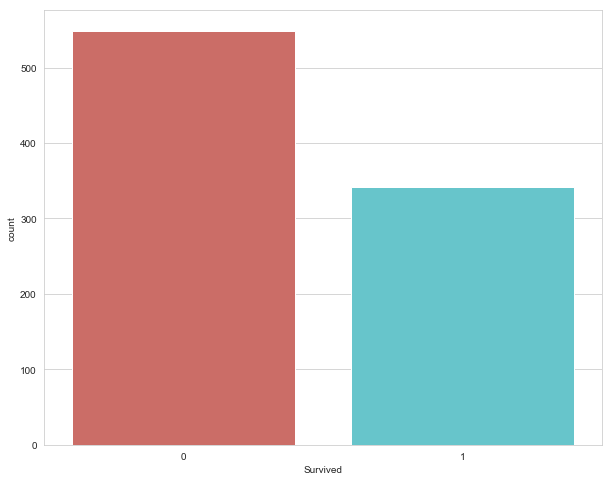

In [18]:
sb.countplot(x='Survived',data=titanic, palette='hls')

**¿Faltan datos en el dataset?**

Comprobar si hay valores faltantes llamando al método isnull(), y el método sum() fuera de él, para devolver un recuento de todos los valores Verdaderos que son devueltos por el método isnull().

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

** ¿Cuántas observaciones hay en total? **

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**¿Cómo procesar los datos faltantes?**

Podemos suprimir todas las variables que no son relevantes para predecir la sobrevivencia. Al menos deberíamos mantener lo siguiente:

    Survived - Esta variable es obviamente relevante.
    PClass - ¿Afecta la clase de un pasajero en el barco a su capacidad de sobreviviencia?
    Sex - ¿Podría el género de un pasajero afectar su tasa de sobreviviencia?
    Age - ¿Impacta la edad de una persona en su tasa de sobrevivencia?
    SibSp - ¿El número de parientes en el barco (que son hermanos o cónyuge) afecta la sobrevivencia de una persona?
    Parch - ¿El número de parientes en el barco (que son niños o padres) afecta la supervivencia de una persona?
    Tarifa - ¿La tarifa que paga una persona afecta su sobrevivencia? Tal vez, conservémoslo.
    Embarcado - ¿Importa el punto de embarque de una persona? Depende de cómo se llenó el barco... Vamos a conservarlo.

El nombre de una persona, el número de boleto y el número de identificación de pasajero no son relevantes para predecir la supervivencia. Y como recordarán, faltan muchos datos en la variable Cabin así que podemos suprimirla también.


In [21]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Ahora tenemos un dataset reducido a sólo variables relevantes, pero ahora tenemos que ocuparnos de los valores que faltan en la variable de _edad_.

Veamos cómo se relaciona la edad del pasajero con su clase como pasajero en el barco.

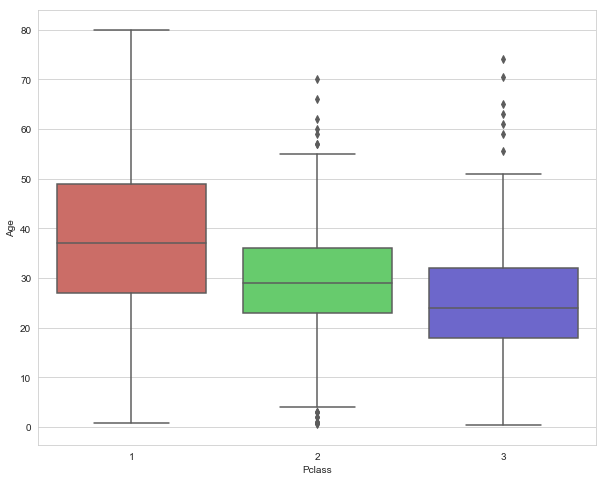

In [22]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

Hablando a grandes rasgos, podríamos decir que cuanto más joven es un pasajero, más probable es que esté en tercera clase. Cuanto mayor sea el pasajero, mayor será la probabilidad de que esté en primera clase. Por lo tanto, existe una relación poco estrecha entre estas variables. Por lo tanto, escribamos una función que se aproxime a la edad de un pasajero, basada en su clase. Desde el punto de vista de la caja, parece que la edad media de los pasajeros de primera clase es de unos 37 años, la de los pasajeros de segunda clase es de 29 y la de los pasajeros de tercera clase es de 24 años.

Así que escribamos una función que encuentre cada valor nulo en la variable Age, y por cada nulo, verifique el valor de la Clase P y asigne un valor de edad de acuerdo a la edad promedio de los pasajeros en esa clase.


In [23]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Hay 2 valores nulos en la variable embarcada. Podemos eliminar esos dos registros sin perder demasiada información importante de nuestro conjunto de datos, así que lo haremos.

In [25]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**¿Cómo convertir variables categoriales en variables _dummy_?**

Necesitamos reformatear las variables _Gender_ y _Embarked_ en variables numéricas.

In [26]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [29]:
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**¿Cómo visualizar la relación entre variables?**

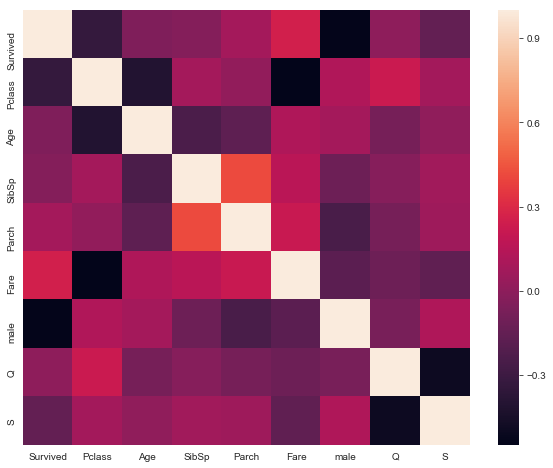

In [30]:
sb.heatmap(titanic_dmy.corr())

Fare y Pclass no son independientes el uno del otro, así que vamos a suprimir uno (Pclass por ejemplo).

In [31]:
titanic_dmy.drop(['Pclass'],axis=1,inplace=True)
titanic_dmy.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [33]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.3 KB


Nos quedan 889 observaciones. Es suficiente para el aprendizaje.

**Apliquemos el algoritmos de regresión logística:**

Dividimos las columnas del dataset en dos partes: los <i>features</i> (X), y la variable que queremos predecir (y).

In [34]:
X = titanic_dmy.ix[:,(1,2,3,4,5,6,7)].values
y = titanic_dmy.ix[:,0].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

[[33.  0.  0. ...  0.  0.  1.]
 [28.  1.  0. ...  0.  0.  0.]
 [25.  1.  0. ...  1.  0.  1.]
 ...
 [41.  0.  1. ...  0.  0.  1.]
 [28.  0.  1. ...  1.  0.  1.]
 [18.  0.  0. ...  0.  0.  1.]]


In [36]:
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[-0.02102985 -0.3147306  -0.18299798  0.01627013 -2.5492073  -0.66458868
  -0.39321471]]
intercept: [1.75998815]


In [38]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [39]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[136,  28],
       [ 35,  68]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       164
           1       0.71      0.66      0.68       103

   micro avg       0.76      0.76      0.76       267
   macro avg       0.75      0.74      0.75       267
weighted avg       0.76      0.76      0.76       267



<div style="background-color: #c47968">

<b>Pregunta:</b>

<p>- ¿Cómo se podría facilmente adaptar el algoritmo de Regresión Logística para resolver problemas de clasificación con más de 2 clases?</p>

</div>

## 6. Regresión logística: Trabajo Práctico

El archivo _diabetes.csv_ corresponde al dataset 'Pima Indians Diabetes' que contiene observaciones de personas, caracterizadas por ciertas medidas medicales y una categoría binaria indicando si sufren de diabete o no.

La tarea consiste en entrenar un modelo de clasificación binario utilizando el algoritmo de Regresión Logística.

Indicamos a continuación las caracteristicas del dataset:
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details. This dataset is a small dataset which includes 8 key features & a binary target value as follows:

    * Número de veces que ha estado embarazada
    * Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa
    * Presión arterial diastólica (mm Hg)
    * Grosor del pliegue de la piel del tríceps (mm)
    * Insulina en suero de 2 horas (mu U/ml)
    * Índice de masa corporal (peso en kg/(altura en m)^2)
    * Función de pedigrí de la diabetes
    * Edad (años)
    * Categoría (0 ó 1)


In [66]:
#Cargar el dataset
df_diabetes = pd.read_csv("datos/diabetes.csv")
df_diabetes[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [67]:
#verificar que no faltan datos
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
X = df_diabetes.ix[:,(0,1,2,3,4,5,6,7)].values   # va de 0 a 7 porque esas columnas son datos
y = df_diabetes.ix[:,8].values  #8 porque la ultima columna son los resultados

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

[[  9.    134.     74.    ...  25.9     0.46   81.   ]
 [  4.    111.     72.    ...  37.1     1.39   56.   ]
 [  8.     95.     72.    ...  36.8     0.485  57.   ]
 ...
 [ 10.    162.     84.    ...  27.7     0.182  54.   ]
 [  0.     93.    100.    ...  43.4     1.021  35.   ]
 [  6.    123.     72.    ...  33.6     0.733  34.   ]]


In [78]:
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[ 1.04114415e-01  2.68566971e-02 -2.19608755e-02  2.71875364e-03
  -1.06047657e-04  6.28398411e-02  4.15605547e-01  7.67933642e-03]]
intercept: [-5.26983756]


In [80]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [81]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[139,  21],
       [ 28,  43]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       160
           1       0.67      0.61      0.64        71

   micro avg       0.79      0.79      0.79       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.78      0.79      0.78       231

